<a href="https://colab.research.google.com/github/yjmd2222/Section-1-Project/blob/main/Section_1_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 다음 분기에 어떤 게임을 설계해야 할까

데이터셋: https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/datasets/vgames2.csv

In [ ]:
import pandas as pd

df_raw = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/datasets/vgames2.csv')
df_raw.head()

Unnamed: 0                                            Name Platform  \
0           1                    Candace Kane's Candy Factory       DS   
1           2                                  The Munchables      Wii   
2           3  Otome wa Oanesama Boku ni Koi Shiteru Portable      PSP   
3           4                Deal or No Deal: Special Edition       DS   
4           5       Ben 10 Ultimate Alien: Cosmic Destruction      PS3   

     Year      Genre           Publisher NA_Sales EU_Sales JP_Sales  \
0  2008.0     Action           Destineer     0.04        0        0   
1  2009.0     Action  Namco Bandai Games     0.17        0        0   
2  2010.0  Adventure           Alchemist        0        0     0.02   
3  2010.0       Misc           Zoo Games     0.04        0        0   
4  2010.0   Platform         D3Publisher     0.12     0.09        0   

  Other_Sales  
0           0  
1        0.01  
2           0  
3           0  
4        0.04

Name : 게임의 이름입니다.<br>
Platform : 게임이 지원되는 플랫폼의 이름입니다.<br>
Year : 게임이 출시된 연도입니다.<br>
Genre : 게임의 장르입니다.<br>
Publisher : 게임을 배급한 회사입니다.<br>
NA_Sales : 북미지역에서의 출고량입니다.<br>
EU_Sales : 유럽지역에서의 출고량입니다.<br>
JP_Sales : 일본지역에서의 출고량입니다.<br>
Other_Sales : 기타지역에서의 출고량입니다.


## EDA 진행

`.shape`, `.info()`, `.describe()`로 결측치, 데이터타입, 이상치 등등 확인해보기

In [ ]:
df_raw.shape

(16598, 10)

In [ ]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   16598 non-null  int64  
 1   Name         16598 non-null  object 
 2   Platform     16598 non-null  object 
 3   Year         16327 non-null  float64
 4   Genre        16548 non-null  object 
 5   Publisher    16540 non-null  object 
 6   NA_Sales     16598 non-null  object 
 7   EU_Sales     16598 non-null  object 
 8   JP_Sales     16598 non-null  object 
 9   Other_Sales  16598 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 1.3+ MB


`Year`, `Genre`, `Publisher`에 결측치 존재

In [ ]:
df_raw[df_raw.isnull().any(axis=1)]

Unnamed: 0                                         Name Platform  \
31             32                                    Rock Band     X360   
50             51                     Ape Escape: On the Loose      PSP   
109           110   Yu-Gi-Oh! 5D's Wheelie Breakers (JP sales)      Wii   
272           273                           UK Truck Simulator       PC   
273           274  Jewel Link Chronicles: Mountains of Madness       DS   
...           ...                                          ...      ...   
16425       16426                               Yoostar on MTV     X360   
16431       16432            Cars: Mater-National Championship     X360   
16432       16433                                  Bejeweled 3     X360   
16555       16556                          Apache: Air Assault       PC   
16587       16588                 Need for Speed Underground 2       XB   

         Year       Genre                    Publisher NA_Sales EU_Sales  \
31        NaN        Misc              Electronic Arts     1.93     0.34   
50     2005.0         NaN  Sony Computer Entertainment     0.52     0.01   
109       NaN      Racing                      Unknown        0        0   
272    2010.0  Simulation                          NaN        0     0.03   
273       NaN      Puzzle                    Avanquest        0     0.06   
...       ...         ...                          ...      ...      ...   
16425     NaN        Misc                      Unknown     0.06        0   
16431  2007.0         NaN                          THQ     0.13        0   
16432     NaN      Puzzle                      Unknown     0.13        0   
16555  2010.0         NaN                  Just Flight        0     0.03   
16587  2004.0         NaN              Electronic Arts     1.38      0.8   

      JP_Sales Other_Sales  
31           0        0.21  
50        0.12        0.05  
109       0.02           0  
272          0           0  
273          0        0.01  
...        ...         ...  
16425        0           0  
16431        0        0.01  
16432        0        0.01  
16555        0        0.01  
16587        0         0.1  

[357 rows x 10 columns]

### 결측치 제거 판단 전 데이터타입 변환하기 

결측치가 존재하는 행의 데이터가 삭제해도 되는지는 Sales의 수치로 판단할 수 있을 것 같다. 만약 수치가 중요하다고 판단되는 행이 있다면 그것들을 모아 수기로 결측치를 찾아서 넣어볼 수 있을 것 같음.<br>
Sales가 다 object type이라서 float으로 바꾸어줘야 `.describe()`를 볼 수 있음.<br>
그리고 `Unnamed: 0`도 삭제해주기.

#### NA_Sales부터 Other_Sales를 float으로

In [ ]:
df_clean = df_raw.copy()
df_clean.loc[:,"NA_Sales":"Other_Sales"] = df_clean.loc[:,"NA_Sales":"Other_Sales"].astype(float)

ValueError: ignored

해당 칼럼 중에 숫자가 아닌 값이 존재함. `480K`라는 것인데, 보통 K는 thousand를 의미하므로 1000을 곱해주면 될 것 같다.

In [ ]:
def K_to_1000(df):
  df_ = df.copy().astype(str)
  for i in range(len(df.columns)):
    df_.iloc[:,i] = df_.iloc[:,i].str.replace("K","000")
  return df_.astype(float)

In [ ]:
K_to_1000(df_clean.loc[:,"NA_Sales":"Other_Sales"])

ValueError: ignored

이제 보니 M도 있음. Million. 차라리 숫자나 .이 아닌 측정치 전체를 search해보자. 추가로 0.58M인데 여기에 0을 6개 붙여도 M의 의미가 전혀 부여되지 않기 때문에 이전에 K에 0 세 개 붙이는 방법이 잘못된 데이터값을 생성할 수 있었다는 것을 알 수 있다.

In [ ]:
test1 = df_clean[~df_clean['NA_Sales'].str.contains("^\d*[.,]?\d*$")] # https://stackoverflow.com/questions/26137955/python-regex-for-number-with-or-without-decimals-using-a-dot-or-comma-as-separat
test1

Unnamed: 0                              Name Platform    Year  \
10             11                       Ford Racing       PS  2001.0   
45             46      Resident Evil: Revelations 2      PS3  2015.0   
145           146                TOCA Race Driver 3       PC  2006.0   
447           448        Medal of Honor: Warfighter     X360  2012.0   
458           459                           F1 2010      PS3  2010.0   
...           ...                               ...      ...     ...   
16330       16331           Midway Arcade Treasures      PS2  2003.0   
16408       16409     NASCAR 06: Total Team Control      PS2  2005.0   
16482       16483  Super Robot Taisen F Kanketsuhen      SAT    98.0   
16492       16493                     Mortal Kombat      PSV  2012.0   
16578       16579              Gex: Enter the Gecko       PS  1998.0   

          Genre                               Publisher NA_Sales EU_Sales  \
10       Racing                      Empire Interactive     480K    0.33M   
45       Action                                  Capcom      60K     0.08   
145      Racing                             Codemasters       0K     0.02   
447      Action                         Electronic Arts    0.58M     0.47   
458      Racing                             Codemasters    0.25M     0.76   
...         ...                                     ...      ...      ...   
16330      Misc                            Midway Games     720K     0.56   
16408    Racing                         Electronic Arts    0.53M     0.02   
16482  Strategy                               Banpresto       0M        0   
16492  Fighting  Warner Bros. Interactive Entertainment     470K     0.18   
16578  Platform           BMG Interactive Entertainment     320K     0.22   

      JP_Sales Other_Sales  
10          0K        0.06  
45        0.16        0.03  
145          0           0  
447       0.01         0.1  
458       0.08        0.27  
...        ...         ...  
16330        0        0.19  
16408        0        0.09  
16482     0.55           0  
16492        0        0.12  
16578        0        0.04  

[200 rows x 10 columns]

오티 시간에 데이터 [소스](https://www.vgchartz.com/charts/platform_totals/Hardware.php/)가 있어서 들어가보니니 Sales는 in millions로 되어 있다. 그래서 60K는 .06 등이 되겠다. M은 대부분 M만 드롭하면 될 것 처럼 생겼다. 각 K와 M끼리만 모아서 살펴보는 것이 좋을 듯.

In [ ]:
na_sales_test = test1['NA_Sales']
na_k = na_sales_test[na_sales_test.str.contains('K')].str.replace("K","").astype(float).sort_values()
na_k

9437        0.0
6153        0.0
5334        0.0
15111       0.0
5175        0.0
          ...  
11996    2010.0
13935    2570.0
9829     2930.0
1964     4100.0
1971     5170.0
Name: NA_Sales, Length: 100, dtype: float64

~~혹시 0보다 작은 예를 들면 $0.1 {\rm K} = 100$ 같은 데이터도 있는지는 query로 해보면 좋을 듯.~~ 필요 없음음

In [ ]:
na_k.to_frame().query('NA_Sales < 0')

Empty DataFrame
Columns: [NA_Sales]
Index: []

없다. 동일한 형태의 품질 오류만 있는 듯. 물론 NA_Sales만 봤기 때문에 다른 칼럼도 다 살펴보는 것이 좋을 듯.<br>
이보다 더 먼저 우선 각 칼럼에 숫자가 아닌 어떤 문자가 있는지 살펴보는 것이 좋을 듯.

In [ ]:
def find_nonalpha(df):
  df_ = df.copy()
  list1 = []
  for i in df_.columns:
    list1.append(df_[i].str.replace("[\d+.]", "", regex=True))
  return list1

nonalpha_list = find_nonalpha(df_clean.loc[:,"NA_Sales":"Other_Sales"])

In [ ]:
[i.value_counts() for i in nonalpha_list]

[     16398
 K      100
 M      100
 Name: NA_Sales, dtype: int64,      16398
 M      100
 K      100
 Name: EU_Sales, dtype: int64,      16399
 K      100
 M       99
 Name: JP_Sales, dtype: int64,      16398
 M      100
 K      100
 Name: Other_Sales, dtype: int64]

K와 M만 있다. 그럼 아까와 마찬가지로 K와 M을 strip 했을 때 각각을 확인해보기.

In [ ]:
def strip_k_m(df):
  df_ = df.copy()
  dict1 = {}
  for i in df_.columns:
    df_i_k = df_[i][df_[i].str.contains("K")].str.replace("K", "")
    df_i_m = df_[i][df_[i].str.contains("M")].str.replace("M", "")
    dict1[i] = {"K": df_i_k.astype(float), "M": df_i_m.astype(float)}
  return dict1

stripped_dfs = strip_k_m(df_clean.loc[:,"NA_Sales":"Other_Sales"])

In [ ]:
[i["K"][i["K"] < 0] for i in stripped_dfs.values()]

[Series([], Name: NA_Sales, dtype: float64),
 Series([], Name: EU_Sales, dtype: float64),
 Series([], Name: JP_Sales, dtype: float64),
 Series([], Name: Other_Sales, dtype: float64)]

K가 있는 측정치가 0보다 작은 것은 없다. 1000을 나눠주어 in millions로 유닛을 맞추면 된다.

In [ ]:
[i["M"][i["M"] > 10] for i in stripped_dfs.values()]

[Series([], Name: NA_Sales, dtype: float64),
 Series([], Name: EU_Sales, dtype: float64),
 Series([], Name: JP_Sales, dtype: float64),
 Series([], Name: Other_Sales, dtype: float64)]

M이 있는 측정치가 10보다 큰 것은 없어서 지금으로서는 이상치라고 판단할 만한 것은 없는듯. 따라서 M만 strip하면 될 것이다.

이제 K와 M을 처리해주는 함수 만들어서 적용해보자.

In [ ]:
def k_m_fix(df):
  df_ = df.copy()
  for i in df_.columns:
    df_[i] = df_[i].map(lambda x: str(float(x.replace("K", "")) / 1000) if "K" in x else x) # str로 다시 감싸주지 않으니 dtype이 object인 column에서 float은 nan으로 인식되는 듯
    df_[i] = df_[i].str.replace("M","")
  return df_.astype(float)

k_m_fix(df_clean.loc[:,"NA_Sales":"Other_Sales"])

NA_Sales  EU_Sales  JP_Sales  Other_Sales
0          0.04      0.00      0.00         0.00
1          0.17      0.00      0.00         0.01
2          0.00      0.00      0.02         0.00
3          0.04      0.00      0.00         0.00
4          0.12      0.09      0.00         0.04
...         ...       ...       ...          ...
16593      0.15      0.04      0.00         0.01
16594      0.01      0.00      0.00         0.00
16595      0.44      0.19      0.03         0.13
16596      0.05      0.05      0.25         0.03
16597      0.00      0.00      0.16         0.01

[16598 rows x 4 columns]

잘 적용되었다. `df_clean`으로 가져오자.

In [ ]:
df_clean.loc[:,"NA_Sales":"Other_Sales"] = k_m_fix(df_clean.loc[:,"NA_Sales":"Other_Sales"])
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   16598 non-null  int64  
 1   Name         16598 non-null  object 
 2   Platform     16598 non-null  object 
 3   Year         16327 non-null  float64
 4   Genre        16548 non-null  object 
 5   Publisher    16540 non-null  object 
 6   NA_Sales     16598 non-null  float64
 7   EU_Sales     16598 non-null  float64
 8   JP_Sales     16598 non-null  float64
 9   Other_Sales  16598 non-null  float64
dtypes: float64(5), int64(1), object(4)
memory usage: 1.3+ MB


Unnamed: 0도 삭제

In [ ]:
df_clean.drop("Unnamed: 0", axis=1, inplace=True)

### 결측치 다시 살펴보기

In [ ]:
nans = df_clean[df_clean.isnull().any(axis=1)]
nans.head()

Name Platform    Year       Genre  \
31                                     Rock Band     X360     NaN        Misc   
50                      Ape Escape: On the Loose      PSP  2005.0         NaN   
109   Yu-Gi-Oh! 5D's Wheelie Breakers (JP sales)      Wii     NaN      Racing   
272                           UK Truck Simulator       PC  2010.0  Simulation   
273  Jewel Link Chronicles: Mountains of Madness       DS     NaN      Puzzle   

                       Publisher  NA_Sales  EU_Sales  JP_Sales  Other_Sales  
31               Electronic Arts      1.93      0.34      0.00         0.21  
50   Sony Computer Entertainment      0.52      0.01      0.12         0.05  
109                      Unknown      0.00      0.00      0.02         0.00  
272                          NaN      0.00      0.03      0.00         0.00  
273                    Avanquest      0.00      0.06      0.00         0.01

Sales를 다 합쳐서 Total_Sales를 만들어서 수치를 보고, `.describe()` 해보기

In [ ]:
df_clean['Total_Sales'] = df_clean.loc[:,'NA_Sales':'Other_Sales'].sum(axis=1)
df_clean.head()

Name Platform    Year      Genre  \
0                    Candace Kane's Candy Factory       DS  2008.0     Action   
1                                  The Munchables      Wii  2009.0     Action   
2  Otome wa Oanesama Boku ni Koi Shiteru Portable      PSP  2010.0  Adventure   
3                Deal or No Deal: Special Edition       DS  2010.0       Misc   
4       Ben 10 Ultimate Alien: Cosmic Destruction      PS3  2010.0   Platform   

            Publisher  NA_Sales  EU_Sales  JP_Sales  Other_Sales  Total_Sales  
0           Destineer      0.04      0.00      0.00         0.00         0.04  
1  Namco Bandai Games      0.17      0.00      0.00         0.01         0.18  
2           Alchemist      0.00      0.00      0.02         0.00         0.02  
3           Zoo Games      0.04      0.00      0.00         0.00         0.04  
4         D3Publisher      0.12      0.09      0.00         0.04         0.25

In [ ]:
df_clean['Total_Sales'].describe()

count    16598.000000
mean         0.537164
std          1.555151
min          0.000000
25%          0.060000
50%          0.170000
75%          0.470000
max         82.740000
Name: Total_Sales, dtype: float64

In [ ]:
nans = df_clean[df_clean.isnull().any(axis=1)]
nans['Total_Sales'].describe()

count    357.000000
mean       0.449524
std        1.082519
min        0.010000
25%        0.050000
50%        0.160000
75%        0.420000
max       14.350000
Name: Total_Sales, dtype: float64

`.describe()`로 보니 결측치가 Total\_Sales 내 전체 데이터에 골고루 분포하고 있어서 결측치 제거에 있어서 Total\_Sales의 수치가 중요하다고 판단 내리기는 어려울 것 같다.

### 이름 중복 확인해보기

위에 보면 Yu-Gi-Oh! 5D's Wheelie Breakers (JP sales) 라는 게임도 있는데, JP sales라고 되어 있다. 만약 다른 지역의 판매 내역이 있다면 결측치를 그 다른 지역의 정보로 채워 넣을 수 있을 것 같다.

In [ ]:
df_clean.duplicated("Name").value_counts()

False    11493
True      5105
dtype: int64

In [ ]:
dup_name = df_clean[df_clean.duplicated("Name", keep=False)].sort_values("Name")
dup_name

Name Platform    Year   Genre  \
5504         007: Quantum of Solace      Wii  2008.0  Action   
9465         007: Quantum of Solace       DS  2008.0  Action   
2660         007: Quantum of Solace      PS2  2008.0  Action   
16280        007: Quantum of Solace     X360  2008.0  Action   
6839         007: Quantum of Solace      PS3  2008.0  Action   
...                             ...      ...     ...     ...   
16251     pro evolution soccer 2011      PS2  2010.0  Sports   
5796      pro evolution soccer 2011      PS3  2010.0  Sports   
2709      pro evolution soccer 2011     X360  2010.0  Sports   
3062   uDraw Studio: Instant Artist     X360  2011.0    Misc   
15021  uDraw Studio: Instant Artist      Wii  2011.0    Misc   

                          Publisher  NA_Sales  EU_Sales  JP_Sales  \
5504                     Activision      0.30      0.29      0.01   
9465                     Activision      0.11      0.01      0.00   
2660                     Activision      0.17      0.00      0.00   
16280                    Activision      0.82      0.52      0.01   
6839                     Activision      0.43      0.52      0.02   
...                             ...       ...       ...       ...   
16251  Konami Digital Entertainment      0.04      0.21      0.05   
5796   Konami Digital Entertainment      0.29      1.18      0.54   
2709   Konami Digital Entertainment      0.09      0.44      0.00   
3062                            THQ      0.01      0.01      0.00   
15021                           THQ      0.08      0.09      0.00   

       Other_Sales  Total_Sales  
5504          0.07         0.67  
9465          0.01         0.13  
2660          0.26         0.43  
16280         0.14         1.49  
6839          0.20         1.17  
...            ...          ...  
16251         0.11         0.41  
5796          0.41         2.42  
2709          0.07         0.60  
3062          0.00         0.02  
15021         0.02         0.19  

[7880 rows x 10 columns]

이제 보니 다양한 플랫폼도 눈에 들어온다.

In [ ]:
dup_name[dup_name[['Year', 'Genre', 'Publisher']].isnull().any(axis=1)]

Name Platform    Year    Genre  \
11641  AKB1/48: Idol to Guam de Koishitara...     X360     NaN     Misc   
14119                  All-Star Baseball 2005       XB     NaN   Sports   
10896                  All-Star Baseball 2005      PS2     NaN   Sports   
16555                     Apache: Air Assault       PC  2010.0      NaN   
7150             Aquaman: Battle for Atlantis       XB     NaN   Action   
...                                       ...      ...     ...      ...   
6118                         Wheel of Fortune      PS2     NaN     Misc   
8055              Wii de Asobu: Metroid Prime      Wii     NaN  Shooter   
9184              Wii de Asobu: Metroid Prime      Wii     NaN  Shooter   
15776                         Without Warning       XB     NaN  Shooter   
2070                           World of Tanks     X360     NaN  Shooter   

         Publisher  NA_Sales  EU_Sales  JP_Sales  Other_Sales  Total_Sales  
11641          NaN      0.00      0.00      0.01         0.00         0.01  
14119      Unknown      0.11      0.03      0.00         0.01         0.15  
10896      Unknown      0.16      0.12      0.00         0.04         0.32  
16555  Just Flight      0.00      0.03      0.00         0.01         0.04  
7150       Unknown      0.01      0.00      0.00         0.00         0.01  
...            ...       ...       ...       ...          ...          ...  
6118       Unknown      0.47      0.36      0.00         0.12         0.95  
8055      Nintendo      0.00      0.00      0.02         0.00         0.02  
9184      Nintendo      0.00      0.00      0.02         0.00         0.02  
15776       Capcom      0.01      0.00      0.00         0.00         0.01  
2070           NaN      0.00      0.03      0.00         0.00         0.03  

[170 rows x 10 columns]

In [ ]:
dup_name.query("Name == 'Apache: Air Assault'")

Name Platform    Year       Genre    Publisher  \
16555  Apache: Air Assault       PC  2010.0         NaN  Just Flight   
11356  Apache: Air Assault     X360  2010.0  Simulation   Activision   
3846   Apache: Air Assault      PS3  2010.0  Simulation   Activision   

       NA_Sales  EU_Sales  JP_Sales  Other_Sales  Total_Sales  
16555      0.00      0.03       0.0         0.01         0.04  
11356      0.12      0.04       0.0         0.01         0.17  
3846       0.11      0.07       0.0         0.03         0.21

다양하게 섞여 있음. 하나씩 해보자.

#### 대체

##### Year

우선 Year는 위에서 살펴보았듯이 대부분 비슷함. 다음 해에 다른 플랫폼에서 발매하는 등의 경우로 1년 차이가 있을 수 있어도, 5년 이상 차이나는 것은 어려울 것 같다. 그래도 한 번 살펴볼 수는 있을 듯

In [ ]:
dup_name_desc = dup_name.groupby("Name")["Year"].describe()
dup_name_desc["std"]

Name
007: Quantum of Solace              0.000000
007: The World is not Enough        0.000000
11eyes: CrossOver                   0.707107
18 Wheeler: American Pro Trucker    0.707107
187: Ride or Die                    0.000000
                                      ...   
iCarly                              0.000000
iCarly 2: iJoin The Click!          0.000000
nail'd                              0.000000
pro evolution soccer 2011           0.000000
uDraw Studio: Instant Artist        0.000000
Name: std, Length: 2775, dtype: float64

In [ ]:
dup_name_desc["std"].value_counts().sort_index()

0.000000       1988
0.377964          3
0.408248          7
0.408248          2
0.447214          3
               ... 
1407.142495       1
1413.506456       1
1414.213562      15
1414.920669       1
1415.627776       1
Name: std, Length: 115, dtype: int64

대부분 같은 연도지만 1000년 이상 차이나는 숫자도 있다. Year를 직접 봐야 할 듯

In [ ]:
df_clean["Year"].dropna().sort_values()

9276        0.0
16394       0.0
14666       0.0
2249        1.0
8681        1.0
          ...  
4321     2016.0
5310     2017.0
15233    2017.0
10107    2017.0
6906     2020.0
Name: Year, Length: 16327, dtype: float64

1의 단위인 정보는 2000년 이후 2001년 과 같은 것으로 예상 가능함. 99년 같은 것도 있을 것 같다.

In [ ]:
years = df_clean["Year"]
below = years[years < 50]
above = years[(years >= 50) * (years < 1900)] # truth value of series is ambiguous

In [ ]:
below.value_counts()

9.0     10
11.0    10
8.0     10
3.0      7
6.0      7
10.0     7
15.0     5
16.0     5
4.0      4
5.0      4
7.0      3
2.0      3
0.0      3
1.0      2
14.0     2
13.0     2
12.0     2
Name: Year, dtype: int64

In [ ]:
above.value_counts()

95.0    4
96.0    3
98.0    3
97.0    2
86.0    1
94.0    1
Name: Year, dtype: int64

In [ ]:
above = above.map(lambda x: x + 1900)
below = below.map(lambda x: x + 2000)

In [ ]:
years[above.index] = above

<ipython-input-37-cbe82cfc36f2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  years[above.index] = above


In [ ]:
years[below.index] = below # 나중에 살펴볼 수 있으면. 아마 years.loc[below.index] = below로 하면 되지 않을까 싶음 

<ipython-input-38-075b11491c63>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  years[below.index] = below # 나중에 살펴볼 수 있으면. 아마 years.loc[below.index] = below로 하면 되지 않을까 싶음


In [ ]:
years.value_counts()

2009.0    1431
2008.0    1428
2010.0    1259
2007.0    1202
2011.0    1139
2006.0    1008
2005.0     941
2002.0     829
2003.0     775
2004.0     763
2012.0     657
2015.0     614
2014.0     582
2013.0     546
2001.0     482
1998.0     379
2000.0     349
2016.0     344
1999.0     338
1997.0     289
1996.0     263
1995.0     219
1994.0     121
1993.0      60
1981.0      46
1992.0      43
1991.0      41
1982.0      36
1986.0      21
1989.0      17
1983.0      17
1990.0      16
1987.0      16
1988.0      15
1984.0      14
1985.0      14
1980.0       9
2017.0       3
2020.0       1
Name: Year, dtype: int64

In [ ]:
years.isna().sum() # value_counts()에 null은 안 나오는듯

271

In [ ]:
df_clean['Year'] = years

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:xlabel='std', ylabel='Density'>

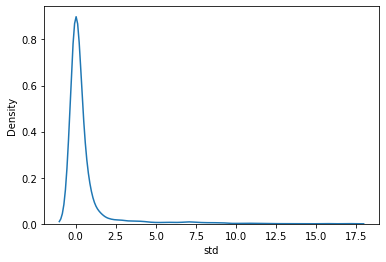

In [ ]:
dup_name = df_clean[df_clean.duplicated("Name", keep=False)].sort_values("Name")
dup_name_desc = dup_name.groupby("Name")["Year"].describe()
sns.kdeplot(dup_name_desc["std"])

이제 다시 돌아와서 Year를 연도가 결측치인 경우 다른 플랫폼/퍼블리셔의 연도로 대체해도 되겠다. 기준은 median을 round한 것으로.

In [ ]:
missing_year = df_clean[df_clean['Year'].isnull()]

In [ ]:
names = missing_year['Name'].unique() # n133 참고

In [ ]:
names_ = []

for name in df_clean['Name'][df_clean['Name'].duplicated()]:
  if name in names:
    names_.append(name)

In [ ]:
len(names_)

244

In [ ]:
testdf = df_clean[df_clean['Name'].isin(names_)].sort_values('Name')
testdf

Name Platform    Year    Genre  \
11641  AKB1/48: Idol to Guam de Koishitara...     X360     NaN     Misc   
7310   AKB1/48: Idol to Guam de Koishitara...      PSP  2011.0     Misc   
10896                  All-Star Baseball 2005      PS2     NaN   Sports   
14119                  All-Star Baseball 2005       XB     NaN   Sports   
7150             Aquaman: Battle for Atlantis       XB     NaN   Action   
...                                       ...      ...     ...      ...   
8055              Wii de Asobu: Metroid Prime      Wii     NaN  Shooter   
15776                         Without Warning       XB     NaN  Shooter   
6131                          Without Warning      PS2  2005.0  Shooter   
2070                           World of Tanks     X360     NaN  Shooter   
27                             World of Tanks       PC  2011.0  Shooter   

                Publisher  NA_Sales  EU_Sales  JP_Sales  Other_Sales  \
11641                 NaN      0.00      0.00      0.01         0.00   
7310   Namco Bandai Games      0.00      0.00      0.40         0.00   
10896             Unknown      0.16      0.12      0.00         0.04   
14119             Unknown      0.11      0.03      0.00         0.01   
7150              Unknown      0.01      0.00      0.00         0.00   
...                   ...       ...       ...       ...          ...   
8055             Nintendo      0.00      0.00      0.02         0.00   
15776              Capcom      0.01      0.00      0.00         0.00   
6131               Capcom      0.02      0.01      0.00         0.00   
2070                  NaN      0.00      0.03      0.00         0.00   
27          Wargaming.net      0.00      0.23      0.00         0.06   

       Total_Sales  
11641         0.01  
7310          0.40  
10896         0.32  
14119         0.15  
7150          0.01  
...            ...  
8055          0.02  
15776         0.01  
6131          0.03  
2070          0.03  
27            0.29  

[355 rows x 10 columns]

In [ ]:
count_ = testdf.groupby('Name')['Year'].count()
names__ = count_[count_ == 1].index

In [ ]:
testdf2 = df_clean[df_clean['Name'].isin(names__)].sort_values('Name')
testdf2

Name Platform    Year    Genre  \
7310   AKB1/48: Idol to Guam de Koishitara...      PSP  2011.0     Misc   
11641  AKB1/48: Idol to Guam de Koishitara...     X360     NaN     Misc   
7150             Aquaman: Battle for Atlantis       XB     NaN   Action   
4057             Aquaman: Battle for Atlantis       GC  2003.0   Action   
9298                         Battle vs. Chess       PC     NaN     Misc   
...                                       ...      ...     ...      ...   
8600                                      Wet     X360     NaN  Shooter   
6131                          Without Warning      PS2  2005.0  Shooter   
15776                         Without Warning       XB     NaN  Shooter   
2070                           World of Tanks     X360     NaN  Shooter   
27                             World of Tanks       PC  2011.0  Shooter   

                 Publisher  NA_Sales  EU_Sales  JP_Sales  Other_Sales  \
7310    Namco Bandai Games      0.00      0.00      0.40         0.00   
11641                  NaN      0.00      0.00      0.01         0.00   
7150               Unknown      0.01      0.00      0.00         0.00   
4057        TDK Mediactive      0.01      0.00      0.00         0.00   
9298   TopWare Interactive      0.00      0.02      0.00         0.01   
...                    ...       ...       ...       ...          ...   
8600    Bethesda Softworks      0.23      0.21      0.01         0.05   
6131                Capcom      0.02      0.01      0.00         0.00   
15776               Capcom      0.01      0.00      0.00         0.00   
2070                   NaN      0.00      0.03      0.00         0.00   
27           Wargaming.net      0.00      0.23      0.00         0.06   

       Total_Sales  
7310          0.40  
11641         0.01  
7150          0.01  
4057          0.01  
9298          0.03  
...            ...  
8600          0.50  
6131          0.03  
15776         0.01  
2070          0.03  
27            0.29  

[112 rows x 10 columns]

In [ ]:
years_ = testdf2.groupby('Name')['Year'].agg('median')

`.ffill()`과 `.bfill()`이라는 것이 있다. 앞 것 기준으로 f, 뒤 것 기준으로 b. median을 함수 만들어서 넣는 것보다 이 built-in method가 더 편한 것 같다.

In [ ]:
years__ = testdf2.groupby('Name')['Year'].ffill().bfill()
years__

7310     2011.0
11641    2011.0
7150     2003.0
4057     2003.0
9298     2011.0
          ...  
8600     2009.0
6131     2005.0
15776    2005.0
2070     2011.0
27       2011.0
Name: Year, Length: 112, dtype: float64

In [ ]:
df_clean.loc[df_clean.index.isin(years__.index),'Year'] = years__

In [ ]:
df_clean.loc[11641]

Name           AKB1/48: Idol to Guam de Koishitara...
Platform                                         X360
Year                                           2011.0
Genre                                            Misc
Publisher                                         NaN
NA_Sales                                          0.0
EU_Sales                                          0.0
JP_Sales                                         0.01
Other_Sales                                       0.0
Total_Sales                                      0.01
Name: 11641, dtype: object

In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16598 non-null  object 
 1   Platform     16598 non-null  object 
 2   Year         16392 non-null  float64
 3   Genre        16548 non-null  object 
 4   Publisher    16540 non-null  object 
 5   NA_Sales     16598 non-null  float64
 6   EU_Sales     16598 non-null  float64
 7   JP_Sales     16598 non-null  float64
 8   Other_Sales  16598 non-null  float64
 9   Total_Sales  16598 non-null  float64
dtypes: float64(6), object(4)
memory usage: 1.3+ MB


긴 과정이었음. 그냥 groupby 하고 fill 쓰면 되는 것 아닌가 싶음.

In [ ]:
testdf2.groupby('Name')['Year'].bfill().ffill().isna().sum()

0

단순히 동시에 쓰면 안 되고, 두 번 쓰면 될 것 같음. 추가: `.sort_values('Year')`한 다음 둘 중 하나만 써도 됐됐을 것 같음.

In [ ]:
byears = df_raw.groupby('Name')['Year'].bfill()
fyears = df_raw.groupby('Name')['Year'].ffill()

In [ ]:
list123 = []
for i in range(len(byears)):
  if not pd.isnull(byears.loc[i]): list123.append(byears.loc[i])
  else: list123.append(fyears.loc[i])

In [ ]:
df_raw_test = df_raw.copy()
df_raw_test['Year'] = list123

In [ ]:
df_raw_test.loc[11641]

Unnamed: 0                                      11642
Name           AKB1/48: Idol to Guam de Koishitara...
Platform                                         X360
Year                                           2011.0
Genre                                            Misc
Publisher                                         NaN
NA_Sales                                            0
EU_Sales                                            0
JP_Sales                                         0.01
Other_Sales                                         0
Name: 11641, dtype: object

In [ ]:
df_raw_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   16598 non-null  int64  
 1   Name         16598 non-null  object 
 2   Platform     16598 non-null  object 
 3   Year         16451 non-null  float64
 4   Genre        16548 non-null  object 
 5   Publisher    16540 non-null  object 
 6   NA_Sales     16598 non-null  object 
 7   EU_Sales     16598 non-null  object 
 8   JP_Sales     16598 non-null  object 
 9   Other_Sales  16598 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 1.3+ MB


왜 다른지 참 힘들다

In [ ]:
rawyear = df_raw_test['Year']
cleanyear = df_clean['Year']

df_clean[rawyear != cleanyear]

Name Platform    Year     Genre  \
31                                      Rock Band     X360     NaN      Misc   
74        Age of Empires III: Complete Collection       PC  2009.0  Strategy   
81                          Treasures of the Deep       PS  1997.0    Action   
109    Yu-Gi-Oh! 5D's Wheelie Breakers (JP sales)      Wii     NaN    Racing   
213                              NASCAR Unleashed      PS3  2011.0    Racing   
...                                           ...      ...     ...       ...   
16275                              Space Invaders     2600     NaN   Shooter   
16278                               Madden NFL 11      Wii     NaN    Sports   
16394                               Point Blank 3       PS  2000.0   Shooter   
16425                              Yoostar on MTV     X360     NaN      Misc   
16482            Super Robot Taisen F Kanketsuhen      SAT  1998.0  Strategy   

                    Publisher  NA_Sales  EU_Sales  JP_Sales  Other_Sales  \
31            Electronic Arts      1.93      0.34      0.00         0.21   
74     Microsoft Game Studios      0.01      0.12      0.00         0.03   
81         Namco Bandai Games      0.10      0.07      0.00         0.01   
109                   Unknown      0.00      0.00      0.02         0.00   
213                Activision      0.09      0.00      0.00         0.01   
...                       ...       ...       ...       ...          ...   
16275                   Atari      2.36      0.14      0.00         0.03   
16278                 Unknown      0.70      0.00      0.00         0.05   
16394      Namco Bandai Games      0.01      0.01      0.00         0.00   
16425                 Unknown      0.06      0.00      0.00         0.00   
16482               Banpresto      0.00      0.00      0.55         0.00   

       Total_Sales  
31            2.48  
74            0.16  
81            0.18  
109           0.02  
213           0.10  
...            ...  
16275         2.53  
16278         0.75  
16394         0.02  
16425         0.06  
16482         0.55  

[307 rows x 10 columns]

In [ ]:
df_raw_test[rawyear != cleanyear]

Unnamed: 0                                        Name Platform  \
31             32                                   Rock Band     X360   
74             75     Age of Empires III: Complete Collection       PC   
81             82                       Treasures of the Deep       PS   
109           110  Yu-Gi-Oh! 5D's Wheelie Breakers (JP sales)      Wii   
213           214                            NASCAR Unleashed      PS3   
...           ...                                         ...      ...   
16275       16276                              Space Invaders     2600   
16278       16279                               Madden NFL 11      Wii   
16394       16395                               Point Blank 3       PS   
16425       16426                              Yoostar on MTV     X360   
16482       16483            Super Robot Taisen F Kanketsuhen      SAT   

         Year     Genre               Publisher NA_Sales EU_Sales JP_Sales  \
31        NaN      Misc         Electronic Arts     1.93     0.34        0   
74        9.0  Strategy  Microsoft Game Studios     0.01     0.12        0   
81       97.0    Action      Namco Bandai Games      0.1     0.07        0   
109       NaN    Racing                 Unknown        0        0     0.02   
213      11.0    Racing              Activision     0.09        0        0   
...       ...       ...                     ...      ...      ...      ...   
16275  2002.0   Shooter                   Atari     2.36     0.14       0M   
16278  2010.0    Sports                 Unknown      0.7        0        0   
16394     0.0   Shooter      Namco Bandai Games     0.01     0.01        0   
16425     NaN      Misc                 Unknown     0.06        0        0   
16482    98.0  Strategy               Banpresto       0M        0     0.55   

      Other_Sales  
31           0.21  
74           0.03  
81           0.01  
109             0  
213          0.01  
...           ...  
16275        0.03  
16278         50K  
16394           0  
16425           0  
16482           0  

[307 rows x 10 columns]

In [ ]:
df_raw_test.query('Name == "Madden NFL 11"')

Unnamed: 0           Name Platform    Year   Genre        Publisher  \
2595         2596  Madden NFL 11     X360  2010.0  Sports  Electronic Arts   
3795         3796  Madden NFL 11      PSP  2010.0  Sports  Electronic Arts   
7336         7337  Madden NFL 11      PS2  2010.0     NaN  Electronic Arts   
13294       13295  Madden NFL 11      PS3  2010.0  Sports  Electronic Arts   
16278       16279  Madden NFL 11      Wii  2010.0  Sports          Unknown   

      NA_Sales EU_Sales JP_Sales Other_Sales  
2595      2.38     0.12        0        0.18  
3795      0.35        0        0        0.03  
7336      0.41     0.02        0        0.07  
13294     2.04     0.15        0        0.19  
16278      0.7        0        0         50K

In [ ]:
df_clean.query('Name == "Madden NFL 11"')

Name Platform    Year   Genre        Publisher  NA_Sales  \
2595   Madden NFL 11     X360  2010.0  Sports  Electronic Arts      2.38   
3795   Madden NFL 11      PSP  2010.0  Sports  Electronic Arts      0.35   
7336   Madden NFL 11      PS2  2010.0     NaN  Electronic Arts      0.41   
13294  Madden NFL 11      PS3  2010.0  Sports  Electronic Arts      2.04   
16278  Madden NFL 11      Wii     NaN  Sports          Unknown      0.70   

       EU_Sales  JP_Sales  Other_Sales  Total_Sales  
2595       0.12       0.0         0.18         2.68  
3795       0.00       0.0         0.03         0.38  
7336       0.02       0.0         0.07         0.50  
13294      0.15       0.0         0.19         2.38  
16278      0.00       0.0         0.05         0.75

아까 df_clean에 대해서는 .bfill().ffill()로 동시에 진행해서 그런 것 같음.
이참에 함수 만들어서 Genre와 Publisher에도 같이 적용할 수 있도록 해야겠다.

In [ ]:
def my_fill(df, col_name):
  df_ = df.copy()
  bcol = df_.groupby('Name')[col_name].bfill()
  fcol = df_.groupby('Name')[col_name].ffill()
  df_[col_name] = [bcol.loc[i] if not pd.isnull(bcol.loc[i]) else fcol.loc[i] for i in range(len(bcol))]
  return df_

In [ ]:
testyear = my_fill(df_clean, 'Year')

In [ ]:
testyear.loc[16278]

Name           Madden NFL 11
Platform                 Wii
Year                  2010.0
Genre                 Sports
Publisher            Unknown
NA_Sales                 0.7
EU_Sales                 0.0
JP_Sales                 0.0
Other_Sales             0.05
Total_Sales             0.75
Name: 16278, dtype: object

잘 되는 것 같음

In [ ]:
df_clean = my_fill(df_clean, 'Year')

In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16598 non-null  object 
 1   Platform     16598 non-null  object 
 2   Year         16451 non-null  float64
 3   Genre        16548 non-null  object 
 4   Publisher    16540 non-null  object 
 5   NA_Sales     16598 non-null  float64
 6   EU_Sales     16598 non-null  float64
 7   JP_Sales     16598 non-null  float64
 8   Other_Sales  16598 non-null  float64
 9   Total_Sales  16598 non-null  float64
dtypes: float64(6), object(4)
memory usage: 1.3+ MB


##### Genre와 Publisher

Year와 동일한 함수

In [ ]:
df_clean = my_fill(df_clean, 'Genre')
df_clean = my_fill(df_clean, 'Publisher')

In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16598 non-null  object 
 1   Platform     16598 non-null  object 
 2   Year         16451 non-null  float64
 3   Genre        16568 non-null  object 
 4   Publisher    16547 non-null  object 
 5   NA_Sales     16598 non-null  float64
 6   EU_Sales     16598 non-null  float64
 7   JP_Sales     16598 non-null  float64
 8   Other_Sales  16598 non-null  float64
 9   Total_Sales  16598 non-null  float64
dtypes: float64(6), object(4)
memory usage: 1.3+ MB


이렇게가지 해봤는데, 중간중간 Unknown값이 있는 것들은 Genre 같은 경우에는 결측치와 같이 대체해볼 수 있을 것 같다. Publisher는 다른 곳에서 발행할 경우도 있어서 일단 보류.

In [ ]:
df_clean[df_clean.isin(["Unknown"]).any(axis=1)]

Name Platform    Year  \
30                    Kids Learn Music A+ Edition       DS  2011.0   
109    Yu-Gi-Oh! 5D's Wheelie Breakers (JP sales)      Wii     NaN   
212                            Wild West Shootout      Wii  2010.0   
358            Majesty 2: The Fantasy Kingdom Sim     X360  2009.0   
387                         Gummy Bears Mini Golf      Wii  2010.0   
...                                           ...      ...     ...   
16400                                      Afrika      PS3  2008.0   
16402                               The Golf Club     XOne  2014.0   
16425                              Yoostar on MTV     X360     NaN   
16432                                 Bejeweled 3     X360  2010.0   
16500                    The Dark Hills of Cherai       PC  2009.0   

            Genre Publisher  NA_Sales  EU_Sales  JP_Sales  Other_Sales  \
30           Misc   Unknown      0.05      0.00      0.00         0.00   
109        Racing   Unknown      0.00      0.00      0.02         0.00   
212       Shooter   Unknown      0.01      0.01      0.00         0.00   
358    Simulation   Unknown      0.03      0.00      0.00         0.00   
387        Sports   Unknown      0.04      0.00      0.00         0.00   
...           ...       ...       ...       ...       ...          ...   
16400   Adventure   Unknown      0.12      0.00      0.08         0.01   
16402      Sports   Unknown      0.02      0.00      0.00         0.00   
16425        Misc   Unknown      0.06      0.00      0.00         0.00   
16432      Puzzle   Unknown      0.13      0.00      0.00         0.01   
16500      Puzzle   Unknown      0.00      0.01      0.00         0.00   

       Total_Sales  
30            0.05  
109           0.02  
212           0.02  
358           0.03  
387           0.04  
...            ...  
16400         0.21  
16402         0.02  
16425         0.06  
16432         0.14  
16500         0.01  

[203 rows x 10 columns]

In [ ]:
df_clean['Publisher'].isin(["Unknown"]).sum()

203

Publisher만 Unknown이다.

### 이름 비슷 한 것이 있는지

괄호 등이 있나 확인해보고 지우면 어떻게 나올지 확인해보기

In [ ]:
pd.set_option('display.max_rows', 500)

In [ ]:
df_clean[df_clean['Name'].str.contains("(", regex=False)]['Name'].sort_values()

10647              .hack//G.U. Vol.2//Reminisce (jp sales)
15845                        Ape Escape Academy (jp sales)
779              Atelier Iris 3: Grand Phantasm (JP Sales)
14263            Atelier Iris 3: Grand Phantasm (US Sales)
7816                                Attack on Titan (KOEI)
16006                               Attack on Titan (KOEI)
10137                               Attack on Titan (KOEI)
5159                                Attack on Titan (KOEI)
3848                Battlefield 2: Modern Combat(JP sales)
15766                        Bleach: Dark Souls (JP sales)
500                       Blood: The Last Vampire (Joukan)
15987                                 Bomberman (jp sales)
16574                 Brave Story: New Traveler (US sales)
14162                Brave Story: New Traveller (jp sales)
7068                       Cabela's Big Game Hunter (2008)
10590                      Cabela's Big Game Hunter (2008)
15791                      Cabela's Big Game Hunter (200

In [ ]:
df_clean['Name'].str.contains('\[').sum()

7

In [ ]:
df_clean['Name'].str.contains('\{').sum()

0

In [ ]:
df_clean[df_clean['Name'].str.contains('\[')]

Name Platform    Year      Genre  \
340    Fate/Stay Night [Réalta Nua]      PS2  2007.0  Adventure   
2590                    [Prototype]     X360  2009.0     Action   
3195                  [Prototype 2]     X360  2012.0     Action   
7228   Fate/Stay Night [Réalta Nua]      PSV  2012.0  Adventure   
7649                  [Prototype 2]       PC  2012.0     Action   
16243                 [Prototype 2]      PS3  2012.0     Action   
16282                   [Prototype]      PS3  2009.0     Action   

             Publisher  NA_Sales  EU_Sales  JP_Sales  Other_Sales  Total_Sales  
340    Kadokawa Shoten      0.00      0.00      0.17         0.00         0.17  
2590        Activision      0.84      0.35      0.00         0.12         1.31  
3195        Activision      0.48      0.25      0.00         0.07         0.80  
7228   Kadokawa Shoten      0.00      0.00      0.06         0.00         0.06  
7649        Activision      0.07      0.02      0.00         0.01         0.10  
16243       Activision      0.36      0.28      0.00         0.11         0.75  
16282       Activision      0.65      0.41      0.00         0.19         1.25

이제 보니 melt 해보면 좋을 것 같다.<br>
그리고 (년도)와 (다른 것)으로 구분도 해보고, Transformer 시리즈는 뭐가 다른 건지 확인해봐야 겠음.

In [ ]:
df_clean.loc[11738]['Name']

'Transformers: The Game (XBox 360, PS2, PS3, Wii & PC Versions)'

In [ ]:
df_clean.query('Name == "Transformers: The Game (XBox 360, PS2, PS3, Wii & PC Versions)"')

Name Platform    Year  \
305    Transformers: The Game (XBox 360, PS2, PS3, Wi...      PS3  2007.0   
677    Transformers: The Game (XBox 360, PS2, PS3, Wi...     X360  2007.0   
11738  Transformers: The Game (XBox 360, PS2, PS3, Wi...      PSP  2007.0   
15003  Transformers: The Game (XBox 360, PS2, PS3, Wi...      Wii  2007.0   
16546  Transformers: The Game (XBox 360, PS2, PS3, Wi...      PS2  2007.0   

        Genre   Publisher  NA_Sales  EU_Sales  JP_Sales  Other_Sales  \
305    Action  Activision      0.32      0.04      0.01         0.04   
677    Action  Activision      0.51      0.05      0.00         0.05   
11738  Action  Activision      0.23      0.27      0.00         0.16   
15003  Action  Activision      0.52      0.03      0.00         0.04   
16546  Action  Activision      0.63      0.37      0.00         0.11   

       Total_Sales  
305           0.41  
677           0.61  
11738         0.66  
15003         0.59  
16546         1.11

In [ ]:
df_clean.loc[[6746,3355]]

Name Platform    Year  \
6746       Transformers: War for Cybertron (DS Version)       DS  2010.0   
3355  Transformers: War for Cybertron (XBox 360, PS3...       PC  2010.0   

        Genre   Publisher  NA_Sales  EU_Sales  JP_Sales  Other_Sales  \
6746  Shooter  Activision      0.22      0.01       0.0         0.02   
3355  Shooter  Activision      0.01      0.00       0.0         0.00   

      Total_Sales  
6746         0.25  
3355         0.01

중간중간 눈에 들어왔던게 PS2랑 PS3랑 같은 플랫폼인줄 알고 실제 중복인지 알았는데, 아님.<br>
melt 전에 (년도)와 (다른 것)으로 구분해서 (다른 것)을 삭제해보기.

### 패턴 1: 괄호 제거

In [ ]:
test_name = df_clean['Name'].copy()

In [ ]:
test_name = test_name[test_name.str.contains('\(')]

In [ ]:
name_cond = test_name.str.contains('\([0-9]{4}\)')

In [ ]:
pd.set_option('display.max_rows', 10)

In [ ]:
test_name[name_cond]

17       Hajime no Ippo: The Fighting! (2014)
329           The Amazing Spider-Man 2 (2014)
366                            Mad Max (2015)
925                             Hitman (2016)
948                         Zoo Tycoon (2013)
                         ...                 
15462      Cabela's Outdoor Adventures (2009)
15480                       Zoo Tycoon (2013)
15791         Cabela's Big Game Hunter (2008)
15907                             Doom (2016)
16572                    GoldenEye 007 (2010)
Name: Name, Length: 54, dtype: object

끝에 )가 있는지 확인

In [ ]:
test_name.str.endswith(')').sum()

277

In [ ]:
test_name.shape

(279,)

In [ ]:
test_name[~test_name.str.endswith(')')]

4902                 Moe Moe 2-ji Taisen (Ryoku) * Deluxe
7366    King of Colosseum (Red): Shin Nippon x Zen Nip...
Name: Name, dtype: object

In [ ]:
test_name = test_name[test_name.str.endswith(')')]

In [ ]:
test_name.shape

(277,)

In [ ]:
test_name = test_name[~name_cond].str.split('(').map(lambda x: x[0])

In [ ]:
df_clean.loc[test_name.index, 'Name'] = test_name
df_clean

Name Platform    Year  \
0                        Candace Kane's Candy Factory       DS  2008.0   
1                                      The Munchables      Wii  2009.0   
2      Otome wa Oanesama Boku ni Koi Shiteru Portable      PSP  2010.0   
3                    Deal or No Deal: Special Edition       DS  2010.0   
4           Ben 10 Ultimate Alien: Cosmic Destruction      PS3  2010.0   
...                                               ...      ...     ...   
16593                         Ice Age 2: The Meltdown       GC  2006.0   
16594                     Rainbow Islands: Revolution      PSP  2005.0   
16595                                        NBA 2K16      PS3  2015.0   
16596                     Toukiden: The Age of Demons      PSV  2013.0   
16597                        The King of Fighters '95       PS  1996.0   

           Genre                    Publisher  NA_Sales  EU_Sales  JP_Sales  \
0         Action                    Destineer      0.04      0.00      0.00   
1         Action           Namco Bandai Games      0.17      0.00      0.00   
2      Adventure                    Alchemist      0.00      0.00      0.02   
3           Misc                    Zoo Games      0.04      0.00      0.00   
4       Platform                  D3Publisher      0.12      0.09      0.00   
...          ...                          ...       ...       ...       ...   
16593   Platform                Vivendi Games      0.15      0.04      0.00   
16594     Action            Rising Star Games      0.01      0.00      0.00   
16595     Sports         Take-Two Interactive      0.44      0.19      0.03   
16596     Action                   Tecmo Koei      0.05      0.05      0.25   
16597   Fighting  Sony Computer Entertainment      0.00      0.00      0.16   

       Other_Sales  Total_Sales  
0             0.00         0.04  
1             0.01         0.18  
2             0.00         0.02  
3             0.00         0.04  
4             0.04         0.25  
...            ...          ...  
16593         0.01         0.20  
16594         0.00         0.01  
16595         0.13         0.79  
16596         0.03         0.38  
16597         0.01         0.17  

[16598 rows x 10 columns]

In [ ]:
df_clean.loc[test_name.index]

Name Platform    Year         Genre  \
109         Yu-Gi-Oh! 5D's Wheelie Breakers       Wii     NaN        Racing   
159     International Superstar Soccer 2000       N64  1999.0        Sports   
244                    Lunar 2: Eternal Blue      GEN  1994.0  Role-Playing   
305                  Transformers: The Game       PS3  2007.0        Action   
382                           Gadget Racers       PS2  2002.0        Racing   
...                                      ...      ...     ...           ...   
16239                      Magical Starsign        DS  2006.0  Role-Playing   
16417                          TouchMaster 3       DS  2009.0        Puzzle   
16510  Fatal Fury: Battle Archives Volume 1       PS2  2006.0      Fighting   
16546                Transformers: The Game       PS2  2007.0        Action   
16574             Brave Story: New Traveler       PSP  2006.0  Role-Playing   

                                    Publisher  NA_Sales  EU_Sales  JP_Sales  \
109                                   Unknown      0.00      0.00      0.02   
159              Konami Digital Entertainment      0.00      0.00      0.18   
244                                 Game Arts      0.00      0.00      0.14   
305                                Activision      0.32      0.04      0.01   
382                    Zoo Digital Publishing      0.00      0.00      0.02   
...                                       ...       ...       ...       ...   
16239                                Nintendo      0.16      0.03      0.00   
16417  Warner Bros. Interactive Entertainment      0.00      0.24      0.00   
16510                  Ignition Entertainment      0.00      0.00      0.01   
16546                              Activision      0.63      0.37      0.00   
16574             Sony Computer Entertainment      0.11      0.00      0.00   

       Other_Sales  Total_Sales  
109           0.00         0.02  
159           0.00         0.18  
244           0.00         0.14  
305           0.04         0.41  
382           0.00         0.02  
...            ...          ...  
16239         0.00         0.19  
16417         0.02         0.26  
16510         0.00         0.01  
16546         0.11         1.11  
16574         0.00         0.11  

[223 rows x 10 columns]

### Year

int로 바꿔보기

In [ ]:
df_clean['Year'] = df_clean['Year'].astype('Int64') # 그냥 int 말고. numpy의 타입은 nan도 포함

In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16598 non-null  object 
 1   Platform     16598 non-null  object 
 2   Year         16451 non-null  Int64  
 3   Genre        16568 non-null  object 
 4   Publisher    16547 non-null  object 
 5   NA_Sales     16598 non-null  float64
 6   EU_Sales     16598 non-null  float64
 7   JP_Sales     16598 non-null  float64
 8   Other_Sales  16598 non-null  float64
 9   Total_Sales  16598 non-null  float64
dtypes: Int64(1), float64(5), object(4)
memory usage: 1.3+ MB


### 돌아가서 다시 이름 중복부터 해보기

괄호 삭제했으니 이름 중복이 더 나올 수 있다.

In [ ]:
df_clean = my_fill(df_clean, 'Year')
df_clean = my_fill(df_clean, 'Genre')
df_clean = my_fill(df_clean, 'Publisher')

In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16598 non-null  object 
 1   Platform     16598 non-null  object 
 2   Year         16452 non-null  object 
 3   Genre        16568 non-null  object 
 4   Publisher    16548 non-null  object 
 5   NA_Sales     16598 non-null  float64
 6   EU_Sales     16598 non-null  float64
 7   JP_Sales     16598 non-null  float64
 8   Other_Sales  16598 non-null  float64
 9   Total_Sales  16598 non-null  float64
dtypes: float64(5), object(5)
memory usage: 1.3+ MB


겨우 하나 나옴ㅋㅋㅋ

### melt

Sales에 대해 melt 진행해보기.

In [ ]:
df_clean

Name Platform  Year  \
0                        Candace Kane's Candy Factory       DS  2008   
1                                      The Munchables      Wii  2009   
2      Otome wa Oanesama Boku ni Koi Shiteru Portable      PSP  2010   
3                    Deal or No Deal: Special Edition       DS  2010   
4           Ben 10 Ultimate Alien: Cosmic Destruction      PS3  2010   
...                                               ...      ...   ...   
16593                         Ice Age 2: The Meltdown       GC  2006   
16594                     Rainbow Islands: Revolution      PSP  2005   
16595                                        NBA 2K16      PS3  2015   
16596                     Toukiden: The Age of Demons      PSV  2013   
16597                        The King of Fighters '95       PS  1996   

           Genre                    Publisher  NA_Sales  EU_Sales  JP_Sales  \
0         Action                    Destineer      0.04      0.00      0.00   
1         Action           Namco Bandai Games      0.17      0.00      0.00   
2      Adventure                    Alchemist      0.00      0.00      0.02   
3           Misc                    Zoo Games      0.04      0.00      0.00   
4       Platform                  D3Publisher      0.12      0.09      0.00   
...          ...                          ...       ...       ...       ...   
16593   Platform                Vivendi Games      0.15      0.04      0.00   
16594     Action            Rising Star Games      0.01      0.00      0.00   
16595     Sports         Take-Two Interactive      0.44      0.19      0.03   
16596     Action                   Tecmo Koei      0.05      0.05      0.25   
16597   Fighting  Sony Computer Entertainment      0.00      0.00      0.16   

       Other_Sales  Total_Sales  
0             0.00         0.04  
1             0.01         0.18  
2             0.00         0.02  
3             0.00         0.04  
4             0.04         0.25  
...            ...          ...  
16593         0.01         0.20  
16594         0.00         0.01  
16595         0.13         0.79  
16596         0.03         0.38  
16597         0.01         0.17  

[16598 rows x 10 columns]

In [ ]:
idvars = ['Name', 'Platform', 'Year', 'Genre', 'Publisher']
valuevars = [i for i in df_clean.columns if i not in idvars + ['Total_Sales']]
df_clean_melt = pd.melt(df_clean, id_vars=idvars, value_vars=valuevars, var_name="Region", value_name="Sales")
df_clean_melt

Name Platform  Year  \
0                        Candace Kane's Candy Factory       DS  2008   
1                                      The Munchables      Wii  2009   
2      Otome wa Oanesama Boku ni Koi Shiteru Portable      PSP  2010   
3                    Deal or No Deal: Special Edition       DS  2010   
4           Ben 10 Ultimate Alien: Cosmic Destruction      PS3  2010   
...                                               ...      ...   ...   
66387                         Ice Age 2: The Meltdown       GC  2006   
66388                     Rainbow Islands: Revolution      PSP  2005   
66389                                        NBA 2K16      PS3  2015   
66390                     Toukiden: The Age of Demons      PSV  2013   
66391                        The King of Fighters '95       PS  1996   

           Genre                    Publisher       Region  Sales  
0         Action                    Destineer     NA_Sales   0.04  
1         Action           Namco Bandai Games     NA_Sales   0.17  
2      Adventure                    Alchemist     NA_Sales   0.00  
3           Misc                    Zoo Games     NA_Sales   0.04  
4       Platform                  D3Publisher     NA_Sales   0.12  
...          ...                          ...          ...    ...  
66387   Platform                Vivendi Games  Other_Sales   0.01  
66388     Action            Rising Star Games  Other_Sales   0.00  
66389     Sports         Take-Two Interactive  Other_Sales   0.13  
66390     Action                   Tecmo Koei  Other_Sales   0.03  
66391   Fighting  Sony Computer Entertainment  Other_Sales   0.01  

[66392 rows x 7 columns]

Sales값이 0인 것들은 drop한다.

In [ ]:
df_clean_melt = df_clean_melt[df_clean_melt['Sales'] > 0].reset_index(drop=True)
df_clean_melt

Name Platform  Year       Genre  \
0                   Candace Kane's Candy Factory       DS  2008      Action   
1                                 The Munchables      Wii  2009      Action   
2               Deal or No Deal: Special Edition       DS  2010        Misc   
3      Ben 10 Ultimate Alien: Cosmic Destruction      PS3  2010    Platform   
4          JASF: Jane's Advanced Strike Fighters       PC  2011  Simulation   
...                                          ...      ...   ...         ...   
39226                            Madden NFL 2005      PS2  2004      Sports   
39227                    Ice Age 2: The Meltdown       GC  2006    Platform   
39228                                   NBA 2K16      PS3  2015      Sports   
39229                Toukiden: The Age of Demons      PSV  2013      Action   
39230                   The King of Fighters '95       PS  1996    Fighting   

                         Publisher       Region  Sales  
0                        Destineer     NA_Sales   0.04  
1               Namco Bandai Games     NA_Sales   0.17  
2                        Zoo Games     NA_Sales   0.04  
3                      D3Publisher     NA_Sales   0.12  
4                      Deep Silver     NA_Sales   0.02  
...                            ...          ...    ...  
39226              Electronic Arts  Other_Sales   0.08  
39227                Vivendi Games  Other_Sales   0.01  
39228         Take-Two Interactive  Other_Sales   0.13  
39229                   Tecmo Koei  Other_Sales   0.03  
39230  Sony Computer Entertainment  Other_Sales   0.01  

[39231 rows x 7 columns]

### 중복 다시 확인

Sales 제외하고 중복이 있는지 확인. 이름 변경 후 fillna를 했으니 가능성 있어 보임. melt 전에 했어야 하는게 맞는 것 같음.

In [ ]:
dup_cond = df_clean_melt.duplicated(df_clean_melt.columns[:-1], keep=False) # keep 중요
dup_cond.sum()

72

In [ ]:
df_clean_melt[dup_cond]['Name'].unique()

array(['Jampack Volume 13 ', 'World Soccer Winning Eleven 9 ',
       'The Godfather ', 'Transformers: Revenge of the Fallen ',
       'Jampack: Summer 2003 ', 'Secret Agent Clank',
       "Tony Hawk's American Wasteland ", 'NBA Live 06 ',
       'Jampack Winter 2003 ', 'TouchMaster 3', 'Madden NFL 13',
       'Sonic the Hedgehog', 'Summer Athletics: The Ultimate Challenge ',
       'International Superstar Soccer 2000 ',
       'Medal of Honor: European Assault ', 'Tetris 2 ',
       'Wii de Asobu: Metroid Prime',
       'The Legend of Zelda: The Minish Cap',
       'Yu-Gi-Oh! The Sacred Cards '], dtype=object)

In [ ]:
df_raw[df_raw['Name'].str.startswith('Jampack Volume 13')]

Unnamed: 0                      Name Platform    Year Genre  \
3727        3728  Jampack Volume 13 (RP-M)      PS2  2005.0  Misc   
5696        5697  Jampack Volume 13 (RP-T)      PS2  2005.0  Misc   

                        Publisher NA_Sales EU_Sales JP_Sales Other_Sales  
3727  Sony Computer Entertainment     0.37     0.01        0        0.06  
5696  Sony Computer Entertainment     0.31     0.24        0        0.08

In [ ]:
for name in df_clean_melt[dup_cond]['Name'].unique():
  print(df_raw[df_raw['Name'].str.startswith(name)][["Name", 'Platform', 'Year']])

                          Name Platform    Year
3727  Jampack Volume 13 (RP-M)      PS2  2005.0
5696  Jampack Volume 13 (RP-T)      PS2  2005.0
                                                    Name Platform    Year
3875   World Soccer Winning Eleven 9 (JP & Others sales)      PSP  2005.0
3950            World Soccer Winning Eleven 9 Bonus Pack      PS2  2006.0
10671           World Soccer Winning Eleven 9 (US sales)      PSP  2005.0
                                    Name Platform    Year
4031        The Godfather (old US sales)       XB  2006.0
5306            The Godfather (JP sales)     X360  2006.0
6995            The Godfather (US sales)       XB  2006.0
10569  The Godfather (US & Others sales)     X360  2006.0
11396                   The Godfather II     X360  2009.0
11974                   The Godfather II      PS3  2009.0
12712           The Godfather (JP sales)      PS2  2006.0
                                                    Name Platform    Year
1504   Transformers: R

- rp-m rp-t: ratings
- 11898, 14344

In [ ]:
pd.set_option('max_colwidth', None)

In [ ]:
df_raw.loc[[11787, 14344]]

Unnamed: 0                                                    Name  \
11787       11788  Tony Hawk's American Wasteland (Weekly american sales)   
14344       14345   Tony Hawk's American Wasteland (Old all region sales)   

      Platform    Year   Genre   Publisher NA_Sales EU_Sales JP_Sales  \
11787      PS2  2005.0  Sports  Activision     1.38     0.05        0   
14344      PS2  2005.0  Sports  Activision      0.8     0.63     0.01   

      Other_Sales  
11787        0.02  
14344        0.19

In [ ]:
pd.set_option('display.max_rows',16)

In [ ]:
df_clean_melt[df_clean_melt['Name'].str.startswith('Tony Hawk\'s American Wasteland')]

Name Platform  Year   Genre   Publisher  \
8575   Tony Hawk's American Wasteland       PS2  2005  Sports  Activision   
9383    Tony Hawk's American Wasteland       XB  2005  Sports  Activision   
10462  Tony Hawk's American Wasteland       PS2  2005  Sports  Activision   
11496   Tony Hawk's American Wasteland     X360  2005  Sports  Activision   
12026   Tony Hawk's American Wasteland       GC  2005  Sports  Activision   
19816  Tony Hawk's American Wasteland       PS2  2005  Sports  Activision   
20550   Tony Hawk's American Wasteland       XB  2005  Sports  Activision   
21539  Tony Hawk's American Wasteland       PS2  2005  Sports  Activision   
22440   Tony Hawk's American Wasteland     X360  2005  Sports  Activision   
22899   Tony Hawk's American Wasteland       GC  2005  Sports  Activision   
28259  Tony Hawk's American Wasteland       PS2  2005  Sports  Activision   
36318  Tony Hawk's American Wasteland       PS2  2005  Sports  Activision   
36990   Tony Hawk's American Wasteland       XB  2005  Sports  Activision   
37884  Tony Hawk's American Wasteland       PS2  2005  Sports  Activision   
38746   Tony Hawk's American Wasteland     X360  2005  Sports  Activision   
39166   Tony Hawk's American Wasteland       GC  2005  Sports  Activision   

            Region  Sales  
8575      NA_Sales   1.38  
9383      NA_Sales   0.40  
10462     NA_Sales   0.80  
11496     NA_Sales   0.28  
12026     NA_Sales   0.33  
19816     EU_Sales   0.05  
20550     EU_Sales   0.20  
21539     EU_Sales   0.63  
22440     EU_Sales   0.02  
22899     EU_Sales   0.08  
28259     JP_Sales   0.01  
36318  Other_Sales   0.02  
36990  Other_Sales   0.03  
37884  Other_Sales   0.19  
38746  Other_Sales   0.03  
39166  Other_Sales   0.01

In [ ]:
pd.reset_option('all', silent=True)

Jampack 시리즈만 RP-M, RP-T를 중요시하는 것 같음.

In [ ]:
df_raw['Name'].str.contains("\(RP").sum()

8

In [ ]:
df_raw[df_raw['Name'].str.contains("\(RP")]

Unnamed: 0                         Name Platform    Year Genre  \
987           988     Jampack Volume 14 (RP-T)      PS2  2006.0  Misc   
3727         3728     Jampack Volume 13 (RP-M)      PS2  2005.0  Misc   
4669         4670   Jampack Spring 2004 (RP-T)      PS2  2003.0  Misc   
4922         4923  Jampack: Summer 2003 (RP-M)      PS2  2003.0  Misc   
5696         5697     Jampack Volume 13 (RP-T)      PS2  2005.0  Misc   
10990       10991  Jampack: Summer 2003 (RP-T)      PS2  2003.0  Misc   
13556       13557   Jampack Winter 2003 (RP-T)      PS2  2003.0  Misc   
14334       14335   Jampack Winter 2003 (RP-M)      PS2  2003.0  Misc   

                         Publisher NA_Sales EU_Sales JP_Sales Other_Sales  
987    Sony Computer Entertainment     0.05     0.04        0        0.01  
3727   Sony Computer Entertainment     0.37     0.01        0        0.06  
4669   Sony Computer Entertainment      0.2     0.16        0        0.05  
4922   Sony Computer Entertainment     0.15     0.12        0        0.04  
5696   Sony Computer Entertainment     0.31     0.24        0        0.08  
10990  Sony Computer Entertainment     0.09     0.07        0        0.02  
13556  Sony Computer Entertainment     0.19     0.15        0        0.05  
14334  Sony Computer Entertainment     0.22     0.18        0        0.06

- 구매 플랫폼이 다른 것 그냥 더해주기 ex) Tony Hawk's American Wasteland의 Weekly american sales와 old all region sales
- 39000개 측정치 중에서 $8 \times 3$개만 이런데 무시해도 상관 없을 것 같다. 더해주겠다.

In [ ]:
df_clean.groupby(['Name', 'Platform', 'Year', 'Genre', 'Publisher'], as_index=False).sum().sort_values('Name')

Name Platform  Year         Genre  \
0                        '98 Koshien       PS  1998        Sports   
1         .hack//G.U. Vol.1//Rebirth      PS2  2006  Role-Playing   
2       .hack//G.U. Vol.2//Reminisce      PS2  2006  Role-Playing   
3      .hack//G.U. Vol.2//Reminisce       PS2  2006  Role-Playing   
4      .hack//G.U. Vol.3//Redemption      PS2  2007  Role-Playing   
...                              ...      ...   ...           ...   
16347     thinkSMART: Chess for Kids       DS  2011          Misc   
16348                   uDraw Studio      Wii  2010          Misc   
16350   uDraw Studio: Instant Artist     X360  2011          Misc   
16349   uDraw Studio: Instant Artist      Wii  2011          Misc   
16351   ¡Shin Chan Flipa en colores!       DS  2007      Platform   

                Publisher  NA_Sales  EU_Sales  JP_Sales  Other_Sales  \
0         Magical Company      0.15      0.10      0.12         0.03   
1      Namco Bandai Games      0.00      0.00      0.17         0.00   
2      Namco Bandai Games      0.11      0.09      0.00         0.03   
3      Namco Bandai Games      0.00      0.00      0.16         0.00   
4      Namco Bandai Games      0.00      0.00      0.17         0.00   
...                   ...       ...       ...       ...          ...   
16347  Mentor Interactive      0.01      0.00      0.00         0.00   
16348                 THQ      1.67      0.58      0.00         0.20   
16350                 THQ      0.01      0.01      0.00         0.00   
16349                 THQ      0.08      0.09      0.00         0.02   
16351           505 Games      0.00      0.00      0.14         0.00   

       Total_Sales  
0             0.40  
1             0.17  
2             0.23  
3             0.16  
4             0.17  
...            ...  
16347         0.01  
16348         2.45  
16350         0.02  
16349         0.19  
16351         0.14  

[16352 rows x 10 columns]

In [ ]:
df_clean.sort_values('Name')

Name Platform  Year         Genre  \
12910                    '98 Koshien       PS  1998        Sports   
15930     .hack//G.U. Vol.1//Rebirth      PS2  2006  Role-Playing   
7132    .hack//G.U. Vol.2//Reminisce      PS2  2006  Role-Playing   
10647  .hack//G.U. Vol.2//Reminisce       PS2  2006  Role-Playing   
13148  .hack//G.U. Vol.3//Redemption      PS2  2007  Role-Playing   
...                              ...      ...   ...           ...   
13964                   uDraw Studio      Wii  2010          Misc   
3062    uDraw Studio: Instant Artist     X360  2011          Misc   
15021   uDraw Studio: Instant Artist      Wii  2011          Misc   
3562      wwe Smackdown vs. Raw 2006      PS2  <NA>      Fighting   
215     ¡Shin Chan Flipa en colores!       DS  2007      Platform   

                Publisher  NA_Sales  EU_Sales  JP_Sales  Other_Sales  \
12910     Magical Company      0.15      0.10      0.12         0.03   
15930  Namco Bandai Games      0.00      0.00      0.17         0.00   
7132   Namco Bandai Games      0.11      0.09      0.00         0.03   
10647  Namco Bandai Games      0.00      0.00      0.16         0.00   
13148  Namco Bandai Games      0.00      0.00      0.17         0.00   
...                   ...       ...       ...       ...          ...   
13964                 THQ      1.67      0.58      0.00         0.20   
3062                  THQ      0.01      0.01      0.00         0.00   
15021                 THQ      0.08      0.09      0.00         0.02   
3562                  NaN      1.57      1.02      0.00         0.41   
215             505 Games      0.00      0.00      0.14         0.00   

       Total_Sales  
12910         0.40  
15930         0.17  
7132          0.23  
10647         0.16  
13148         0.17  
...            ...  
13964         2.45  
3062          0.02  
15021         0.19  
3562          3.00  
215           0.14  

[16598 rows x 10 columns]

셈 하면서 nan 다 드롭됨. https://github.com/pandas-dev/pandas/issues/20824 <br>
nan을 str으로 바꿔봐야겠다.

In [ ]:
df_clean_test = df_clean.copy()

In [ ]:
df_clean_test.loc[:,'Platform':'Publisher'] = df_clean_test.loc[:,'Platform':'Publisher'].astype(str)

In [ ]:
df_clean_test = df_clean_test.groupby(['Name', 'Platform', 'Year', 'Genre', 'Publisher'], as_index=False).sum().sort_values('Name')
df_clean_test

Name Platform  Year         Genre  \
0                        '98 Koshien       PS  1998        Sports   
1         .hack//G.U. Vol.1//Rebirth      PS2  2006  Role-Playing   
2       .hack//G.U. Vol.2//Reminisce      PS2  2006  Role-Playing   
3      .hack//G.U. Vol.2//Reminisce       PS2  2006  Role-Playing   
4      .hack//G.U. Vol.3//Redemption      PS2  2007  Role-Playing   
...                              ...      ...   ...           ...   
16557                   uDraw Studio      Wii  2010          Misc   
16558   uDraw Studio: Instant Artist      Wii  2011          Misc   
16559   uDraw Studio: Instant Artist     X360  2011          Misc   
16560     wwe Smackdown vs. Raw 2006      PS2  <NA>      Fighting   
16561   ¡Shin Chan Flipa en colores!       DS  2007      Platform   

                Publisher  NA_Sales  EU_Sales  JP_Sales  Other_Sales  \
0         Magical Company      0.15      0.10      0.12         0.03   
1      Namco Bandai Games      0.00      0.00      0.17         0.00   
2      Namco Bandai Games      0.11      0.09      0.00         0.03   
3      Namco Bandai Games      0.00      0.00      0.16         0.00   
4      Namco Bandai Games      0.00      0.00      0.17         0.00   
...                   ...       ...       ...       ...          ...   
16557                 THQ      1.67      0.58      0.00         0.20   
16558                 THQ      0.08      0.09      0.00         0.02   
16559                 THQ      0.01      0.01      0.00         0.00   
16560                 nan      1.57      1.02      0.00         0.41   
16561           505 Games      0.00      0.00      0.14         0.00   

       Total_Sales  
0             0.40  
1             0.17  
2             0.23  
3             0.16  
4             0.17  
...            ...  
16557         2.45  
16558         0.19  
16559         0.02  
16560         3.00  
16561         0.14  

[16562 rows x 10 columns]

In [ ]:
import numpy as np

In [ ]:
df_clean_test['Year'] = df_clean_test['Year'].replace('<NA>', np.nan)
df_clean_test['Genre'] = df_clean_test['Genre'].replace('nan', np.nan)
df_clean_test['Publisher'] = df_clean_test['Publisher'].replace('nan', np.nan)

In [ ]:
df_clean_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16562 entries, 0 to 16561
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16562 non-null  object 
 1   Platform     16562 non-null  object 
 2   Year         16417 non-null  object 
 3   Genre        16532 non-null  object 
 4   Publisher    16512 non-null  object 
 5   NA_Sales     16562 non-null  float64
 6   EU_Sales     16562 non-null  float64
 7   JP_Sales     16562 non-null  float64
 8   Other_Sales  16562 non-null  float64
 9   Total_Sales  16562 non-null  float64
dtypes: float64(5), object(5)
memory usage: 1.4+ MB


In [ ]:
df_clean = df_clean_test

### 패턴 2: 동일한 게임 시리즈 Genre 확인

이름이 많이 비슷한 게임들을 동일 시리즈로 간주하고 groupby 했을 때 Genre의 결측치를 채울 수 있지 않을까 생각이 듦 <br>
앞서 이름 내 연도 확인했던 것과 비슷하게 대부분 숫자나 부제가 끝에 있을테니 앞글자 몇 개만 슬라이싱해보기

In [ ]:
df_clean['Name_sliced10'] = df_clean['Name'].str[:10]

In [ ]:
df_clean_pat2 = df_clean.copy()
df_clean_pat2 = df_clean_pat2[df_clean_pat2.duplicated(['Name_sliced10', 'Platform', 'Year', 'Genre', 'Publisher'], keep=False)]
df_clean_pat2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1081 entries, 1 to 16469
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Name           1081 non-null   object 
 1   Platform       1081 non-null   object 
 2   Year           1079 non-null   object 
 3   Genre          1079 non-null   object 
 4   Publisher      1070 non-null   object 
 5   NA_Sales       1081 non-null   float64
 6   EU_Sales       1081 non-null   float64
 7   JP_Sales       1081 non-null   float64
 8   Other_Sales    1081 non-null   float64
 9   Total_Sales    1081 non-null   float64
 10  Name_sliced10  1081 non-null   object 
dtypes: float64(5), object(6)
memory usage: 101.3+ KB


In [ ]:
df_clean_pat2[df_clean_pat2.isnull().any(axis=1)]

Name Platform  Year  \
1940   Cartoon Network Collection: Game Boy Advance V...      GBA  2005   
1941   Cartoon Network Collection: Game Boy Advance V...      GBA  2005   
1942   Cartoon Network Collection: Game Boy Advance V...      GBA  2004   
1943   Cartoon Network Collection: Game Boy Advance V...      GBA  2004   
2064                   Charm Girls Club: My Fashion Mall       DS   NaN   
2065                   Charm Girls Club: My Fashion Show       DS   NaN   
8922                           Myth Makers: Orbs of Doom      Wii  2007   
8923                          Myth Makers: Super Kart GP      Wii  2007   
9711   Nicktoons Collection: Game Boy Advance Video V...      GBA  2004   
9712   Nicktoons Collection: Game Boy Advance Video V...      GBA  2004   
12877  SpongeBob SquarePants: Game Boy Advance Video ...      GBA  2004   
12878  SpongeBob SquarePants: Game Boy Advance Video ...      GBA  2004   
12879  SpongeBob SquarePants: Game Boy Advance Video ...      GBA  2004   
14045  The Fairly Odd Parents: Game Boy Advance Video...      GBA  2004   
14046  The Fairly Odd Parents: Game Boy Advance Video...      GBA  2004   

            Genre       Publisher  NA_Sales  EU_Sales  JP_Sales  Other_Sales  \
1940         Misc             NaN      0.23      0.08       0.0         0.01   
1941         Misc             NaN      0.11      0.04       0.0         0.00   
1942         Misc             NaN      0.18      0.07       0.0         0.00   
1943         Misc             NaN      0.06      0.02       0.0         0.00   
2064   Simulation         Unknown      0.12      0.00       0.0         0.01   
2065   Simulation         Unknown      0.08      0.00       0.0         0.01   
8922          NaN  Popcorn Arcade      0.05      0.00       0.0         0.00   
8923          NaN  Popcorn Arcade      0.01      0.00       0.0         0.00   
9711         Misc             NaN      0.46      0.17       0.0         0.01   
9712         Misc             NaN      0.16      0.06       0.0         0.00   
12877        Misc             NaN      0.46      0.17       0.0         0.01   
12878        Misc             NaN      0.38      0.14       0.0         0.01   
12879        Misc             NaN      0.15      0.05       0.0         0.00   
14045        Misc             NaN      0.31      0.11       0.0         0.01   
14046        Misc             NaN      0.30      0.11       0.0         0.01   

       Total_Sales Name_sliced10  
1940          0.32    Cartoon Ne  
1941          0.15    Cartoon Ne  
1942          0.25    Cartoon Ne  
1943          0.08    Cartoon Ne  
2064          0.13    Charm Girl  
2065          0.09    Charm Girl  
8922          0.05    Myth Maker  
8923          0.01    Myth Maker  
9711          0.64    Nicktoons   
9712          0.22    Nicktoons   
12877         0.64    SpongeBob   
12878         0.53    SpongeBob   
12879         0.20    SpongeBob   
14045         0.43    The Fairly  
14046         0.42    The Fairly

이 방법으로는 안 될 듯. 그리고 Year int32로 바꾸기

In [ ]:
df_clean['Year'] = df_clean['Year'].astype("float").astype('Int32') # https://stackoverflow.com/questions/60024262/error-converting-object-string-to-int32-typeerror-object-cannot-be-converted

In [ ]:
df_clean[df_clean.isna().any(axis=1)].describe()

Year    NA_Sales    EU_Sales    JP_Sales  Other_Sales  \
count    65.000000  210.000000  210.000000  210.000000   210.000000   
mean   2006.230769    0.226143    0.100857    0.082762     0.038000   
std       4.453823    0.492373    0.385951    0.396662     0.151963   
min    1996.000000    0.000000    0.000000    0.000000     0.000000   
25%    2004.000000    0.010000    0.000000    0.000000     0.000000   
50%    2005.000000    0.085000    0.010000    0.000000     0.000000   
75%    2010.000000    0.207500    0.070000    0.010000     0.017500   
max    2016.000000    5.170000    4.050000    4.340000     1.740000   

       Total_Sales  
count   210.000000  
mean      0.447762  
std       1.281887  
min       0.010000  
25%       0.050000  
50%       0.150000  
75%       0.377500  
max      14.350000

In [ ]:
df_clean.describe()

Year      NA_Sales      EU_Sales      JP_Sales   Other_Sales  \
count  16417.000000  16562.000000  16562.000000  16562.000000  16562.000000   
mean    2006.414205      0.265243      0.146971      0.077951      0.048167   
std        5.820189      0.817729      0.505876      0.309645      0.188785   
min     1980.000000      0.000000      0.000000      0.000000      0.000000   
25%     2003.000000      0.000000      0.000000      0.000000      0.000000   
50%     2007.000000      0.080000      0.020000      0.000000      0.010000   
75%     2010.000000      0.240000      0.110000      0.040000      0.040000   
max     2020.000000     41.490000     29.020000     10.220000     10.570000   

        Total_Sales  
count  16562.000000  
mean       0.538332  
std        1.556944  
min        0.000000  
25%        0.060000  
50%        0.170000  
75%        0.480000  
max       82.740000

In [ ]:
df_clean[~df_clean.isna().any(axis=1)].describe()

Year      NA_Sales      EU_Sales      JP_Sales   Other_Sales  \
count  16352.000000  16352.000000  16352.000000  16352.000000  16352.000000   
mean    2006.414934      0.265745      0.147563      0.077889      0.048298   
std        5.825074      0.821067      0.507213      0.308383      0.189212   
min     1980.000000      0.000000      0.000000      0.000000      0.000000   
25%     2003.000000      0.000000      0.000000      0.000000      0.000000   
50%     2007.000000      0.080000      0.020000      0.000000      0.010000   
75%     2010.000000      0.240000      0.110000      0.040000      0.040000   
max     2020.000000     41.490000     29.020000     10.220000     10.570000   

        Total_Sales  
count  16352.000000  
mean       0.539495  
std        1.560159  
min        0.000000  
25%        0.060000  
50%        0.170000  
75%        0.480000  
max       82.740000

데이터 export 후 깃허브에 업로드

In [ ]:
df_clean.to_csv('df_clean_n141.csv', index=False)

### 테스트

In [ ]:
import pandas as pd

df_raw = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/datasets/vgames2.csv')
df_raw.head()

Unnamed: 0                                            Name Platform  \
0           1                    Candace Kane's Candy Factory       DS   
1           2                                  The Munchables      Wii   
2           3  Otome wa Oanesama Boku ni Koi Shiteru Portable      PSP   
3           4                Deal or No Deal: Special Edition       DS   
4           5       Ben 10 Ultimate Alien: Cosmic Destruction      PS3   

     Year      Genre           Publisher NA_Sales EU_Sales JP_Sales  \
0  2008.0     Action           Destineer     0.04        0        0   
1  2009.0     Action  Namco Bandai Games     0.17        0        0   
2  2010.0  Adventure           Alchemist        0        0     0.02   
3  2010.0       Misc           Zoo Games     0.04        0        0   
4  2010.0   Platform         D3Publisher     0.12     0.09        0   

  Other_Sales  
0           0  
1        0.01  
2           0  
3           0  
4        0.04

In [ ]:
def my_fill2(df, col_name):
  df_ = df.copy()
  col_names = ['Name', 'Year', 'Genre', 'Publisher']
  col_names.remove(col_name)
  bcol = df_.groupby(col_names, sort=False)[col_name].bfill()
  fcol = df_.groupby(col_names, sort=False)[col_name].ffill()
  df_[col_name] = [bcol.loc[i] if not pd.isnull(bcol.loc[i]) else fcol.loc[i] for i in range(len(bcol))]
  return df_

In [ ]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   16598 non-null  int64  
 1   Name         16598 non-null  object 
 2   Platform     16598 non-null  object 
 3   Year         16327 non-null  float64
 4   Genre        16548 non-null  object 
 5   Publisher    16540 non-null  object 
 6   NA_Sales     16598 non-null  object 
 7   EU_Sales     16598 non-null  object 
 8   JP_Sales     16598 non-null  object 
 9   Other_Sales  16598 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 1.3+ MB


In [ ]:
df_raw[df_raw['Genre'].isnull()]

Unnamed: 0                                         Name Platform  \
50             51                     Ape Escape: On the Loose      PSP   
408           409                                  NBA Ballers       XB   
1328         1329                                   NFL Street       XB   
1582         1583               SingStar Singalong With Disney      PS2   
1971         1972                          Pokemon X/Pokemon Y      3DS   
2043         2044                                NASCAR Racing       PS   
2497         2498             Jurassic Park III: Island Attack      GBA   
3353         3354                  The Godfather: Dons Edition      PS3   
3363         3364                 Ski-Doo Snowmobile Challenge     X360   
3470         3471           Batman Beyond: Return of the Joker      N64   
3515         3516     Princess Saver! Eternal Love for My Lady      PS2   
3932         3933                            MVP Baseball 2004      PS2   
4148         4149                          Grand Theft Auto IV       PC   
4349         4350                    Brain Quest: Grades 5 & 6       DS   
4545         4546            Dragon Ball Z: Ultimate Tenkaichi     X360   
4598         4599                                    Wii Party      Wii   
4935         4936                             Astonishia Story      PSP   
5668         5669                                 Chrono Cross       PS   
5713         5714                 Back to the Future: The Game     XOne   
5945         5946                            Medabots: Metabee      GBA   
6798         6799                                 UFO: Trilogy       PC   
7143         7144                 Largo Winch .// Commando Sar       PS   
7336         7337                                Madden NFL 11      PS2   
7526         7527                              Ukiyo no Shishi      PS3   
7797         7798                    Myth Makers: Orbs of Doom      Wii   
9488         9489                            Final Fantasy XII      PS2   
10432       10433        The Mummy: Tomb of the Dragon Emperor      Wii   
10501       10502                      Bakemonogatari Portable      PSP   
10874       10875            Karaoke Revolution Glee: Volume 3      Wii   
11050       11051                                 Puppy Palace       DS   
11063       11064                                     Yakuza 3      PS3   
11268       11269            Cloudy With a Chance of Meatballs      PS3   
11496       11497                                     F-Zero X      N64   
11668       11669  The History Channel: Battle for the Pacific      Wii   
11699       11700                               Time Travelers      PSV   
12314       12315                                   Ice Hockey     2600   
12331       12332                           Onimusha: Warlords      PS2   
12340       12341                             Virtual Chess 64      N64   
12870       12871         PQ2: Practical Intelligence Quotient      PSP   
12982       12983                                  Urban Chaos       PS   
13348       13349        Treasure Report: Kikai Jikake no Isan       DS   
14930       14931                            Skylanders Giants      PS3   
15077       15078                   Myth Makers: Super Kart GP      Wii   
15211       15212                    James Bond 007: Nightfire       XB   
15426       15427            WarioWare, Inc.: Mega Party Game$       GC   
15526       15527                                   Bloodborne      PS4   
16091       16092                       Brain Boost: Beta Wave       DS   
16431       16432            Cars: Mater-National Championship     X360   
16555       16556                          Apache: Air Assault       PC   
16587       16588                 Need for Speed Underground 2       XB   

         Year Genre                     Publisher NA_Sales EU_Sales JP_Sales  \
50     2005.0   NaN   Sony Computer Entertainment     0.52     0.01     0.12   
408    2004.0   NaN  

In [ ]:
test = my_fill2(df_raw, 'Genre')

In [ ]:
df_raw.query('Name == "Rock Band"')

Unnamed: 0       Name Platform  Year Genre        Publisher NA_Sales  \
31             32  Rock Band     X360   NaN  Misc  Electronic Arts     1.93   
4181         4182  Rock Band      Wii   NaN  Misc        MTV Games     1.35   
10776       10777  Rock Band      PS3   NaN  Misc  Electronic Arts     0.99   
12858       12859  Rock Band      PS2   NaN  Misc  Electronic Arts     0.71   

      EU_Sales JP_Sales Other_Sales  
31        0.34        0        0.21  
4181      0.56        0         0.2  
10776     0.41        0        0.22  
12858     0.06        0        0.35

In [ ]:
test.query('Name == "Rock Band"')

Unnamed: 0       Name Platform  Year Genre        Publisher NA_Sales  \
31             32  Rock Band     X360   NaN   NaN  Electronic Arts     1.93   
4181         4182  Rock Band      Wii   NaN   NaN        MTV Games     1.35   
10776       10777  Rock Band      PS3   NaN   NaN  Electronic Arts     0.99   
12858       12859  Rock Band      PS2   NaN   NaN  Electronic Arts     0.71   

      EU_Sales JP_Sales Other_Sales  
31        0.34        0        0.21  
4181      0.56        0         0.2  
10776     0.41        0        0.22  
12858     0.06        0        0.35

In [ ]:
test[test['Genre'].isnull()]

Unnamed: 0                                         Name Platform  \
31             32                                    Rock Band     X360   
50             51                     Ape Escape: On the Loose      PSP   
109           110   Yu-Gi-Oh! 5D's Wheelie Breakers (JP sales)      Wii   
272           273                           UK Truck Simulator       PC   
273           274  Jewel Link Chronicles: Mountains of Madness       DS   
...           ...                                          ...      ...   
16275       16276                               Space Invaders     2600   
16278       16279                                Madden NFL 11      Wii   
16425       16426                               Yoostar on MTV     X360   
16432       16433                                  Bejeweled 3     X360   
16555       16556                          Apache: Air Assault       PC   

         Year Genre                    Publisher NA_Sales EU_Sales JP_Sales  \
31        NaN   NaN              Electronic Arts     1.93     0.34        0   
50     2005.0   NaN  Sony Computer Entertainment     0.52     0.01     0.12   
109       NaN   NaN                      Unknown        0        0     0.02   
272    2010.0   NaN                          NaN        0     0.03        0   
273       NaN   NaN                    Avanquest        0     0.06        0   
...       ...   ...                          ...      ...      ...      ...   
16275     NaN   NaN                        Atari     2.36     0.14       0M   
16278     NaN   NaN                      Unknown      0.7        0        0   
16425     NaN   NaN                      Unknown     0.06        0        0   
16432     NaN   NaN                      Unknown     0.13        0        0   
16555  2010.0   NaN                  Just Flight        0     0.03        0   

      Other_Sales  
31           0.21  
50           0.05  
109             0  
272             0  
273          0.01  
...           ...  
16275        0.03  
16278         50K  
16425           0  
16432        0.01  
16555        0.01  

[339 rows x 10 columns]

In [ ]:
def my_fill(df, col_name):
  df_ = df.copy()
  bcol = df_.groupby('Name')[col_name].bfill()
  fcol = df_.groupby('Name')[col_name].ffill()
  df_[col_name] = [bcol.loc[i] if not pd.isnull(bcol.loc[i]) else fcol.loc[i] for i in range(len(bcol))]
  return df_

In [ ]:
my_fill(df_raw, 'Genre').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   16598 non-null  int64  
 1   Name         16598 non-null  object 
 2   Platform     16598 non-null  object 
 3   Year         16327 non-null  float64
 4   Genre        16568 non-null  object 
 5   Publisher    16540 non-null  object 
 6   NA_Sales     16598 non-null  object 
 7   EU_Sales     16598 non-null  object 
 8   JP_Sales     16598 non-null  object 
 9   Other_Sales  16598 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 1.3+ MB


In [ ]:
df_clean = df_raw.copy()

In [ ]:
df_clean.groupby('Name')['Year'].fillna(method='ffill', inplace=True)
df_clean.groupby('Name')['Year'].fillna(method='bfill', inplace=True)

Name
'98 Koshien                                None
.hack//G.U. Vol.1//Rebirth                 None
.hack//G.U. Vol.2//Reminisce               None
.hack//G.U. Vol.2//Reminisce (jp sales)    None
.hack//G.U. Vol.3//Redemption              None
                                           ... 
thinkSMART: Chess for Kids                 None
uDraw Studio                               None
uDraw Studio: Instant Artist               None
wwe Smackdown vs. Raw 2006                 None
¡Shin Chan Flipa en colores!               None
Name: Year, Length: 11493, dtype: object

In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   16598 non-null  int64  
 1   Name         16598 non-null  object 
 2   Platform     16598 non-null  object 
 3   Year         16327 non-null  float64
 4   Genre        16548 non-null  object 
 5   Publisher    16540 non-null  object 
 6   NA_Sales     16598 non-null  object 
 7   EU_Sales     16598 non-null  object 
 8   JP_Sales     16598 non-null  object 
 9   Other_Sales  16598 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 1.3+ MB


In [ ]:
df_clean = my_fill(df_raw, 'Year')

In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   16598 non-null  int64  
 1   Name         16598 non-null  object 
 2   Platform     16598 non-null  object 
 3   Year         16451 non-null  float64
 4   Genre        16548 non-null  object 
 5   Publisher    16540 non-null  object 
 6   NA_Sales     16598 non-null  object 
 7   EU_Sales     16598 non-null  object 
 8   JP_Sales     16598 non-null  object 
 9   Other_Sales  16598 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 1.3+ MB


In [ ]:
df_raw[df_clean['Year'].isnull()]

Unnamed: 0                                               Name Platform  \
31             32                                          Rock Band     X360   
109           110         Yu-Gi-Oh! 5D's Wheelie Breakers (JP sales)      Wii   
273           274        Jewel Link Chronicles: Mountains of Madness       DS   
430           431                                         Famista 64      N64   
818           819                         Twisted Metal: Small Brawl       PS   
...           ...                                                ...      ...   
15805       15806                                       Dream Dancer       DS   
15897       15898                                       Virtua Quest       GC   
16053       16054                                             Karate     2600   
16130       16131  Super Robot Wars OG Saga: Masou Kishin II - Re...      PSP   
16425       16426                                     Yoostar on MTV     X360   

       Year         Genre           Publisher NA_Sales EU_Sales JP_Sales  \
31      NaN          Misc     Electronic Arts     1.93     0.34        0   
109     NaN        Racing             Unknown        0        0     0.02   
273     NaN        Puzzle           Avanquest        0     0.06        0   
430     NaN        Sports  Namco Bandai Games        0        0     0.17   
818     NaN        Action             Unknown      0.1     0.07        0   
...     ...           ...                 ...      ...      ...      ...   
15805   NaN          Misc                 NaN     0.01        0        0   
15897   NaN  Role-Playing             Unknown     0.01        0        0   
16053   NaN      Fighting         Ultravision     0.44     0.03        0   
16130   NaN      Strategy                 NaN        0        0     0.12   
16425   NaN          Misc             Unknown     0.06        0        0   

      Other_Sales  
31           0.21  
109             0  
273          0.01  
430          0.03  
818          0.01  
...           ...  
15805           0  
15897           0  
16053           0  
16130           0  
16425           0  

[147 rows x 10 columns]

In [ ]:
df_raw[df_clean['Year'].isnull()]['Year'].isnull().sum()

147

고유번호 중요하다.............

### 고유번호 부여 후 다시 진행

발상: `.groupby('Name')[col].fillna()`는 단순히 이름만 같은 것을 봤는데, Genre와 Publisher가 같은 것도 같이 고려하면 좋을 것 같아서 해봤는데 오히려 원래보다 많은 결측치가 생김. `groupby()`의 자체 오류: `groupby()`한 칼럼 안에 결측치가 있으면 그렇게 된단다. 그래서 고유번호 부여해서 dropna 후 my_fill 수정해서 적용해보고 고유번호로 다시 측정치 가져와보겠다.

In [ ]:
import pandas as pd

# 데이터 가져오기
df_raw = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/datasets/vgames2.csv')

# 고유번호 설정
df_raw.reset_index(inplace=True)
df_clean = df_raw.copy()
df_clean.drop('Unnamed: 0', axis=1, inplace=True)
df_clean['고유번호'] = df_clean['index'].astype(str).str.pad(5,fillchar="0") # set_index 용이하도록 index column 남겨둠둠

# 연도 정제
years = df_clean["Year"]
below = years[years < 50]
above = years[(years >= 50) * (years < 1900)] # truth value of series is ambiguous
above = above.map(lambda x: x + 1900)
below = below.map(lambda x: x + 2000)
years.loc[above.index] = above
years.loc[below.index] = below
df_clean['Year'] = years.astype("Int32")

# Sales 칼럼 정제
def k_m_fix(df):
  df_ = df.copy()
  for i in df_.columns:
    df_[i] = df_[i].map(lambda x: str(float(x.replace("K", "")) / 1000) if "K" in x else x)
    df_[i] = df_[i].str.replace("M","")
  return df_.astype(float)

df_clean.loc[:,"NA_Sales":"Other_Sales"] = k_m_fix(df_clean.loc[:,"NA_Sales":"Other_Sales"])

/usr/local/lib/python3.9/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


이제 my_fill하기 전까지 옴

In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   고유번호         16598 non-null  object 
 1   Name         16598 non-null  object 
 2   Platform     16598 non-null  object 
 3   Year         16327 non-null  Int32  
 4   Genre        16548 non-null  object 
 5   Publisher    16540 non-null  object 
 6   NA_Sales     16598 non-null  float64
 7   EU_Sales     16598 non-null  float64
 8   JP_Sales     16598 non-null  float64
 9   Other_Sales  16598 non-null  float64
dtypes: Int32(1), float64(4), object(5)
memory usage: 1.2+ MB


In [ ]:
def my_fill_rev_w3(df):
  df_ = df.copy()
  col_names = ['Year', 'Genre', 'Publisher']
  for _ in range(10):
    for i in col_names:
      col_names_ = col_names.copy()
      col_names_.remove(i)
      df__ = df_.dropna(subset=col_names_).reset_index(drop=True) # 여러 칼럼 groupby할 경우 nan이 있으면 안됨. groupby 자체 오류
      bcol = df__.groupby(['Name'] + col_names_)[i].bfill()
      fcol = df__.groupby(['Name'] + col_names_)[i].ffill()
      df__[i] = [bcol.loc[i] if not pd.isnull(bcol.loc[i]) else fcol.loc[i] for i in range(len(bcol))]
      df_.loc[df_['고유번호'].isin(df__['고유번호']),i] = df__.set_index('index')[i] # df__의 index 설정필요.
  return df_

test = my_fill_rev_w3(df_clean)

In [ ]:
def my_fill_rev_w2(df, col):
  df_ = df.copy()
  col_names = ['Year', 'Genre', 'Publisher']
  col_names.remove(col)
  for _ in range(10):
    for i in col_names:
      col_names_ = col_names.copy()
      col_names_.remove(i)
      df__ = df_.dropna(subset=col_names_).reset_index(drop=True) # 여러 칼럼 groupby할 경우 nan이 있으면 안됨. groupby 자체 오류
      bcol = df__.groupby(['Name'] + col_names_)[col].bfill()
      fcol = df__.groupby(['Name'] + col_names_)[col].ffill()
      df__[col] = [bcol.loc[i] if not pd.isnull(bcol.loc[i]) else fcol.loc[i] for i in range(len(bcol))]
      df_.loc[df_['고유번호'].isin(df__['고유번호']),col] = df__.set_index('index')[col] # df__의 index 설정필요.
  return df_

test = my_fill_rev_w2(test,'Year')
test = my_fill_rev_w2(test,'Genre')
test = my_fill_rev_w2(test,'Publisher')

In [ ]:
def my_fill_w1(df, col_name):
  df_ = df.copy()
  bcol = df_.groupby('Name')[col_name].bfill()
  fcol = df_.groupby('Name')[col_name].ffill()
  df_[col_name] = [bcol.loc[i] if not pd.isnull(bcol.loc[i]) else fcol.loc[i] for i in range(len(bcol))]
  return df_

test = my_fill_w1(test, 'Year')
test = my_fill_w1(test, 'Genre')
test = my_fill_w1(test, 'Publisher')

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   index        16598 non-null  int64  
 1   Name         16598 non-null  object 
 2   Platform     16598 non-null  object 
 3   Year         16451 non-null  object 
 4   Genre        16568 non-null  object 
 5   Publisher    16547 non-null  object 
 6   NA_Sales     16598 non-null  float64
 7   EU_Sales     16598 non-null  float64
 8   JP_Sales     16598 non-null  float64
 9   Other_Sales  16598 non-null  float64
 10  고유번호         16598 non-null  object 
dtypes: float64(4), int64(1), object(6)
memory usage: 1.4+ MB


In [ ]:
df_clean = test

3개, 2개, 1개 `groupby`로 `fillna`를 해줌. 당연히 처음부터 1개로 했을 때와 결측치 개수는 같지만, 중간 과정이 다름
- 먼저 여러 개 기준으로 중복인 것을 채워넣었기 때문에 혹시라도 서로 다른 Year, Genre, 또는 Publisher일 경우 일단 넘어가고 다시 기준 낮추어서 반복한 것.

이제 다시 이름 처리 해야겠다.

In [ ]:
def name_func(df):
  df_ = df.copy()
  test_name = df_['Name'].copy()
  test_name = test_name[test_name.str.contains('\(')]
  test_name = test_name[test_name.str.endswith(')')]
  name_cond = test_name.str.contains('\([0-9]{4}\)')
  test_name = test_name[~name_cond].str.split('(').map(lambda x: x[0])
  df_.loc[test_name.index, 'Name'] = test_name
  return df_

In [ ]:
test = name_func(df_clean)

In [ ]:
test[test['Name'].str.contains("\(")]

index                                               Name Platform  \
17        17               Hajime no Ippo: The Fighting! (2014)      PS3   
329      329                    The Amazing Spider-Man 2 (2014)     WiiU   
366      366                                     Mad Max (2015)     XOne   
925      925                                      Hitman (2016)      PS4   
948      948                                  Zoo Tycoon (2013)     X360   
1490    1490                                     Mad Max (2015)      PS4   
1572    1572                                 Tomb Raider (2013)       PC   
1626    1626                    The Amazing Spider-Man 2 (2014)     X360   
1856    1856                              Need for Speed (2015)     XOne   
2037    2037                               GoldenEye 007 (2010)      Wii   
2176    2176                                    Godzilla (2015)      PS4   
2402    2402                 Cabela's Outdoor Adventures (2009)      PS2   
2469    2469                             Ratchet & Clank (2016)      PS4   
2680    2680                                 Tomb Raider (2013)      PS3   
3024    3024                       Star Wars Battlefront (2015)      PS4   
4619    4619                                     Strider (2014)      PS3   
4764    4764                    The Amazing Spider-Man 2 (2014)     XOne   
4902    4902               Moe Moe 2-ji Taisen (Ryoku) * Deluxe      PSP   
5405    5405                    The Amazing Spider-Man 2 (2014)      PS4   
5739    5739                                       Thief (2014)     XOne   
6008    6008                                        Doom (2016)     XOne   
6056    6056                       Star Wars Battlefront (2015)       PC   
6133    6133                             Killer Instinct (2013)     XOne   
6699    6699                                    Godzilla (2014)      PS3   
6801    6801                                       Thief (2014)      PS3   
6897    6897                                        Doom (2016)      PS4   
7068    7068                    Cabela's Big Game Hunter (2008)     X360   
7252    7252                    The Amazing Spider-Man 2 (2014)       PC   
7366    7366  King of Colosseum (Red): Shin Nippon x Zen Nip...      PS2   
7620    7620                 Cabela's Outdoor Adventures (2009)      PS3   
8126    8126                              Need for Speed (2015)      PS4   
9497    9497                 Cabela's Outdoor Adventures (2006)      PS2   
10419  10419                                 Tomb Raider (2013)      PS4   
10450  10450                 Cabela's Outdoor Adventures (2009)      Wii   
10583  10583                                 Tomb Raider (2013)     XOne   
10590  10590                    Cabela's Big Game Hunter (2008)      PS2   
11155  11155                                        Rain (2013)      PS3   
11312  11312                               Twisted Metal (2012)      PS3   
11325  11325                                       Thief (2014)      PS4   
11979  11979                            Prince of Persia (2008)       PC   
12329  12329                                 Tomb Raider (2013)     X360   
12633  12633                                       Thief (2014)     X360   
12682  12682                                      Hitman (2016)     XOne   
12866  12866                       Star Wars Battlefront (2015)     XOne   
14416  14416                                Ghostbusters (2016)     XOne   
14441  14441                    The Amazing Spider-Man 2 (2014)      3DS   
14571  14571                                     SimCity (2013)       PC   
14590  14590                              Need for Speed (2015)       PC   
14958  14958                                Ghostbusters (2016)      PS4   
15145  15145                    The Amazing Spider-Man 2 (2014)      PS3   
15268  15268                                       Thief (2014)       PC   
15462  15462                 Cabela's Outdoor Adventure

In [ ]:
df_clean = test

In [ ]:
def my_fill_all(df):
  df_ = df.copy()
  # w3
  df_ = my_fill_rev_w3(df_)
  col_names = ['Year', 'Genre', 'Publisher']
  # w2
  for i in col_names:
    df_ = my_fill_rev_w2(df_, i)
  # w1
  for i in col_names:
    df_ = my_fill_w1(df_, i)
  return df_

In [ ]:
test = my_fill_all(df_clean)

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   index        16598 non-null  int64  
 1   Name         16598 non-null  object 
 2   Platform     16598 non-null  object 
 3   Year         16452 non-null  float64
 4   Genre        16568 non-null  object 
 5   Publisher    16548 non-null  object 
 6   NA_Sales     16598 non-null  float64
 7   EU_Sales     16598 non-null  float64
 8   JP_Sales     16598 non-null  float64
 9   Other_Sales  16598 non-null  float64
 10  고유번호         16598 non-null  object 
dtypes: float64(5), int64(1), object(5)
memory usage: 1.4+ MB


In [ ]:
df_clean = test

### 결측치 제거

이제 결측치는 더 제거할 방법이 생각은 안 남. export해서 일단 보관하고 결측치 제거 후 중복 제거해야겠다.

In [ ]:
df_clean.to_csv('df_clean_n142_1.csv', index=False)

In [ ]:
import pandas as pd

In [ ]:
df_clean = pd.read_csv('https://raw.githubusercontent.com/yjmd2222/Section-1-Project/main/df_clean_n142_1.csv')

In [ ]:
df_clean.dropna(inplace=True)
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16387 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   index        16387 non-null  int64  
 1   Name         16387 non-null  object 
 2   Platform     16387 non-null  object 
 3   Year         16387 non-null  float64
 4   Genre        16387 non-null  object 
 5   Publisher    16387 non-null  object 
 6   NA_Sales     16387 non-null  float64
 7   EU_Sales     16387 non-null  float64
 8   JP_Sales     16387 non-null  float64
 9   Other_Sales  16387 non-null  float64
 10  고유번호         16387 non-null  int64  
dtypes: float64(5), int64(2), object(4)
memory usage: 1.5+ MB


In [ ]:
df_clean.rename(columns={'고유번호': 'id'}, inplace=True)

In [ ]:
df_clean.duplicated().sum()

0

결측치 제거 후 전체 중복값 없음.

In [ ]:
df_clean.duplicated(df_clean.columns[1:6]).sum()

0

Name부터 Publisher가 중복인 것 지난 번과 마찬가지로 합치기

In [ ]:
df_clean = df_clean.groupby(['Name', 'Platform', 'Year', 'Genre', 'Publisher'], as_index=False).sum().sort_values('Name')

In [ ]:
df_clean['Year'] = df_clean['Year'].astype(int)

In [ ]:
id_vars = ['Name', 'Platform', 'Year', 'Genre', 'Publisher']
value_vars = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']
df_melt = pd.melt(df_clean, id_vars=id_vars, value_vars=value_vars, var_name='Region', value_name='Sales')
df_melt

Name Platform  Year         Genre  \
0                        '98 Koshien       PS  1998        Sports   
1         .hack//G.U. Vol.1//Rebirth      PS2  2006  Role-Playing   
2       .hack//G.U. Vol.2//Reminisce      PS2  2006  Role-Playing   
3      .hack//G.U. Vol.2//Reminisce       PS2  2006  Role-Playing   
4      .hack//G.U. Vol.3//Redemption      PS2  2007  Role-Playing   
...                              ...      ...   ...           ...   
65403     thinkSMART: Chess for Kids       DS  2011          Misc   
65404                   uDraw Studio      Wii  2010          Misc   
65405   uDraw Studio: Instant Artist     X360  2011          Misc   
65406   uDraw Studio: Instant Artist      Wii  2011          Misc   
65407   ¡Shin Chan Flipa en colores!       DS  2007      Platform   

                Publisher       Region  Sales  
0         Magical Company     NA_Sales   0.15  
1      Namco Bandai Games     NA_Sales   0.00  
2      Namco Bandai Games     NA_Sales   0.11  
3      Namco Bandai Games     NA_Sales   0.00  
4      Namco Bandai Games     NA_Sales   0.00  
...                   ...          ...    ...  
65403  Mentor Interactive  Other_Sales   0.00  
65404                 THQ  Other_Sales   0.20  
65405                 THQ  Other_Sales   0.00  
65406                 THQ  Other_Sales   0.02  
65407           505 Games  Other_Sales   0.00  

[65408 rows x 7 columns]

In [ ]:
df_melt = df_melt.query('Sales > 0')
df_melt

Name Platform  Year         Genre  \
0                       '98 Koshien       PS  1998        Sports   
2      .hack//G.U. Vol.2//Reminisce      PS2  2006  Role-Playing   
5           .hack//Infection Part 1      PS2  2002  Role-Playing   
7            .hack//Mutation Part 2      PS2  2002  Role-Playing   
8            .hack//Outbreak Part 3      PS2  2002  Role-Playing   
...                             ...      ...   ...           ...   
65398     pro evolution soccer 2011      Wii  2010        Sports   
65399     pro evolution soccer 2011     X360  2010        Sports   
65401                    thinkSMART       DS  2010          Misc   
65404                  uDraw Studio      Wii  2010          Misc   
65406  uDraw Studio: Instant Artist      Wii  2011          Misc   

                          Publisher       Region  Sales  
0                   Magical Company     NA_Sales   0.15  
2                Namco Bandai Games     NA_Sales   0.11  
5                             Atari     NA_Sales   0.49  
7                             Atari     NA_Sales   0.23  
8                             Atari     NA_Sales   0.14  
...                             ...          ...    ...  
65398  Konami Digital Entertainment  Other_Sales   0.02  
65399  Konami Digital Entertainment  Other_Sales   0.07  
65401      Conspiracy Entertainment  Other_Sales   0.01  
65404                           THQ  Other_Sales   0.20  
65406                           THQ  Other_Sales   0.02  

[38763 rows x 7 columns]

In [ ]:
df_melt['Region'] = df_melt['Region'].map(lambda x: x.split('_')[0])
df_melt = df_melt.reset_index(drop=True)
df_melt

<ipython-input-90-1c4df16bc1ca>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_melt['Region'] = df_melt['Region'].map(lambda x: x.split('_')[0])


Name Platform  Year         Genre  \
0                       '98 Koshien       PS  1998        Sports   
1      .hack//G.U. Vol.2//Reminisce      PS2  2006  Role-Playing   
2           .hack//Infection Part 1      PS2  2002  Role-Playing   
3            .hack//Mutation Part 2      PS2  2002  Role-Playing   
4            .hack//Outbreak Part 3      PS2  2002  Role-Playing   
...                             ...      ...   ...           ...   
38758     pro evolution soccer 2011      Wii  2010        Sports   
38759     pro evolution soccer 2011     X360  2010        Sports   
38760                    thinkSMART       DS  2010          Misc   
38761                  uDraw Studio      Wii  2010          Misc   
38762  uDraw Studio: Instant Artist      Wii  2011          Misc   

                          Publisher Region  Sales  
0                   Magical Company     NA   0.15  
1                Namco Bandai Games     NA   0.11  
2                             Atari     NA   0.49  
3                             Atari     NA   0.23  
4                             Atari     NA   0.14  
...                             ...    ...    ...  
38758  Konami Digital Entertainment  Other   0.02  
38759  Konami Digital Entertainment  Other   0.07  
38760      Conspiracy Entertainment  Other   0.01  
38761                           THQ  Other   0.20  
38762                           THQ  Other   0.02  

[38763 rows x 7 columns]

In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16352 entries, 0 to 16351
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16352 non-null  object 
 1   Platform     16352 non-null  object 
 2   Year         16352 non-null  int64  
 3   Genre        16352 non-null  object 
 4   Publisher    16352 non-null  object 
 5   index        16352 non-null  int64  
 6   NA_Sales     16352 non-null  float64
 7   EU_Sales     16352 non-null  float64
 8   JP_Sales     16352 non-null  float64
 9   Other_Sales  16352 non-null  float64
 10  id           16352 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 1.5+ MB


### 시각화

그래프 그려서 뭐가 의미 있는지 살펴보자

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
def graph_groupby(col):
  sns.lineplot(data=df_melt.groupby('Year').sum())
  plt.ylabel('Sales in millions')

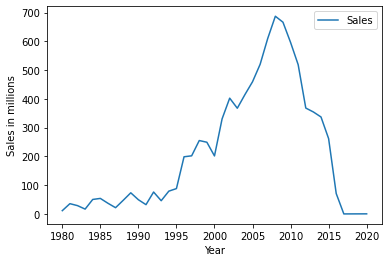

In [ ]:
graph_groupby('Year')

2005 - 2010년 사이 출시된 게임이 현재로 추정되는 2015-2020년 시점에서 가장 인기 많음.

<AxesSubplot:xlabel='Year'>

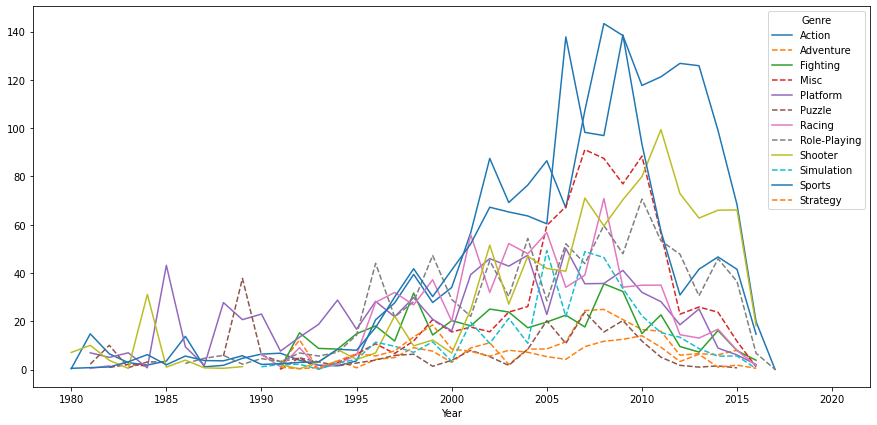

In [ ]:
fig = plt.figure(figsize=(15,7))
ax = fig.add_subplot(111)
styles=['-', '--']*10
df_melt.groupby(['Year', 'Genre']).sum()['Sales'].unstack().plot(ax=ax, style=styles)

대부분 장르가 비슷한 양상을 띈다.
사실 뭘 봐야할지 잘 모르겠고, 그래프 그리는 방법도 너무 어려워서 체크리스트 따라가면서 보는게 나을 듯

### 지역에 따라서 선호하는 게임 장르가 다를까 라는 질문에 대답했는가?

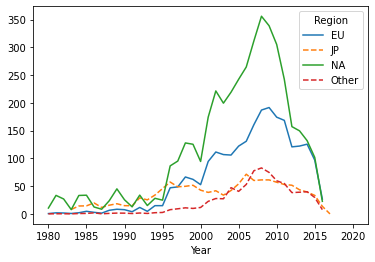

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
styles=['-', '--']*10
df_melt.groupby(['Year', 'Region']).sum()['Sales'].unstack().plot(ax=ax, style=styles);

In [ ]:
colorlist = ['black', 'gray', 'red', 'orange', 'lime', 'green', 'aqua', 'deepskyblue', 'royalblue', 'mediumpurple', 'indigo', 'magenta', 'yellow', 'yellowgreen', 'peru', 'lightsalmon']
colors = {i[0]:i[1] for i in zip(df_melt['Genre'].unique(), colorlist[:len(df_melt['Genre'].unique())])}

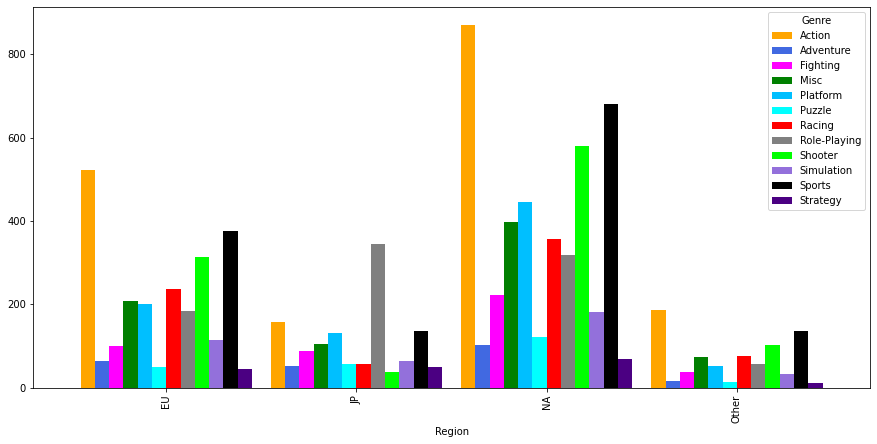

In [ ]:
fig = plt.figure(figsize=(15,7))
ax = fig.add_subplot(111)
styles=['-', '--']*10
df_melt.groupby(['Region', 'Genre']).sum()['Sales'].unstack().plot(ax=ax, kind='bar', style=styles, width=0.9, color=colors);

#### 지역은 어떻게 구분했는지 설명함

출고량이 지역별로 EU, JP, NA, Other로 구분되어 있기 때문에 이것으로 지역을 구분한다. 추가적으로 원본 데이터를 보면 게임 이름 자체가 특정 지역으로 발매한 것인데 출고량이 다른 지역에서도 측정되는 것을 보아, 출고량 칼럼으로 지역의 구매량을 말할 수 있다.

#### 지역별로 선호하는 게임의 장르를 파악

sort_values로 얻어낼 수 있을 것 같다.

In [ ]:
df_rg = df_melt.groupby(['Genre', 'Region']).sum()['Sales'].unstack()
best_3 = {i: df_rg[i].sort_values(ascending=False).iloc[:3].index.to_list() for i in df_rg.columns}
best_3

{'EU': ['Action', 'Sports', 'Shooter'],
 'JP': ['Role-Playing', 'Action', 'Sports'],
 'NA': ['Action', 'Sports', 'Shooter'],
 'Other': ['Action', 'Sports', 'Shooter']}

#### 지역별로 선호하는 게임의 장르가 같은지 다른지 파악

눈으로 보면 EU, NA, Other에서 Action, Sports, Shooter의 순위를 매길 수 있다. JP는 Action과 Sports가 인기 있지만, Role-Playing이 제일 핫함.<br>
$\chi^2$ two-way test 해볼 수 있을 것 같음.<br>

##### Anova
잘 못 이해함. 사용할 수 없음.

다시
- 한 사람이 게임 구매한 개수 https://gamefaqs.gamespot.com/boards/264562-playstation-5/79372589
  - 이게 연도별로 차이가 있을 수 있는데, 걍 합시다.
- 한 사람이 전체 연도 내에 구매한 게임들의 장르별 합이 하나의 observation이 될 것이다.
- 이걸로 two way anova 할 수 있음.

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [ ]:
df_anova = df_melt.groupby(['Genre', 'Region']).sum()['Sales'].unstack()

In [ ]:
df_anova

Region            EU      JP      NA   Other
Genre                                       
Action        521.90  156.88  869.98  186.37
Adventure      63.70   51.92  101.79   16.70
Fighting      100.18   87.15  221.43   36.24
Misc          208.92  105.20  397.11   72.93
Platform      201.12  130.53  445.47   51.46
Puzzle         50.52   56.24  122.17   12.49
Racing        236.82   56.33  357.28   76.93
Role-Playing  183.16  343.42  318.84   56.79
Shooter       312.89   38.20  580.71  102.59
Simulation    113.05   63.54  181.88   31.37
Sports        375.64  135.10  680.60  134.60
Strategy       45.05   49.13   68.20   11.30

In [ ]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

In [ ]:
anova_scaled = scaler.fit_transform(df_anova)

In [ ]:
anova_scaled_df = pd.DataFrame(anova_scaled, index=df_anova.index, columns=df_anova.columns)

In [ ]:
anova_scaled_df.reset_index(inplace=True)
anova_scaled_df

Region         Genre        EU        JP        NA     Other
0             Action  2.310441  0.628335  2.131524  2.357961
1          Adventure -0.989357 -0.671344 -1.092634 -0.960628
2           Fighting -0.726641 -0.235105 -0.590495 -0.578443
3               Misc  0.056467 -0.011598  0.146849  0.139179
4           Platform  0.000294  0.302053  0.349820 -0.280754
5             Puzzle -1.084275 -0.617851 -1.007097 -1.042972
6             Racing  0.257393 -0.616737 -0.020321  0.217415
7       Role-Playing -0.129048  2.938188 -0.181657 -0.176504
8            Shooter  0.805223 -0.841234  0.917434  0.719301
9         Simulation -0.633956 -0.527458 -0.756489 -0.673696
10            Sports  1.257127  0.358642  1.336680  1.345387
11          Strategy -1.123668 -0.705892 -1.233614 -1.066247

In [ ]:
anova_scaled_melt = pd.melt(anova_scaled_df, id_vars=['Genre'], value_name='Scaled_Sales')

In [ ]:
anova_melt = pd.melt(df_anova.reset_index(), id_vars=['Genre'], value_name='Scaled_Sales')

In [ ]:
formula = 'Scaled_Sales ~ C(Region) + C(Genre) + C(Region):C(Genre)'
lm = ols(formula, anova_scaled_melt).fit()
print(anova_lm(lm))

                      df        sum_sq       mean_sq    F  PR(>F)
C(Region)            3.0  3.749593e-30  1.249864e-30  0.0     NaN
C(Genre)            11.0  3.466866e+01  3.151696e+00  0.0     NaN
C(Region):C(Genre)  33.0  1.333134e+01  4.039800e-01  0.0     NaN
Residual             0.0  7.279389e-28           inf  NaN     NaN


/usr/local/lib/python3.9/dist-packages/statsmodels/stats/anova.py:138: RuntimeWarning: divide by zero encountered in double_scalars
  (model.ssr / model.df_resid))


anova 다시

In [ ]:
import pandas as pd
import numpy as np

df_melt = pd.read_csv('https://raw.githubusercontent.com/yjmd2222/Section-1-Project/main/df_melt_n142.csv')
df_melt.fillna('NA_', inplace=True)
df_anova = df_melt.groupby(['Genre', 'Region']).sum()['Sales'].unstack()

df_anova

Region            EU      JP     NA_   Other
Genre                                       
Action        521.90  156.88  869.98  186.37
Adventure      63.70   51.92  101.79   16.70
Fighting      100.18   87.15  221.43   36.24
Misc          208.92  105.20  397.11   72.93
Platform      201.12  130.53  445.47   51.46
Puzzle         50.52   56.24  122.17   12.49
Racing        236.82   56.33  357.28   76.93
Role-Playing  183.16  343.42  318.84   56.79
Shooter       312.89   38.20  580.71  102.59
Simulation    113.05   63.54  181.88   31.37
Sports        375.64  135.10  680.60  134.60
Strategy       45.05   49.13   68.20   11.30

In [ ]:
list1 = []
for col in df_anova.columns:
  list1.append(df_anova[col] / df_anova[col].sum())

df_anova_prob = pd.DataFrame(list1).T
df_anova_prob

EU        JP       NA_     Other
Genre                                               
Action        0.216291  0.123175  0.200204  0.235980
Adventure     0.026399  0.040765  0.023424  0.021145
Fighting      0.041518  0.068426  0.050957  0.045887
Misc          0.086583  0.082598  0.091385  0.092343
Platform      0.083350  0.102486  0.102514  0.065158
Puzzle        0.020937  0.044157  0.028114  0.015815
Racing        0.098145  0.044228  0.082219  0.097408
Role-Playing  0.075907  0.269637  0.073373  0.071907
Shooter       0.129671  0.029993  0.133636  0.129899
Simulation    0.046851  0.049889  0.041855  0.039720
Sports        0.155677  0.106074  0.156623  0.170429
Strategy      0.018670  0.038574  0.015695  0.014308

In [ ]:
df_anova_prob.sample(1000, weights='EU', replace=True)['EU'] # https://stackoverflow.com/questions/61407071/random-sampling-row-in-pandas-using-probability-column

Genre
Racing      0.098145
Action      0.216291
Platform    0.083350
Action      0.216291
Racing      0.098145
              ...   
Shooter     0.129671
Shooter     0.129671
Shooter     0.129671
Action      0.216291
Fighting    0.041518
Name: EU, Length: 1000, dtype: float64

In [ ]:
purch_singl_person = round(np.array([2,29,35,8,11,28,10,57]).dot(np.array([1,3,6,9,10,13,18,23])) / 180) # https://gamefaqs.gamespot.com/boards/264562-playstation-5/79372589

In [ ]:
df_anova_yearly = df_melt.groupby(['Year', 'Genre', 'Region']).sum()['Sales'].unstack()
df_anova_yearly

Region               EU    JP   NA_  Other
Year Genre                                
1980 Action        0.02   NaN  0.32    NaN
     Fighting      0.04   NaN  0.72   0.01
     Misc          0.15   NaN  2.53   0.02
     Shooter       0.43   NaN  6.56   0.08
     Sports        0.03   NaN  0.46   0.01
...                 ...   ...   ...    ...
2016 Sports        7.36  0.78  4.57   1.92
     Strategy      0.32  0.05  0.11   0.04
2017 Action         NaN  0.01   NaN    NaN
     Role-Playing   NaN  0.04   NaN    NaN
2020 Simulation     NaN   NaN  0.27   0.02

[389 rows x 4 columns]

In [ ]:
df_anova_yearly.loc[1980]

Region      EU  JP   NA_  Other
Genre                          
Action    0.02 NaN  0.32    NaN
Fighting  0.04 NaN  0.72   0.01
Misc      0.15 NaN  2.53   0.02
Shooter   0.43 NaN  6.56   0.08
Sports    0.03 NaN  0.46   0.01

In [ ]:
def yearly_prob(df):
  dict1 = {}
  for j in np.arange(1980,2021):
    listj = []
    for col in ['EU', 'JP', 'NA_', 'Other']:
      try: listj.append(df.loc[j,col] / df.loc[j,col].sum())
      except: continue

    dict1[j] = pd.DataFrame(listj).T.fillna(0)
  return dict1

yearly_data = yearly_prob(df_anova_yearly)

In [ ]:
df_anova_prob.sample(purch_singl_person, weights='EU', replace=True)['EU'].index.value_counts()

Sports          4
Platform        3
Misc            3
Fighting        1
Racing          1
Role-Playing    1
Name: Genre, dtype: int64

In [ ]:
purch_singl_person = round(np.array([2,29,35,8,11,28,10,57]).dot(np.array([1,3,6,9,10,13,18,23])) / 180) # https://gamefaqs.gamespot.com/boards/264562-playstation-5/79372589
def get_samples(df):
  dictyear = {}
  for j in range(1980,2021):
    dictyear[j] = {}
    for col in ['EU', 'JP', 'NA_', 'Other']:
      dictcol = {}
      list_ = []
      for _ in range(100):
        try: list_.append(df[j].sample(purch_singl_person, weights=col, replace=True)[col].index.value_counts()) # 같은 사람이 동일한 게임 구매하지 않을 것 같음. replace=False가 원래 맞는 듯.
        except: continue
        dictcol[col] = pd.DataFrame(list_).T.fillna(0)
      dictyear[j][col] = dictcol
  return dictyear

test = get_samples(yearly_data)
test

{1980: {'EU': {'EU':           Genre  Genre  Genre  Genre  Genre  Genre  Genre  Genre  Genre  \
   Shooter     8.0    7.0    9.0    6.0   11.0    8.0   10.0   10.0    9.0   
   Misc        4.0    5.0    3.0    6.0    1.0    4.0    3.0    1.0    3.0   
   Sports      1.0    NaN    NaN    NaN    1.0    NaN    NaN    NaN    NaN   
   Action      NaN    1.0    1.0    NaN    NaN    NaN    NaN    2.0    1.0   
   Fighting    NaN    NaN    NaN    1.0    NaN    1.0    NaN    NaN    NaN   
   
             Genre  ...  Genre  Genre  Genre  Genre  Genre  Genre  Genre  Genre  \
   Shooter     8.0  ...   10.0   10.0    7.0    6.0    6.0    6.0    7.0    8.0   
   Misc        3.0  ...    2.0    1.0    5.0    4.0    5.0    6.0    5.0    3.0   
   Sports      1.0  ...    NaN    1.0    1.0    1.0    1.0    NaN    NaN    2.0   
   Action      NaN  ...    NaN    NaN    NaN    NaN    NaN    1.0    NaN    NaN   
   Fighting    1.0  ...    1.0    1.0    NaN    2.0    1.0    NaN    1.0    NaN   
   
        

In [ ]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from sklearn.preprocessing import StandardScaler

sscaler = StandardScaler()

In [ ]:
def my_anova(data):
  formula = 'Sales ~ C(Region) + C(index) + C(Region):C(index)'
  dictp = {}
  for j in range(1980,2021):
    four_in_four = []
    for col in ['EU', 'JP', 'NA_', 'Other']:
      try:
        melt_ = pd.melt(data[j][col][col].reset_index(), id_vars='index', value_name='Sales')
        one_in_four = pd.concat([melt_.drop('variable', axis=1),pd.Series(len(melt_)*[col], name='Region')], axis=1)
        four_in_four.append(one_in_four)
      except: continue
    try:
      lm = ols(formula, pd.concat(four_in_four)).fit()
      dictp[j] = anova_lm(lm).iloc[2,4]
    except: continue
  return dictp, pd.DataFrame([i for i in dictp.items()], columns=['Year', 'pvalue'])

In [ ]:
p_value_dict, _ = my_anova(test)

In [ ]:
p_value_df = pd.DataFrame([i for i in p_value_dict.items()], columns=['Year', 'pvalue'])
p_value_df.sort_values('pvalue', ascending=False)

Year         pvalue
2   1982   1.293940e-02
0   1980   3.284536e-08
1   1981   3.018972e-08
25  2005   4.664575e-40
27  2007   7.849553e-43
12  1992   2.588451e-43
9   1989   7.135317e-48
18  1998   4.328739e-49
21  2001   6.817312e-52
31  2011   3.221707e-54
19  1999   3.623494e-64
29  2009   5.136878e-71
16  1996   1.294536e-74
23  2003   4.084531e-75
11  1991   2.340143e-77
15  1995   1.264734e-84
28  2008   5.193817e-89
26  2006   6.998138e-94
17  1997   9.884977e-96
3   1983   1.130163e-97
32  2012  9.359794e-101
35  2015  1.443500e-109
22  2002  3.384398e-111
20  2000  1.227580e-114
5   1985  6.749131e-125
33  2013  7.139218e-126
36  2016  6.457230e-135
7   1987  1.120270e-141
10  1990  4.965840e-142
8   1988  3.445674e-149
24  2004  3.571695e-152
30  2010  1.289623e-165
14  1994  1.289254e-172
34  2014  5.757596e-201
13  1993  1.777348e-276
4   1984   0.000000e+00
6   1986   0.000000e+00
37  2017            NaN
38  2020            NaN

모든 연도 다 다르다고 나옴. 카이 제곱이 젤 쉬웠던 것 같음.<br>
그럼 연도 다 묶어서 해보기

In [ ]:
list1 = []
for col in df_anova.columns:
  list1.append(df_anova[col] / df_anova[col].sum())

df_anova_prob = pd.DataFrame(list1).T
df_anova_prob

purch_singl_person = round(np.array([2,29,35,8,11,28,10,57]).dot(np.array([1,3,6,9,10,13,18,23])) / 180) # https://gamefaqs.gamespot.com/boards/264562-playstation-5/79372589
def get_samples_all(df):
  dictcol = {}
  for col in ['EU', 'JP', 'NA_', 'Other']:
    list_ = []
    for _ in range(100):
      list_.append(df.sample(purch_singl_person, weights=col, replace=True)[col].index.value_counts()) # 같은 사람이 동일한 게임 구매하지 않을 것 같음. replace=False가 원래 맞는 듯.
      dictcol[col] = pd.DataFrame(list_).T.fillna(0)
  return dictcol

testall = get_samples_all(df_anova_prob)
testall

{'EU':               Genre  Genre  Genre  Genre  Genre  Genre  Genre  Genre  Genre  \
 Sports          3.0    3.0    2.0    3.0    3.0    3.0    3.0    2.0    0.0   
 Simulation      2.0    1.0    0.0    1.0    0.0    0.0    0.0    2.0    1.0   
 Action          2.0    1.0    2.0    4.0    5.0    1.0    3.0    1.0    2.0   
 Fighting        1.0    1.0    1.0    0.0    2.0    0.0    2.0    0.0    0.0   
 Platform        1.0    0.0    1.0    0.0    1.0    1.0    2.0    2.0    1.0   
 Misc            1.0    1.0    1.0    3.0    1.0    1.0    1.0    1.0    2.0   
 Racing          1.0    2.0    0.0    1.0    0.0    3.0    0.0    2.0    2.0   
 Shooter         1.0    2.0    1.0    1.0    1.0    2.0    1.0    1.0    4.0   
 Adventure       1.0    0.0    2.0    0.0    0.0    1.0    0.0    0.0    0.0   
 Role-Playing    0.0    2.0    2.0    0.0    0.0    1.0    0.0    1.0    1.0   
 Puzzle          0.0    0.0    1.0    0.0    0.0    0.0    0.0    1.0    0.0   
 Strategy        0.0    0.0    0.0

In [ ]:
def my_anova_all(data):
  formula = 'Sales ~ C(Region) + C(index) + C(Region):C(index)'
  four_in_four = []
  for col in ['EU', 'JP', 'NA_', 'Other']:
    try:
      melt_ = pd.melt(data[col].reset_index(), id_vars='index', value_name='Sales')
      one_in_four = pd.concat([melt_.drop('variable', axis=1),pd.Series(len(melt_)*[col], name='Region')], axis=1)
      four_in_four.append(one_in_four)
    except: continue
  lm = ols(formula, pd.concat(four_in_four)).fit()
  return anova_lm(lm), pd.concat(four_in_four)

pvalue, testdf = my_anova_all(testall)

In [ ]:
pvalue

df        sum_sq       mean_sq             F  \
C(Region)              3.0  1.293821e-25  4.312735e-26  4.354281e-26   
C(index)              11.0  2.144347e+03  1.949406e+02  1.968185e+02   
C(Region):C(index)    33.0  9.036600e+02  2.738364e+01  2.764743e+01   
Residual            4752.0  4.706660e+03  9.904588e-01           NaN   

                           PR(>F)  
C(Region)            1.000000e+00  
C(index)             0.000000e+00  
C(Region):C(index)  1.344546e-154  
Residual                      NaN

In [ ]:
testdf.groupby(['index','Region']).sum()

Sales
index        Region       
Action       EU      292.0
             JP      160.0
             NA_     267.0
             Other   301.0
Adventure    EU       36.0
             JP       60.0
             NA_      45.0
             Other    33.0
Fighting     EU       61.0
             JP       78.0
             NA_      65.0
             Other    60.0
Misc         EU      108.0
             JP      106.0
             NA_     112.0
             Other   119.0
Platform     EU      108.0
             JP      128.0
             NA_     140.0
             Other    84.0
Puzzle       EU       25.0
             JP       44.0
             NA_      35.0
             Other    16.0
Racing       EU      126.0
             JP       69.0
             NA_     108.0
             Other   136.0
Role-Playing EU       88.0
             JP      359.0
             NA_      86.0
             Other    83.0
Shooter      EU      161.0
             JP       40.0
             NA_     163.0
             Other   167.0
Simulation   EU       61.0
             JP       66.0
             NA_      50.0
             Other    55.0
Sports       EU      213.0
             JP      148.0
             NA_     198.0
             Other   233.0
Strategy     EU       21.0
             JP       42.0
             NA_      31.0
             Other    13.0

p값 $1.34 \times 10^{-154}$로 매우 작다.<br>
귀무가설: 지역별 장르 선호도가 없다.<br>
대립가설: 지역별 장르 선호도가 있다.<br>
귀무가설 기각. 샘플이 너무 커서 그렇다고 가정. 카이 제곱으로 잘 설명할 수 있을 듯.

##### chi square

In [ ]:
df_chi = df_melt.groupby(['Genre', 'Region']).sum()['Sales'].unstack()

In [ ]:
from scipy.stats import chi2_contingency

In [ ]:
chi2_contingency(df_chi)

Chi2ContingencyResult(statistic=693.8378548205117, pvalue=1.0308147897517603e-124, dof=33, expected_freq=array([[474.59389712, 250.50737526, 854.69189009, 155.33683753],
       [ 64.03392095,  33.79935891, 115.31811356,  20.95860658],
       [121.71669225,  64.24635733, 219.19849872,  39.8384517 ],
       [214.48395819, 113.21218778, 386.26223541,  70.20161862],
       [226.63374576, 119.62527361, 408.14267881,  74.17830182],
       [ 66.03335695,  34.85473165, 118.91887991,  21.61303148],
       [198.94798488, 105.01175386, 358.28364052,  65.11662074],
       [246.77307171, 130.2555192 , 444.41141019,  80.7699989 ],
       [282.92703212, 149.33885294, 509.52075302,  92.60336193],
       [106.62929282,  56.2826965 , 192.0277365 ,  34.90027418],
       [362.67197959, 191.43104502, 653.13271325, 118.70426214],
       [ 47.50506766,  25.07484796,  85.55145002,  15.54863436]]))

In [ ]:
chi2_contingency(df_chi.loc[:,['EU','Other']])

Chi2ContingencyResult(statistic=7.736773100444863, pvalue=0.7366712646621307, dof=11, expected_freq=array([[533.61520723, 174.65479277],
       [ 60.57388095,  19.82611905],
       [102.77971193,  33.64028807],
       [212.34761624,  69.50238376],
       [190.29540859,  62.28459141],
       [ 47.47214227,  15.53785773],
       [236.38128294,  77.36871706],
       [180.77988475,  59.17011525],
       [313.0253241 , 102.4546759 ],
       [108.80696377,  35.61303623],
       [384.4181221 , 125.8218779 ],
       [ 42.45445512,  13.89554488]]))

샘플 사이즈가 너무 크다.
- [500 이상](https://www.statisticssolutions.com/free-resources/directory-of-statistical-analyses/using-chi-square-statistic-in-research/#:~:text=There%20are%20a%20number%20of,difference%20will%20appear%20statistically%20significant)
- [샘플링 해보기](https://pubmed.ncbi.nlm.nih.gov/26075668/#:~:text=Chi%2Dsquare%20is%20also%20sensitive,in%20the%20analysis%20of%20fit)
- 단순히 샘플 사이즈가 크기 때문에 p-value가 유의미해진다는게 이거군.

minmaxscaler를 해보겠다. https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler((1,10))
data = scaler.fit_transform(df_chi)
chi2_contingency(data)

Chi2ContingencyResult(statistic=17.06346755872832, pvalue=0.9900515804129706, dof=33, expected_freq=array([[9.04301949, 6.88447836, 9.85543955, 8.71657114],
       [1.41838765, 1.07982285, 1.54581485, 1.36718459],
       [2.48647973, 1.89296462, 2.70986375, 2.39671909],
       [4.17525613, 3.17863525, 4.55035892, 4.02453153],
       [4.1854264 , 3.1863779 , 4.56144288, 4.03433466],
       [1.3898072 , 1.05806447, 1.51466674, 1.33963587],
       [3.87226973, 2.94797078, 4.22015239, 3.73248279],
       [5.44126474, 4.14245147, 5.93010507, 5.24483788],
       [5.11164584, 3.89151159, 5.57087338, 4.92711805],
       [2.18567408, 1.66396036, 2.38203388, 2.10677237],
       [6.89627996, 5.250159  , 7.51583809, 6.6473278 ],
       [1.13296025, 0.8625261 , 1.2347448 , 1.09206097]]))

In [ ]:
sumtable = df_chi.sum(axis=1)
sumtable

Genre
Action          1735.13
Adventure        234.11
Fighting         445.00
Misc             784.16
Platform         828.58
Puzzle           241.42
Racing           727.36
Role-Playing     902.21
Shooter         1034.39
Simulation       389.84
Sports          1325.94
Strategy         173.68
dtype: float64

- 우선 이 스케일링을 해본 이유를 적어서 나중에 안 까먹게...
- 위 합계 test contingency table 보면 minimum과 maximum 차이가 10 배 정도이다. 그래서 1에서 10으로 정함.

이제 sampling으로 해보기기

In [ ]:
data[:,0].sum()

47.33847121736396

50개 샘플링 해보기

In [ ]:
# list1 = [[],[],[],[]]
# for idx, column in enumerate(df_chi.columns):
#   for i in (df_chi * 1000000).astype(int)[column]:
#     list1[idx].append([1] * i)

날려먹음ㅋ 램 초과

In [ ]:
# list1 = [[],[],[],[]]
# for idx, column in enumerate(df_chi.columns):
#   for i in (df_chi * 100).astype(int)[column]:
#     list1[idx].append([1] * i)

100개 단위로 해도 램 초과. 다른 workspace에서 나중에 해보도록 하기.

우선 minmaxscaler 1,10으로 잡았을 때
- 귀무가설: 각 지역의 게임 출고량 사이에 관계가 없다.
- 대립가설: 각 지역의 게임 출고량 사이에 관계가 있다.

0.05 유의 수준에서 p-값이 0.979이므로 귀무가설을 기각할 수 없다.
- 쉽게 말해서 각 지역별 선호하는 게임의 장르가 비슷하다.

In [ ]:
def chi2_(df, scale=(1,10)):
  scaler = MinMaxScaler(scale)
  data = scaler.fit_transform(df)
  return chi2_contingency(data), data[:,0].sum()

In [ ]:
chi2_(df_chi, (2.2,22))

(Chi2ContingencyResult(statistic=37.539628629202284, pvalue=0.26884010665471453, dof=33, expected_freq=array([[19.89464289, 15.1458524 , 21.68196702, 19.17645651],
        [ 3.12045284,  2.37561028,  3.40079266,  3.00780609],
        [ 5.47025541,  4.16452215,  5.96170025,  5.272782  ],
        [ 9.18556349,  6.99299754, 10.01078962,  8.85396937],
        [ 9.20793807,  7.01003138, 10.03517433,  8.87553624],
        [ 3.05757584,  2.32774183,  3.33226682,  2.94719892],
        [ 8.51899341,  6.48553571,  9.28433525,  8.21146213],
        [11.97078243,  9.11339323, 13.04623115, 11.53864333],
        [11.24562085,  8.5613255 , 12.25592144, 10.83965972],
        [ 4.80848298,  3.66071278,  5.24047454,  4.63489922],
        [15.17181592, 11.55034981, 16.53484379, 14.62412117],
        [ 2.49251255,  1.89755742,  2.71643855,  2.40253413]])),
 104.14463667820071)

- p-값이 no reject null이 나올 때까지 돌려보았다. 2.2부터 22까지 scale했을 때 p-값 0.269. 104개 샘플링이라고 간주
- 3.3부터는 안 됨.

### 연도별 게임의 트렌드가 있을까 라는 질문에 대답했는가?

#### 트렌드는 어떤 것을 기준으로 파악했는지 설명함

여러 종류의 트렌드를 생각해볼 수 있을 것이다. 내가 생각하는 중요도 순위로 나열하자면
- 장르: 어떤 장르가 유행하는지. 사회적인 이슈가 되는 부분을 풍자 또는 몰입하기 위해 게임을 만들어볼 수 있을 것이다. 예를 들어 월드컵 시즌에 게임 판매 포함 FIFA는 revenue가 거대함. https://www.investopedia.com/articles/investing/070915/how-does-fifa-make-money.asp#:~:text=FIFA%20makes%20money%20through%20the,than%20%244.6%20billion%20in%20revenue.
- 플랫폼: 어떤 플랫폼에서 게임이 구동 가능하냐에 따라서 수익이 변화할 것을 고려해볼 수 있을 듯. 다양한 플랫폼으로 출시하면 다양한 플랫폼 소유자가 회사의 게임을 즐길 수 있겠다는 기대를 할 수 있음. 또는 특정 플랫폼이 인기가 많을 수 있어서 그쪽으로 프로모션 넣을 수도 있음.
- 퍼블리셔: 소비자는 게임 잘 만들기로 소문난 퍼블리셔의 다른 게임을 구매할 수 있음. 개발자 입장에서는 유명한 게임 회사의 최근 동향이 어떻게 되는지 분석해볼 수 있다.

순차적으로 본다면 장르부터 봐야할 것이고, 뭐가 더 중요한지에 대해서는 PCA를 해볼 수 있을 것 같음. 차원 축소하는 것이 항상 트렌디한 것을 없애 버릴 수 있기 때문에 고민 잘 해봐야 할 것 같음.

그 전에 다시 생각했어야 함. 이 데이터셋의 연도는 출시연도지, 연도별 출고량이 아님. 다른 자료 찾아봐야함.

##### 장르

<AxesSubplot:xlabel='Year'>

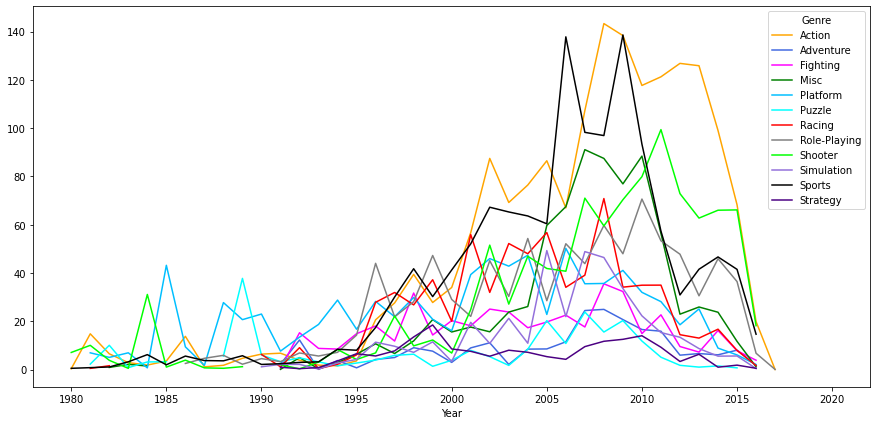

In [ ]:
fig = plt.figure(figsize=(15,7))
ax = fig.add_subplot(111)
df_melt.groupby(['Year', 'Genre']).sum()['Sales'].unstack().plot(ax=ax, color=colors)

눈에 띄는 최대값들을 나열하자면
- 1984: Shooter
- 1985: Platform
- 1989: Puzzle
- 1996부터는 전체적으로 성장 추세. Strategy만 아닌 것 같다. 퍼즐도. 둘이 애초에 비슷한 장르 같음.
- 1996: Role-Playing
- 2002: Action
- 2011: Shooter

최근 들어서는 Puzzle 인기 없음. 성장 추세가 보이는 1995년부터 데이터 잘라도 될듯.

In [ ]:
df_clean

Name Platform  Year         Genre  \
0                        '98 Koshien       PS  1998        Sports   
1         .hack//G.U. Vol.1//Rebirth      PS2  2006  Role-Playing   
2       .hack//G.U. Vol.2//Reminisce      PS2  2006  Role-Playing   
3      .hack//G.U. Vol.2//Reminisce       PS2  2006  Role-Playing   
4      .hack//G.U. Vol.3//Redemption      PS2  2007  Role-Playing   
...                              ...      ...   ...           ...   
16347     thinkSMART: Chess for Kids       DS  2011          Misc   
16348                   uDraw Studio      Wii  2010          Misc   
16350   uDraw Studio: Instant Artist     X360  2011          Misc   
16349   uDraw Studio: Instant Artist      Wii  2011          Misc   
16351   ¡Shin Chan Flipa en colores!       DS  2007      Platform   

                Publisher  index  NA_Sales  EU_Sales  JP_Sales  Other_Sales  \
0         Magical Company  12910      0.15      0.10      0.12         0.03   
1      Namco Bandai Games  15930      0.00      0.00      0.17         0.00   
2      Namco Bandai Games   7132      0.11      0.09      0.00         0.03   
3      Namco Bandai Games  10647      0.00      0.00      0.16         0.00   
4      Namco Bandai Games  13148      0.00      0.00      0.17         0.00   
...                   ...    ...       ...       ...       ...          ...   
16347  Mentor Interactive   3495      0.01      0.00      0.00         0.00   
16348                 THQ  13964      1.67      0.58      0.00         0.20   
16350                 THQ   3062      0.01      0.01      0.00         0.00   
16349                 THQ  15021      0.08      0.09      0.00         0.02   
16351           505 Games    215      0.00      0.00      0.14         0.00   

          id  
0      12910  
1      15930  
2       7132  
3      10647  
4      13148  
...      ...  
16347   3495  
16348  13964  
16350   3062  
16349  15021  
16351    215  

[16352 rows x 11 columns]

In [ ]:
df_clean.drop('id', axis=1).to_csv('df_clean_n142_2.csv', index=False) # 이제 보니 고유번호 의미 없음 melt 전까지는.

In [ ]:
df_melt.to_csv('df_melt_n142.csv', index=False)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import pandas as pd
import numpy as np

In [ ]:
df_clean = pd.read_csv('https://raw.githubusercontent.com/yjmd2222/Section-1-Project/main/df_clean_n142_2.csv')
df_clean

Name Platform  Year         Genre  \
0                        '98 Koshien       PS  1998        Sports   
1         .hack//G.U. Vol.1//Rebirth      PS2  2006  Role-Playing   
2       .hack//G.U. Vol.2//Reminisce      PS2  2006  Role-Playing   
3      .hack//G.U. Vol.2//Reminisce       PS2  2006  Role-Playing   
4      .hack//G.U. Vol.3//Redemption      PS2  2007  Role-Playing   
...                              ...      ...   ...           ...   
16347     thinkSMART: Chess for Kids       DS  2011          Misc   
16348                   uDraw Studio      Wii  2010          Misc   
16349   uDraw Studio: Instant Artist     X360  2011          Misc   
16350   uDraw Studio: Instant Artist      Wii  2011          Misc   
16351   ¡Shin Chan Flipa en colores!       DS  2007      Platform   

                Publisher  index  NA_Sales  EU_Sales  JP_Sales  Other_Sales  
0         Magical Company  12910      0.15      0.10      0.12         0.03  
1      Namco Bandai Games  15930      0.00      0.00      0.17         0.00  
2      Namco Bandai Games   7132      0.11      0.09      0.00         0.03  
3      Namco Bandai Games  10647      0.00      0.00      0.16         0.00  
4      Namco Bandai Games  13148      0.00      0.00      0.17         0.00  
...                   ...    ...       ...       ...       ...          ...  
16347  Mentor Interactive   3495      0.01      0.00      0.00         0.00  
16348                 THQ  13964      1.67      0.58      0.00         0.20  
16349                 THQ   3062      0.01      0.01      0.00         0.00  
16350                 THQ  15021      0.08      0.09      0.00         0.02  
16351           505 Games    215      0.00      0.00      0.14         0.00  

[16352 rows x 10 columns]

In [ ]:
df_clean.drop('index', axis=1, inplace=True)
df_clean

Name Platform  Year         Genre  \
0                        '98 Koshien       PS  1998        Sports   
1         .hack//G.U. Vol.1//Rebirth      PS2  2006  Role-Playing   
2       .hack//G.U. Vol.2//Reminisce      PS2  2006  Role-Playing   
3      .hack//G.U. Vol.2//Reminisce       PS2  2006  Role-Playing   
4      .hack//G.U. Vol.3//Redemption      PS2  2007  Role-Playing   
...                              ...      ...   ...           ...   
16347     thinkSMART: Chess for Kids       DS  2011          Misc   
16348                   uDraw Studio      Wii  2010          Misc   
16349   uDraw Studio: Instant Artist     X360  2011          Misc   
16350   uDraw Studio: Instant Artist      Wii  2011          Misc   
16351   ¡Shin Chan Flipa en colores!       DS  2007      Platform   

                Publisher  NA_Sales  EU_Sales  JP_Sales  Other_Sales  
0         Magical Company      0.15      0.10      0.12         0.03  
1      Namco Bandai Games      0.00      0.00      0.17         0.00  
2      Namco Bandai Games      0.11      0.09      0.00         0.03  
3      Namco Bandai Games      0.00      0.00      0.16         0.00  
4      Namco Bandai Games      0.00      0.00      0.17         0.00  
...                   ...       ...       ...       ...          ...  
16347  Mentor Interactive      0.01      0.00      0.00         0.00  
16348                 THQ      1.67      0.58      0.00         0.20  
16349                 THQ      0.01      0.01      0.00         0.00  
16350                 THQ      0.08      0.09      0.00         0.02  
16351           505 Games      0.00      0.00      0.14         0.00  

[16352 rows x 9 columns]

In [ ]:
df_melt = pd.read_csv('https://raw.githubusercontent.com/yjmd2222/Section-1-Project/main/df_melt_n142.csv')
df_melt

Name Platform  Year         Genre  \
0                       '98 Koshien       PS  1998        Sports   
1      .hack//G.U. Vol.2//Reminisce      PS2  2006  Role-Playing   
2           .hack//Infection Part 1      PS2  2002  Role-Playing   
3            .hack//Mutation Part 2      PS2  2002  Role-Playing   
4            .hack//Outbreak Part 3      PS2  2002  Role-Playing   
...                             ...      ...   ...           ...   
38758     pro evolution soccer 2011      Wii  2010        Sports   
38759     pro evolution soccer 2011     X360  2010        Sports   
38760                    thinkSMART       DS  2010          Misc   
38761                  uDraw Studio      Wii  2010          Misc   
38762  uDraw Studio: Instant Artist      Wii  2011          Misc   

                          Publisher Region  Sales  
0                   Magical Company    NaN   0.15  
1                Namco Bandai Games    NaN   0.11  
2                             Atari    NaN   0.49  
3                             Atari    NaN   0.23  
4                             Atari    NaN   0.14  
...                             ...    ...    ...  
38758  Konami Digital Entertainment  Other   0.02  
38759  Konami Digital Entertainment  Other   0.07  
38760      Conspiracy Entertainment  Other   0.01  
38761                           THQ  Other   0.20  
38762                           THQ  Other   0.02  

[38763 rows x 7 columns]

In [ ]:
df_melt['Region'].value_counts()

EU       10730
Other    10018
JP        6083
Name: Region, dtype: int64

In [ ]:
df_melt.fillna('NA_', inplace=True)

Year와 Sales를 가지고 군집화 해보기. melt와 clean 각각하면 뭐가 다를지 궁금

In [ ]:
features_melt = df_melt[['Year','Sales']]
features_melt

Year  Sales
0      1998   0.15
1      2006   0.11
2      2002   0.49
3      2002   0.23
4      2002   0.14
...     ...    ...
38758  2010   0.02
38759  2010   0.07
38760  2010   0.01
38761  2010   0.20
38762  2011   0.02

[38763 rows x 2 columns]

In [ ]:
scaler = StandardScaler()

In [ ]:
scaled_data = scaler.fit_transform(features_melt)
scaled_data

array([[-1.41740054, -0.11711715],
       [-0.04706197, -0.17749964],
       [-0.73223126,  0.39613399],
       ...,
       [ 0.63810731, -0.32845585],
       [ 0.63810731, -0.04163904],
       [ 0.80939963, -0.31336023]])

In [ ]:
dbclustering = DBSCAN().fit(scaled_data)
dbclustering.labels_

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
pd.DataFrame(dbclustering.labels_).value_counts()

 0    38647
-1       87
 1       13
 3        9
 2        7
dtype: int64

In [ ]:
df_melt['dbscan'] = dbclustering.labels_

In [ ]:
df_melt

Name Platform  Year         Genre  \
0                       '98 Koshien       PS  1998        Sports   
1      .hack//G.U. Vol.2//Reminisce      PS2  2006  Role-Playing   
2           .hack//Infection Part 1      PS2  2002  Role-Playing   
3            .hack//Mutation Part 2      PS2  2002  Role-Playing   
4            .hack//Outbreak Part 3      PS2  2002  Role-Playing   
...                             ...      ...   ...           ...   
38758     pro evolution soccer 2011      Wii  2010        Sports   
38759     pro evolution soccer 2011     X360  2010        Sports   
38760                    thinkSMART       DS  2010          Misc   
38761                  uDraw Studio      Wii  2010          Misc   
38762  uDraw Studio: Instant Artist      Wii  2011          Misc   

                          Publisher Region  Sales  dbscan  
0                   Magical Company    NA_   0.15       0  
1                Namco Bandai Games    NA_   0.11       0  
2                             Atari    NA_   0.49       0  
3                             Atari    NA_   0.23       0  
4                             Atari    NA_   0.14       0  
...                             ...    ...    ...     ...  
38758  Konami Digital Entertainment  Other   0.02       0  
38759  Konami Digital Entertainment  Other   0.07       0  
38760      Conspiracy Entertainment  Other   0.01       0  
38761                           THQ  Other   0.20       0  
38762                           THQ  Other   0.02       0  

[38763 rows x 8 columns]

In [ ]:
import seaborn as sns

<AxesSubplot:xlabel='Year', ylabel='Sales'>

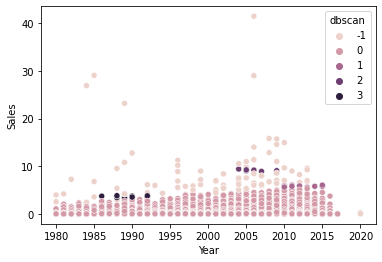

In [ ]:
sns.scatterplot(x='Year', y='Sales', data=df_melt, hue='dbscan')

의미 없게 생겼다. -1은 무작위인데 역설적으로 더 판매량이 많아 보임. 나머지 1,2,3은 몇 개 없고 의미 없을 듯. 0이 대부분

In [ ]:
df_melt_groupby = df_melt.drop('dbscan', axis=1).groupby(['Name', 'Genre', 'Year'], as_index=False).sum()
df_melt_groupby

Name         Genre  Year  Sales
0                        '98 Koshien        Sports  1998   0.40
1         .hack//G.U. Vol.1//Rebirth  Role-Playing  2006   0.17
2       .hack//G.U. Vol.2//Reminisce  Role-Playing  2006   0.23
3      .hack//G.U. Vol.2//Reminisce   Role-Playing  2006   0.16
4      .hack//G.U. Vol.3//Redemption  Role-Playing  2007   0.17
...                              ...           ...   ...    ...
12026             thinkSMART FAMILY!          Misc  2010   0.03
12027     thinkSMART: Chess for Kids          Misc  2011   0.01
12028                   uDraw Studio          Misc  2010   2.45
12029   uDraw Studio: Instant Artist          Misc  2011   0.21
12030   ¡Shin Chan Flipa en colores!      Platform  2007   0.14

[12031 rows x 4 columns]

In [ ]:
df_melt_groupby[['Year','Sales']]

Year  Sales
0      1998   0.40
1      2006   0.17
2      2006   0.23
3      2006   0.16
4      2007   0.17
...     ...    ...
12026  2010   0.03
12027  2011   0.01
12028  2010   2.45
12029  2011   0.21
12030  2007   0.14

[12031 rows x 2 columns]

In [ ]:
def my_dbscan(df, sqrt=True, scale=True):
  if sqrt: df_ = np.sqrt(df['Sales'])
  else: df_ = df['Sales']
  df_ = pd.concat([df['Year'], df_], axis=1)
  if scale: scaled_data = scaler.fit_transform(df_)
  else: scaled_data = df_
  dbclustering = DBSCAN().fit(scaled_data)
  df_ = df.copy()
  df_['dbscan'] = dbclustering.labels_
  sns.scatterplot(data=df_, x='Year', y='Sales', hue='dbscan')
  return df_, dbclustering

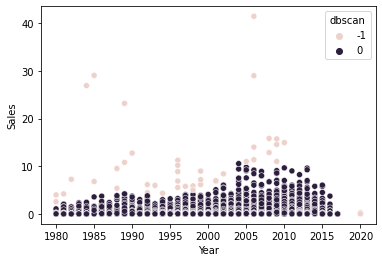

In [ ]:
testdf, dbclustering = my_dbscan(features_melt, True, True)

(       Year  Sales  dbscan
 0      1998   0.15       0
 1      2006   0.11       0
 2      2002   0.49       0
 3      2002   0.23       0
 4      2002   0.14       0
 ...     ...    ...     ...
 38758  2010   0.02       0
 38759  2010   0.07       0
 38760  2010   0.01       0
 38761  2010   0.20       0
 38762  2011   0.02       0
 
 [38763 rows x 3 columns], DBSCAN())

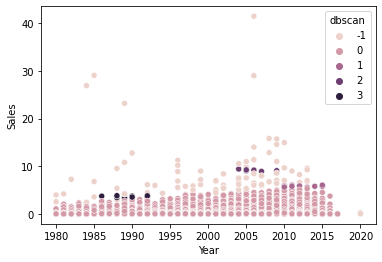

In [ ]:
my_dbscan(features_melt, False, True)

(       Year  Sales  dbscan
 0      1998   0.15       0
 1      2006   0.11       1
 2      2002   0.49       2
 3      2002   0.23       2
 4      2002   0.14       2
 ...     ...    ...     ...
 38758  2010   0.02       7
 38759  2010   0.07       7
 38760  2010   0.01       7
 38761  2010   0.20       7
 38762  2011   0.02       9
 
 [38763 rows x 3 columns], DBSCAN())

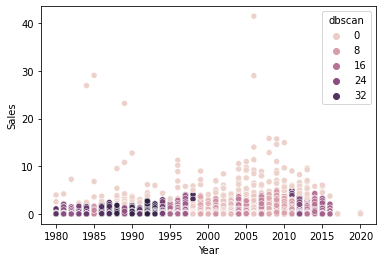

In [ ]:
my_dbscan(features_melt, False, False)

1995년부터

In [ ]:
df_melt_cut = df_melt.query('Year >= 1995')

In [ ]:
df_melt_cut

Name Platform  Year         Genre  \
0                       '98 Koshien       PS  1998        Sports   
1      .hack//G.U. Vol.2//Reminisce      PS2  2006  Role-Playing   
2           .hack//Infection Part 1      PS2  2002  Role-Playing   
3            .hack//Mutation Part 2      PS2  2002  Role-Playing   
4            .hack//Outbreak Part 3      PS2  2002  Role-Playing   
...                             ...      ...   ...           ...   
38758     pro evolution soccer 2011      Wii  2010        Sports   
38759     pro evolution soccer 2011     X360  2010        Sports   
38760                    thinkSMART       DS  2010          Misc   
38761                  uDraw Studio      Wii  2010          Misc   
38762  uDraw Studio: Instant Artist      Wii  2011          Misc   

                          Publisher Region  Sales  dbscan  
0                   Magical Company    NA_   0.15       0  
1                Namco Bandai Games    NA_   0.11       0  
2                             Atari    NA_   0.49       0  
3                             Atari    NA_   0.23       0  
4                             Atari    NA_   0.14       0  
...                             ...    ...    ...     ...  
38758  Konami Digital Entertainment  Other   0.02       0  
38759  Konami Digital Entertainment  Other   0.07       0  
38760      Conspiracy Entertainment  Other   0.01       0  
38761                           THQ  Other   0.20       0  
38762                           THQ  Other   0.02       0  

[37671 rows x 8 columns]

(                               Name Platform  Year         Genre  \
 0                       '98 Koshien       PS  1998        Sports   
 1      .hack//G.U. Vol.2//Reminisce      PS2  2006  Role-Playing   
 2           .hack//Infection Part 1      PS2  2002  Role-Playing   
 3            .hack//Mutation Part 2      PS2  2002  Role-Playing   
 4            .hack//Outbreak Part 3      PS2  2002  Role-Playing   
 ...                             ...      ...   ...           ...   
 38758     pro evolution soccer 2011      Wii  2010        Sports   
 38759     pro evolution soccer 2011     X360  2010        Sports   
 38760                    thinkSMART       DS  2010          Misc   
 38761                  uDraw Studio      Wii  2010          Misc   
 38762  uDraw Studio: Instant Artist      Wii  2011          Misc   
 
                           Publisher Region  Sales  dbscan  
 0                   Magical Company    NA_   0.15       0  
 1                Namco Bandai Games    NA_   0.

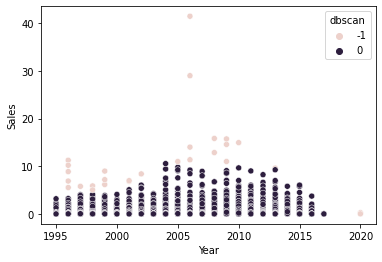

In [ ]:
my_dbscan(df_melt_cut)

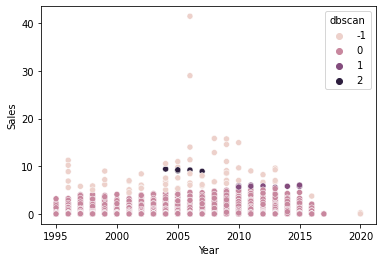

In [ ]:
_, __ = my_dbscan(df_melt_cut, False)

In [ ]:
testdf = df_melt.drop('dbscan', axis=1).groupby(['Year','Genre'], as_index=False).sum()

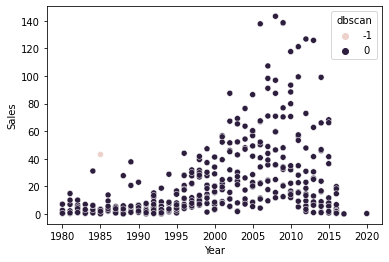

In [ ]:
_, __ = my_dbscan(testdf)

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
def my_kmeans(df, sqrt=True, scale=True):
  if sqrt: df_ = np.sqrt(df['Sales'])
  else: df_ = df['Sales']
  df_ = pd.concat([df['Year'], df_], axis=1)
  if scale: scaled_data = scaler.fit_transform(df_)
  else: scaled_data = df_
  kclustering = KMeans(random_state=42, n_init="auto").fit(scaled_data)
  df_ = df.copy()
  df_['kmeans'] = kclustering.labels_
  fig, ax = plt.subplots(figsize=(15,8))
  sns.scatterplot(data=df_, x='Year', y='Sales', hue='kmeans', ax=ax)
  return df_, kclustering

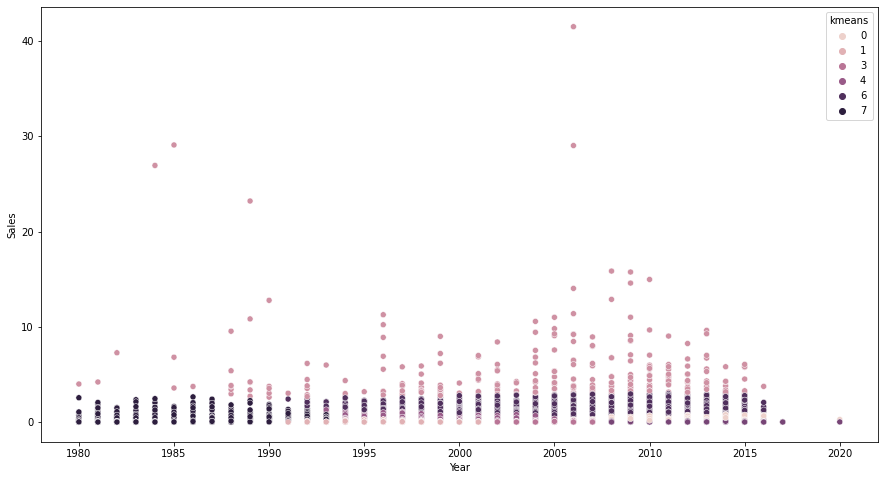

In [ ]:
test_df, _ = my_kmeans(df_melt) # 왜 몇 개 씹히는지 이해 안 감

<AxesSubplot:xlabel='Year', ylabel='Sales'>

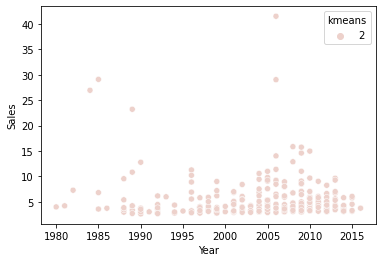

In [ ]:
plot_data = test_df.query('kmeans == 2')
sns.scatterplot(data=plot_data, x='Year', y='Sales', hue='kmeans')

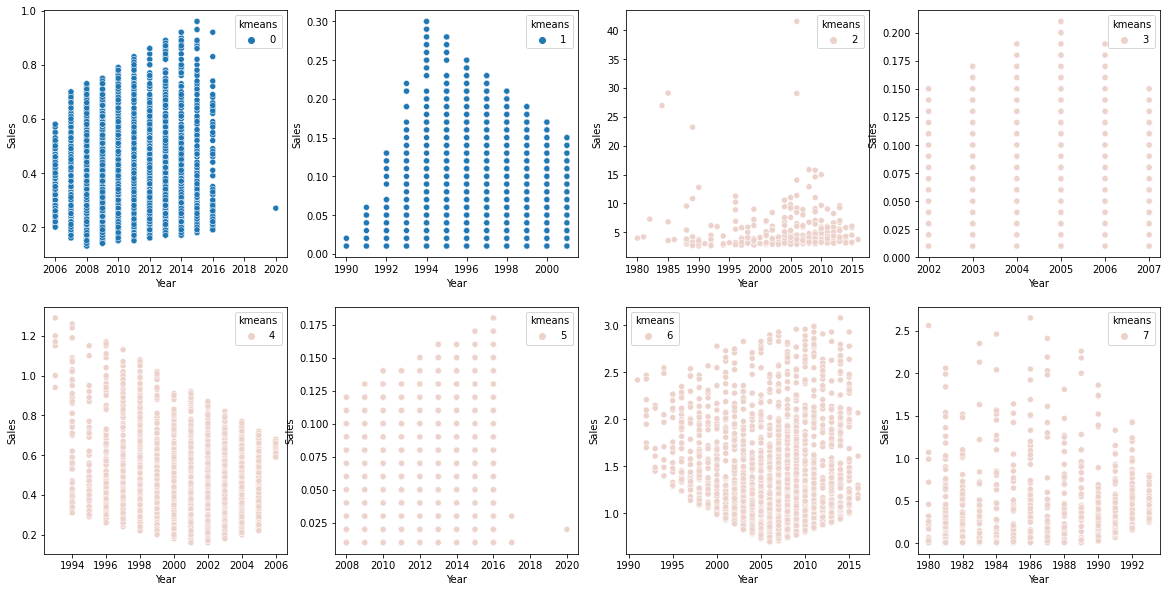

In [ ]:
fig, ax = plt.subplots(2, 4, figsize=[20,10])
for i in range(4):
  plot_data_ = test_df[test_df['kmeans'] == i]
  sns.scatterplot(data=plot_data_, x='Year', y='Sales', hue='kmeans', ax=ax[0,i])
for i in range(4,8):
  plot_data_ = test_df[test_df['kmeans'] == i]
  sns.scatterplot(data=plot_data_, x='Year', y='Sales', hue='kmeans', ax=ax[1,i-4])
ax.title('')

In [ ]:
plot_data.sort_values('Year')

Name Platform  Year         Genre  \
512                       Asteroids     2600  1980       Shooter   
7578                       Pitfall!     2600  1981      Platform   
7341                        Pac-Man     2600  1982        Puzzle   
2781                      Duck Hunt      NES  1984       Shooter   
9634              Super Mario Bros.      NES  1985      Platform   
...                             ...      ...   ...           ...   
13168     Call of Duty: Black Ops 3      PS4  2015       Shooter   
14851                     Fallout 4      PS4  2015  Role-Playing   
1404      Call of Duty: Black Ops 3     XOne  2015       Shooter   
20258  Star Wars Battlefront (2015)      PS4  2015       Shooter   
14741                       FIFA 17      PS4  2016        Sports   

                Publisher Region  Sales  dbscan  kmeans  
512                 Atari    NA_   4.00      -1       2  
7578           Activision    NA_   4.21      -1       2  
7341                Atari    NA_   7.28      -1       2  
2781             Nintendo    NA_  26.93      -1       2  
9634             Nintendo    NA_  29.08      -1       2  
...                   ...    ...    ...     ...     ...  
13168          Activision     EU   5.81       1       2  
14851  Bethesda Softworks     EU   3.15       0       2  
1404           Activision    NA_   4.52       0       2  
20258     Electronic Arts     EU   3.29       0       2  
14741     Electronic Arts     EU   3.75       0       2  

[279 rows x 9 columns]

In [ ]:
plot_data_groupby = plot_data.groupby(['Year', 'Genre'], as_index=False).sum()

(14.0, 34.5)

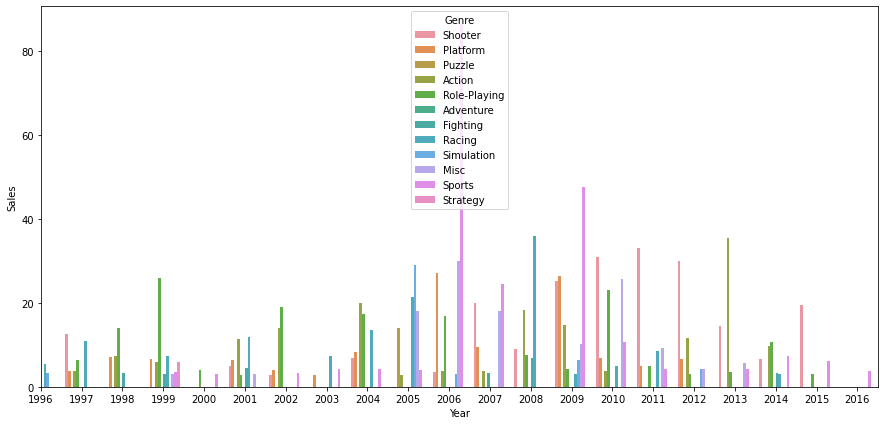

In [ ]:
fig = plt.figure(figsize=(15,7))
ax = fig.add_subplot(111)
sns.barplot(data=plot_data_groupby, x='Year', y='Sales', hue='Genre', ax=ax)
ax.set_xlim(14,)

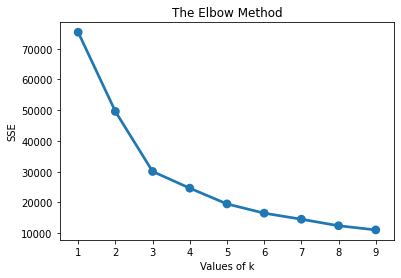

In [ ]:
sse = {}

a = np.sqrt(df_melt_cut['Sales'])
df_ = pd.concat([df_melt_cut['Year'], a], axis=1)
features = scaler.fit_transform(df_)

for k in range(1,10):
  kmeans = KMeans(n_clusters=k, random_state=42, n_init="auto")
  kmeans.fit(features)
  sse[k] = kmeans.inertia_

plt.title('The Elbow Method')
plt.xlabel('Values of k')
plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

3 아니면 5로.

In [ ]:
def my_kmeans_rev(df, n_clusters=3, sqrt=True, scale=True):
  if sqrt: df_ = np.sqrt(df['Sales'])
  else: df_ = df['Sales']
  df_ = pd.concat([df['Year'], df_], axis=1)
  if scale: scaled_data = scaler.fit_transform(df_)
  else: scaled_data = df_
  kclustering = KMeans(n_clusters=n_clusters, random_state=42, n_init="auto").fit(scaled_data)
  df_ = df.copy()
  df_['kmeans'] = kclustering.labels_
  fig, ax = plt.subplots(figsize=(15,8))
  sns.scatterplot(data=df_, x='Year', y='Sales', hue='kmeans', ax=ax)
  return df_, kclustering

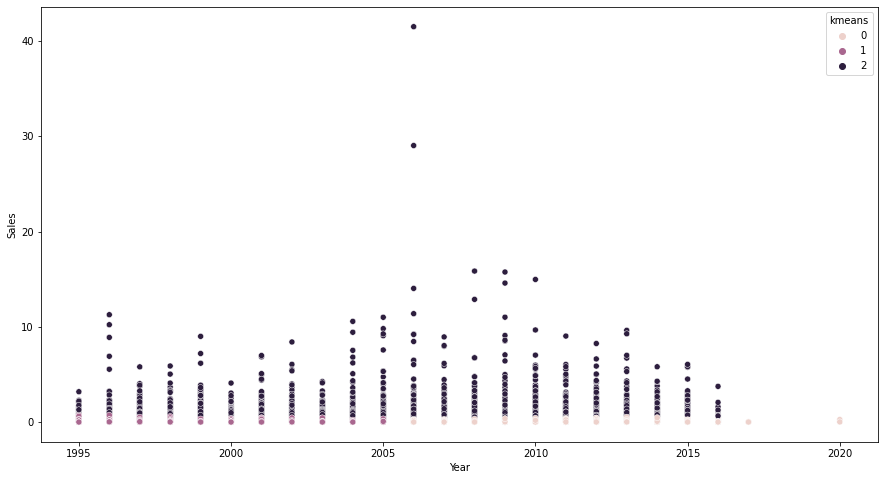

In [ ]:
test3, _ = my_kmeans_rev(df_melt_cut)

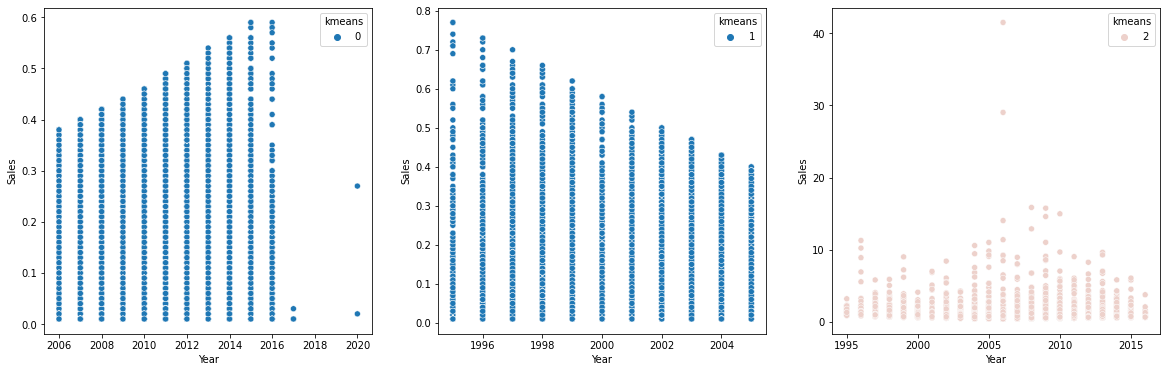

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=[20,6])
for i in range(3):
  plot_data = test3[test3['kmeans'] == i]
  sns.scatterplot(data=plot_data, x='Year', y='Sales', hue='kmeans', ax=ax[i])

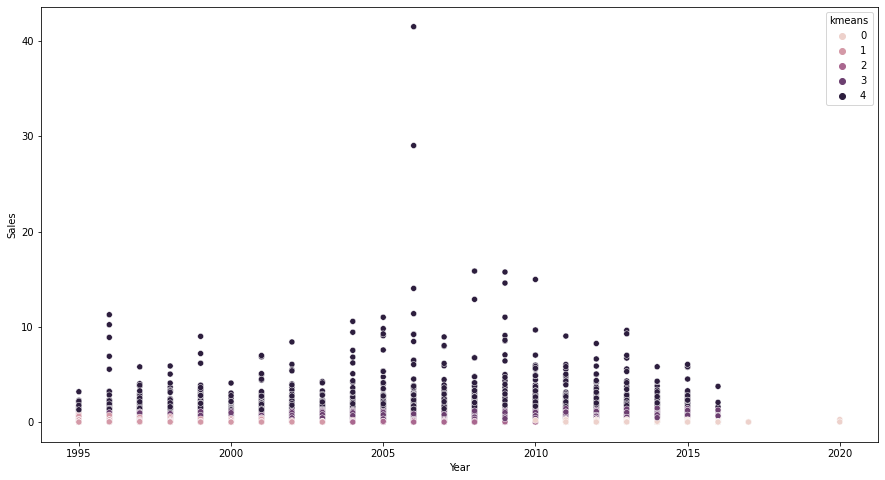

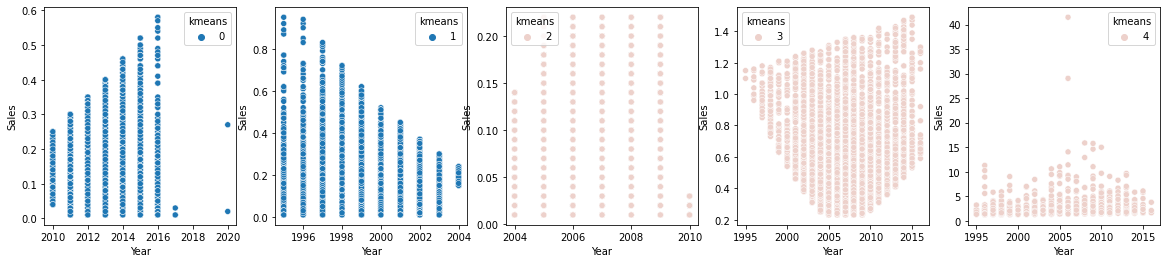

In [ ]:
test5, _ = my_kmeans_rev(df_melt_cut,5)
fig, ax = plt.subplots(1, 5, figsize=[20,4])
for i in range(5):
  plot_data = test5[test5['kmeans'] == i]
  sns.scatterplot(data=plot_data, x='Year', y='Sales', hue='kmeans', ax=ax[i])

3개가 더 좋아 보임.

<AxesSubplot:xlabel='Year', ylabel='Sales'>

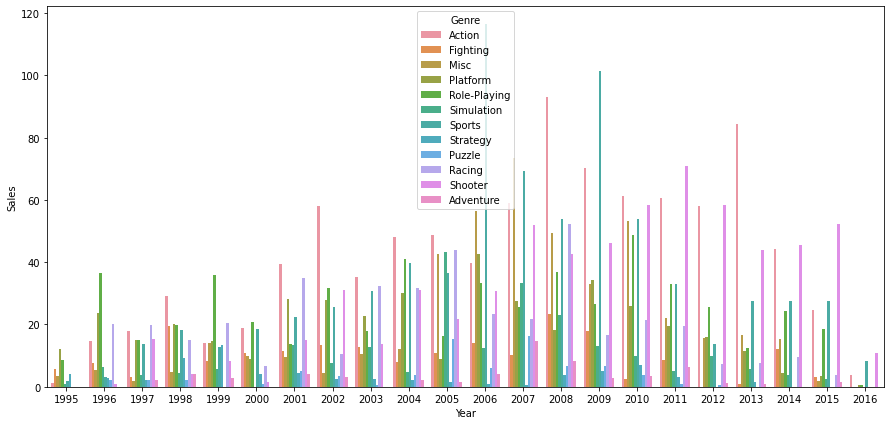

In [ ]:
plot_data_ = test3[test3['kmeans'] == 2]
plot_data_groupby = plot_data_.groupby(['Year','Genre'], as_index=False).sum()
fig = plt.figure(figsize=(15,7))
ax = fig.add_subplot(111)
sns.barplot(data=plot_data_groupby, x='Year', y='Sales', hue='Genre', ax=ax)

In [ ]:
plot_data_groupby

Year         Genre  Sales  dbscan  kmeans
0    1995        Action   1.32       0       2
1    1995      Fighting   5.81       0       8
2    1995          Misc   3.56       0       4
3    1995      Platform  12.06       0      14
4    1995  Role-Playing   8.49       0      10
..    ...           ...    ...     ...     ...
235  2016        Action   3.85       0       8
236  2016      Platform   0.64       0       2
237  2016  Role-Playing   0.63       0       2
238  2016       Shooter  10.71       0      20
239  2016        Sports   8.17       0      12

[240 rows x 5 columns]

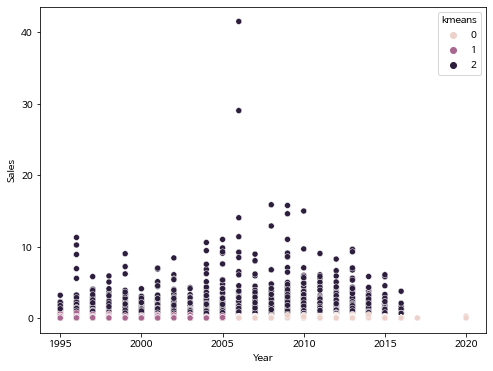

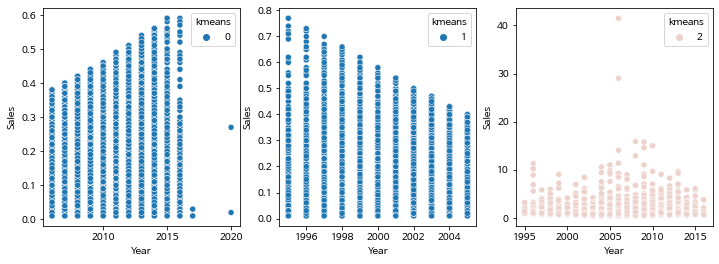

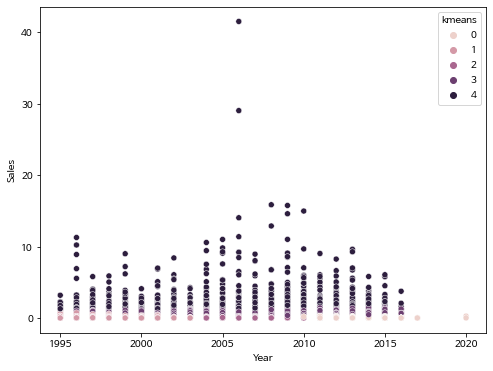

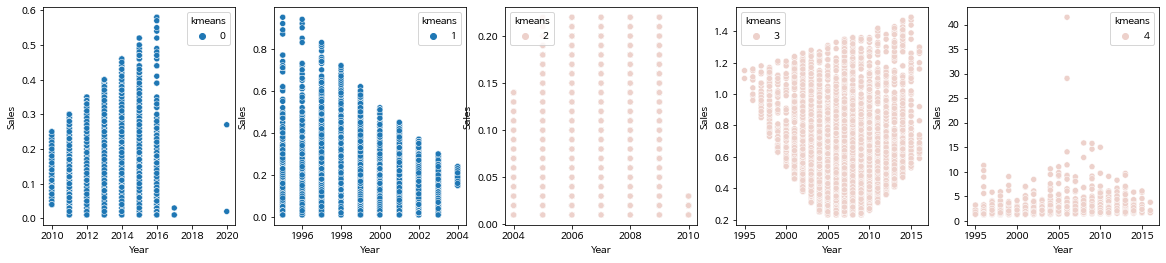

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

sscaler = StandardScaler()

df_melt_f1995 = df_melt.query('Year >= 1995')

def my_kmeans_rev(df, n_clusters=3, sqrt=True, scale=True):
  if sqrt: df_ = np.sqrt(df['Sales'])
  else: df_ = df['Sales']
  df_ = pd.concat([df['Year'], df_], axis=1)
  if scale: scaled_data = sscaler.fit_transform(df_)
  else: scaled_data = df_
  kclustering = KMeans(n_clusters=n_clusters, random_state=42, n_init="auto").fit(scaled_data)
  df_ = df.copy()
  df_['kmeans'] = kclustering.labels_
  fig, ax = plt.subplots(figsize=(8,6))
  sns.scatterplot(data=df_, x='Year', y='Sales', hue='kmeans', ax=ax)
  fig, ax = plt.subplots(1, n_clusters, figsize=[4 * n_clusters,4])
  for i in range(n_clusters):
    plot_data = df_[df_['kmeans'] == i]
    sns.scatterplot(data=plot_data, x='Year', y='Sales', hue='kmeans', ax=ax[i])  
  return df_, kclustering

k3, kclustering3 = my_kmeans_rev(df_melt_f1995)
k5, kclustering5 = my_kmeans_rev(df_melt_f1995, 5)

In [ ]:
af = k3.query('kmeans == 2').drop('kmeans', axis=1).groupby(['Year','Genre']).sum()

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 22 not upgraded.
Need to get 9,599 kB of archives.
After this operation, 29.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 fonts-nanum all 20180306-3 [9,599 kB]
Fetched 9,599 kB in 3s (3,176 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 128275 files and di

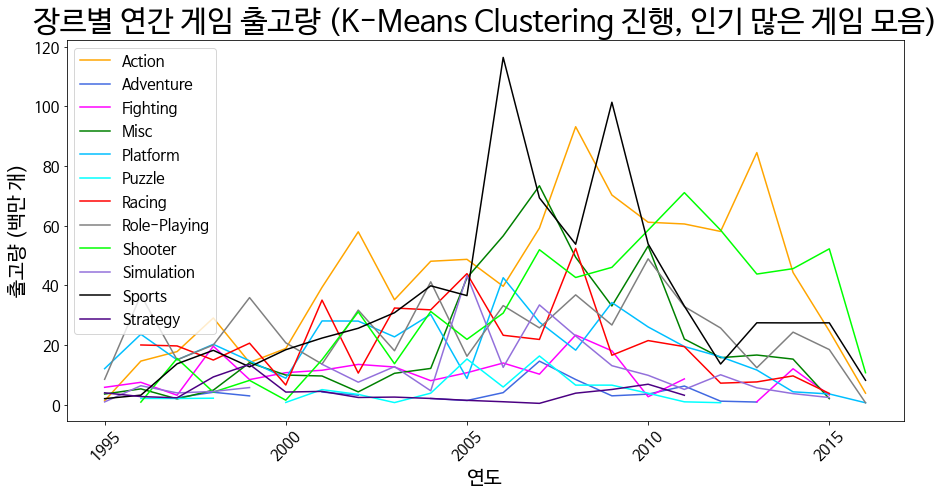

In [ ]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')

colorlist = ['black', 'gray', 'red', 'orange', 'lime', 'green', 'aqua', 'deepskyblue', 'royalblue', 'mediumpurple', 'indigo', 'magenta', 'yellow', 'yellowgreen', 'peru', 'lightsalmon']
colors = {i[0]:i[1] for i in zip(df_melt['Genre'].unique(), colorlist[:len(df_melt['Genre'].unique())])}

fig = plt.figure(figsize=(15,7))
ax = fig.add_subplot(111)
k3.query('kmeans == 2').groupby(['Year', 'Genre']).sum()['Sales'].unstack().plot(ax=ax, color=colors) # unstack sales
ax.set_title('장르별 연간 게임 출고량 (K-Means Clustering 진행, 인기 많은 게임 모음)', fontsize=30)
ax.set_xlabel("연도", fontsize=20)
ax.set_ylabel("출고량 (백만 개)", fontsize=20)
plt.legend(prop={'size':15})
plt.xticks(rotation=45)
ax.tick_params(labelsize=15)

In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

sscaler = StandardScaler()

def my_dbscan_rev(df, sqrt=True, scale=True, eps=0.5):
  if sqrt: df_ = np.sqrt(df['Sales'])
  else: df_ = df['Sales']
  df_ = pd.concat([df['Year'], df_], axis=1)
  if scale: scaled_data = sscaler.fit_transform(df_)
  else: scaled_data = df_
  dbclustering = DBSCAN(eps=eps).fit(scaled_data)
  df_ = df.copy()
  df_['dbscan'] = dbclustering.labels_
  plt.subplots()
  sns.scatterplot(data=df_, x='Year', y='Sales', hue='dbscan')
  return df_, dbclustering

/usr/local/lib/python3.9/dist-packages/IPython/core/events.py:88: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)


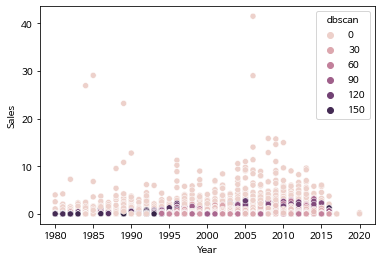

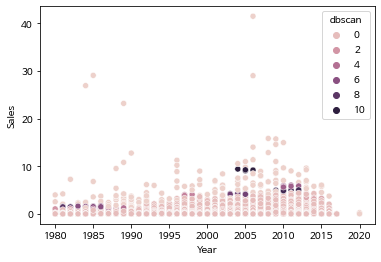

/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


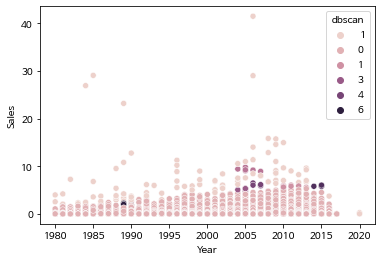

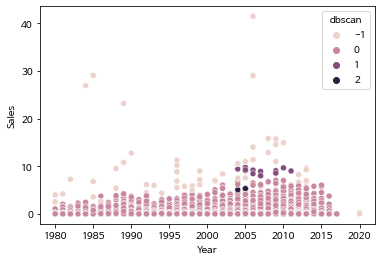

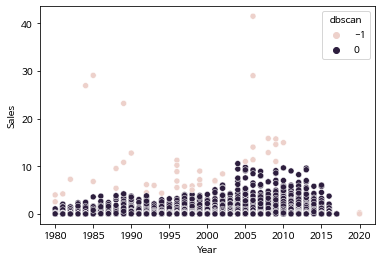

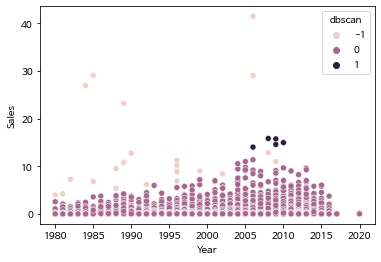

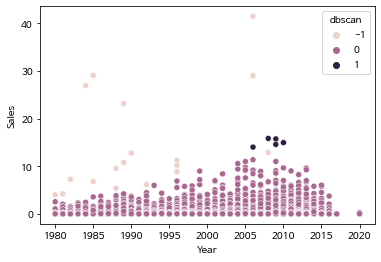

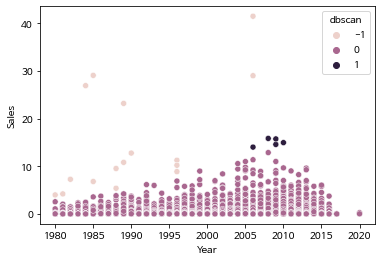

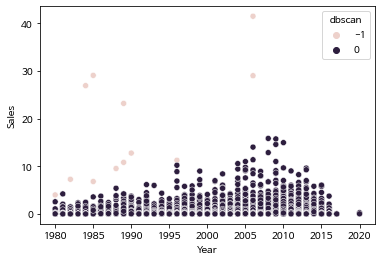

In [ ]:
for i in np.arange(0.1,1,0.1):
  my_dbscan_rev(df_melt[['Year', 'Sales']], eps=i)

DBSCAN도 -1 빼고는 다 그냥 그래 보임. 역설적으로 -1이 제일 인기 많기는 함. 육안으로도 확인 가능하므로 데이터에서 연도별로 인기 많은 게임들을 몇 개씩 추출해봐야겠다.

##### 클러스터링 결과

두 가지 클러스터링을 해 보았지만 인기 있는 게임들끼리 특별한 연관성은 없음. 특정 인기 있는 게임들만 모아놓은 결과만 나옴.

##### 연도별로 게임 추출할 때
기본 melt로 추출 후 publisher, genre, platform이 어떻게 다른지 파악해보겠다.

In [ ]:
df_melt

Name Platform  Year         Genre  \
0                       '98 Koshien       PS  1998        Sports   
1      .hack//G.U. Vol.2//Reminisce      PS2  2006  Role-Playing   
2           .hack//Infection Part 1      PS2  2002  Role-Playing   
3            .hack//Mutation Part 2      PS2  2002  Role-Playing   
4            .hack//Outbreak Part 3      PS2  2002  Role-Playing   
...                             ...      ...   ...           ...   
38758     pro evolution soccer 2011      Wii  2010        Sports   
38759     pro evolution soccer 2011     X360  2010        Sports   
38760                    thinkSMART       DS  2010          Misc   
38761                  uDraw Studio      Wii  2010          Misc   
38762  uDraw Studio: Instant Artist      Wii  2011          Misc   

                          Publisher Region  Sales  
0                   Magical Company    NA_   0.15  
1                Namco Bandai Games    NA_   0.11  
2                             Atari    NA_   0.49  
3                             Atari    NA_   0.23  
4                             Atari    NA_   0.14  
...                             ...    ...    ...  
38758  Konami Digital Entertainment  Other   0.02  
38759  Konami Digital Entertainment  Other   0.07  
38760      Conspiracy Entertainment  Other   0.01  
38761                           THQ  Other   0.20  
38762                           THQ  Other   0.02  

[38763 rows x 7 columns]

In [ ]:
test = df_melt.groupby(['Year', 'Platform']).sum().unstack()
test

Sales                                                               \
Platform   2600   3DO    3DS    DC      DS     GB    GBA     GC    GEN    GG   
Year                                                                           
1980      11.38   NaN    NaN   NaN     NaN    NaN    NaN    NaN    NaN   NaN   
1981      35.68   NaN    NaN   NaN     NaN    NaN    NaN    NaN    NaN   NaN   
1982      28.88   NaN    NaN   NaN     NaN    NaN    NaN    NaN    NaN   NaN   
1983       5.84   NaN    NaN   NaN     NaN    NaN    NaN    NaN    NaN   NaN   
1984       0.27   NaN    NaN   NaN     NaN    NaN    NaN    NaN    NaN   NaN   
1985       0.45   NaN    NaN   NaN    0.02    NaN    NaN    NaN    NaN   NaN   
1986       0.67   NaN    NaN   NaN     NaN    NaN    NaN    NaN    NaN   NaN   
1987       1.94   NaN    NaN   NaN     NaN    NaN    NaN    NaN    NaN   NaN   
1988       0.74   NaN    NaN   NaN     NaN   1.43    NaN    NaN    NaN   NaN   
1989       0.63   NaN    NaN   NaN     NaN  64.97    NaN    NaN    NaN   NaN   
1990        NaN   NaN    NaN   NaN     NaN   4.89    NaN    NaN   2.60   NaN   
1991        NaN   NaN    NaN   NaN     NaN   5.57    NaN    NaN   4.33   NaN   
1992        NaN   NaN    NaN   NaN     NaN  25.49    NaN    NaN  12.64  0.04   
1993        NaN   NaN    NaN   NaN     NaN    NaN    NaN    NaN   0.65   NaN   
1994        NaN  0.02    NaN   NaN     NaN  12.18    NaN    NaN   8.13   NaN   
1995        NaN  0.08    NaN   NaN     NaN   3.60    NaN    NaN    NaN   NaN   
1996        NaN   NaN    NaN   NaN     NaN  36.03    NaN    NaN    NaN   NaN   
1997        NaN   NaN    NaN   NaN     NaN   6.37    NaN    NaN    NaN   NaN   
1998        NaN   NaN    NaN  3.38     NaN  26.90    NaN    NaN    NaN   NaN   
1999        NaN   NaN    NaN  5.16     NaN  38.00    NaN    NaN    NaN   NaN   
2000        NaN   NaN    NaN  5.99     NaN  19.76   0.07    NaN    NaN   NaN   
2001        NaN   NaN    NaN  1.07     NaN   9.24  61.35  26.62    NaN   NaN   
2002       2.53   NaN    NaN  0.29     NaN    NaN  74.11  52.22    NaN   NaN   
2003        NaN   NaN    NaN   NaN     NaN    NaN  56.67  50.49    NaN   NaN   
2004        NaN   NaN    NaN   NaN   17.41    NaN  72.95  28.89    NaN   NaN   
2005        NaN   NaN    NaN   NaN  131.15    NaN  33.09  27.91    NaN   NaN   
2006        NaN   NaN    NaN   NaN  121.00    NaN   5.46  11.55    NaN   NaN   
2007        NaN   NaN    NaN  0.02  149.32    NaN   2.19   0.27    NaN   NaN   
2008        NaN   NaN    NaN  0.04  147.18    NaN    NaN    NaN    NaN   NaN   
2009        NaN   NaN    NaN   NaN  121.89    NaN    NaN    NaN    NaN   NaN   
2010        NaN   NaN   0.32   NaN   88.39    NaN    NaN    NaN    NaN   NaN   
2011        NaN   NaN  62.59   NaN   27.93    NaN    NaN    NaN    NaN   NaN   
2012        NaN   NaN  51.51   NaN   12.27    NaN    NaN    NaN    NaN   NaN   
2013        NaN   NaN  41.51   NaN    1.96    NaN    NaN    NaN    NaN   NaN   
2014        NaN   NaN  43.11   NaN    0.02    NaN    NaN    NaN    NaN   NaN   
2015        NaN   NaN  26.97   NaN     NaN    NaN    NaN    NaN    NaN   NaN   
2016        NaN   NaN   6.55   NaN     NaN    NaN    NaN    NaN    NaN   NaN   
2017        NaN   NaN    NaN   NaN     NaN    NaN    NaN    NaN    NaN   NaN   
2020        NaN   NaN    NaN   NaN    0.29    NaN    NaN    NaN    NaN   NaN   

          ...                                                                \
Platform  ...    SAT   SCD   SNES  TG16    WS     Wii   WiiU    X360     XB   
Year      ...                                                                 
1980      ...    NaN   NaN    NaN   NaN   NaN     NaN    NaN     NaN    NaN   
1981      ...    NaN   NaN    NaN   NaN   NaN     NaN    NaN     NaN    NaN   
1982      ...    NaN   NaN    NaN   NaN   NaN     NaN    NaN     NaN    NaN   
1983      ...    NaN   NaN    NaN   NaN   NaN     NaN    NaN     NaN    NaN   
1984      ...    NaN   NaN    NaN   NaN   NaN     NaN    NaN     NaN    NaN   
1985      ...    

In [ ]:
test.reset_index(level=0) # https://stackoverflow.com/questions/32938060/reverting-from-multiindex-to-single-index-dataframe-in-pandas

Year  Sales                                                         \
Platform         2600   3DO    3DS    DC      DS     GB    GBA     GC    GEN   
0         1980  11.38   NaN    NaN   NaN     NaN    NaN    NaN    NaN    NaN   
1         1981  35.68   NaN    NaN   NaN     NaN    NaN    NaN    NaN    NaN   
2         1982  28.88   NaN    NaN   NaN     NaN    NaN    NaN    NaN    NaN   
3         1983   5.84   NaN    NaN   NaN     NaN    NaN    NaN    NaN    NaN   
4         1984   0.27   NaN    NaN   NaN     NaN    NaN    NaN    NaN    NaN   
5         1985   0.45   NaN    NaN   NaN    0.02    NaN    NaN    NaN    NaN   
6         1986   0.67   NaN    NaN   NaN     NaN    NaN    NaN    NaN    NaN   
7         1987   1.94   NaN    NaN   NaN     NaN    NaN    NaN    NaN    NaN   
8         1988   0.74   NaN    NaN   NaN     NaN   1.43    NaN    NaN    NaN   
9         1989   0.63   NaN    NaN   NaN     NaN  64.97    NaN    NaN    NaN   
10        1990    NaN   NaN    NaN   NaN     NaN   4.89    NaN    NaN   2.60   
11        1991    NaN   NaN    NaN   NaN     NaN   5.57    NaN    NaN   4.33   
12        1992    NaN   NaN    NaN   NaN     NaN  25.49    NaN    NaN  12.64   
13        1993    NaN   NaN    NaN   NaN     NaN    NaN    NaN    NaN   0.65   
14        1994    NaN  0.02    NaN   NaN     NaN  12.18    NaN    NaN   8.13   
15        1995    NaN  0.08    NaN   NaN     NaN   3.60    NaN    NaN    NaN   
16        1996    NaN   NaN    NaN   NaN     NaN  36.03    NaN    NaN    NaN   
17        1997    NaN   NaN    NaN   NaN     NaN   6.37    NaN    NaN    NaN   
18        1998    NaN   NaN    NaN  3.38     NaN  26.90    NaN    NaN    NaN   
19        1999    NaN   NaN    NaN  5.16     NaN  38.00    NaN    NaN    NaN   
20        2000    NaN   NaN    NaN  5.99     NaN  19.76   0.07    NaN    NaN   
21        2001    NaN   NaN    NaN  1.07     NaN   9.24  61.35  26.62    NaN   
22        2002   2.53   NaN    NaN  0.29     NaN    NaN  74.11  52.22    NaN   
23        2003    NaN   NaN    NaN   NaN     NaN    NaN  56.67  50.49    NaN   
24        2004    NaN   NaN    NaN   NaN   17.41    NaN  72.95  28.89    NaN   
25        2005    NaN   NaN    NaN   NaN  131.15    NaN  33.09  27.91    NaN   
26        2006    NaN   NaN    NaN   NaN  121.00    NaN   5.46  11.55    NaN   
27        2007    NaN   NaN    NaN  0.02  149.32    NaN   2.19   0.27    NaN   
28        2008    NaN   NaN    NaN  0.04  147.18    NaN    NaN    NaN    NaN   
29        2009    NaN   NaN    NaN   NaN  121.89    NaN    NaN    NaN    NaN   
30        2010    NaN   NaN   0.32   NaN   88.39    NaN    NaN    NaN    NaN   
31        2011    NaN   NaN  62.59   NaN   27.93    NaN    NaN    NaN    NaN   
32        2012    NaN   NaN  51.51   NaN   12.27    NaN    NaN    NaN    NaN   
33        2013    NaN   NaN  41.51   NaN    1.96    NaN    NaN    NaN    NaN   
34        2014    NaN   NaN  43.11   NaN    0.02    NaN    NaN    NaN    NaN   
35        2015    NaN   NaN  26.97   NaN     NaN    NaN    NaN    NaN    NaN   
36        2016    NaN   NaN   6.55   NaN     NaN    NaN    NaN    NaN    NaN   
37        2017    NaN   NaN    NaN   NaN     NaN    NaN    NaN    NaN    NaN   
38        2020    NaN   NaN    NaN   NaN    0.29    NaN    NaN    NaN    NaN   

          ...                                                                \
Platform  ...    SAT   SCD   SNES  TG16    WS     Wii   WiiU    X360     XB   
0         ...    NaN   NaN    NaN   NaN   NaN     NaN    NaN     NaN    NaN   
1         ...    NaN   NaN    NaN   NaN   NaN     NaN    NaN     NaN    NaN   
2         ...    NaN   NaN    NaN   NaN   NaN     NaN    NaN     NaN    NaN   
3         ...    NaN   NaN    NaN   NaN   NaN     NaN    NaN     NaN    NaN   
4         ...    NaN   NaN    NaN   NaN   NaN     NaN    NaN     NaN    NaN   
5         ...    NaN   NaN    NaN   NaN   NaN     NaN    NaN     NaN    NaN   
6         ...    NaN   NaN    NaN   NaN   NaN     NaN    NaN     NaN    NaN   
7         ...    N

In [ ]:
test.columns = [col[1] for col in test.columns]
test

2600   3DO    3DS    DC      DS     GB    GBA     GC    GEN    GG  ...  \
Year                                                                      ...   
1980  11.38   NaN    NaN   NaN     NaN    NaN    NaN    NaN    NaN   NaN  ...   
1981  35.68   NaN    NaN   NaN     NaN    NaN    NaN    NaN    NaN   NaN  ...   
1982  28.88   NaN    NaN   NaN     NaN    NaN    NaN    NaN    NaN   NaN  ...   
1983   5.84   NaN    NaN   NaN     NaN    NaN    NaN    NaN    NaN   NaN  ...   
1984   0.27   NaN    NaN   NaN     NaN    NaN    NaN    NaN    NaN   NaN  ...   
1985   0.45   NaN    NaN   NaN    0.02    NaN    NaN    NaN    NaN   NaN  ...   
1986   0.67   NaN    NaN   NaN     NaN    NaN    NaN    NaN    NaN   NaN  ...   
1987   1.94   NaN    NaN   NaN     NaN    NaN    NaN    NaN    NaN   NaN  ...   
1988   0.74   NaN    NaN   NaN     NaN   1.43    NaN    NaN    NaN   NaN  ...   
1989   0.63   NaN    NaN   NaN     NaN  64.97    NaN    NaN    NaN   NaN  ...   
1990    NaN   NaN    NaN   NaN     NaN   4.89    NaN    NaN   2.60   NaN  ...   
1991    NaN   NaN    NaN   NaN     NaN   5.57    NaN    NaN   4.33   NaN  ...   
1992    NaN   NaN    NaN   NaN     NaN  25.49    NaN    NaN  12.64  0.04  ...   
1993    NaN   NaN    NaN   NaN     NaN    NaN    NaN    NaN   0.65   NaN  ...   
1994    NaN  0.02    NaN   NaN     NaN  12.18    NaN    NaN   8.13   NaN  ...   
1995    NaN  0.08    NaN   NaN     NaN   3.60    NaN    NaN    NaN   NaN  ...   
1996    NaN   NaN    NaN   NaN     NaN  36.03    NaN    NaN    NaN   NaN  ...   
1997    NaN   NaN    NaN   NaN     NaN   6.37    NaN    NaN    NaN   NaN  ...   
1998    NaN   NaN    NaN  3.38     NaN  26.90    NaN    NaN    NaN   NaN  ...   
1999    NaN   NaN    NaN  5.16     NaN  38.00    NaN    NaN    NaN   NaN  ...   
2000    NaN   NaN    NaN  5.99     NaN  19.76   0.07    NaN    NaN   NaN  ...   
2001    NaN   NaN    NaN  1.07     NaN   9.24  61.35  26.62    NaN   NaN  ...   
2002   2.53   NaN    NaN  0.29     NaN    NaN  74.11  52.22    NaN   NaN  ...   
2003    NaN   NaN    NaN   NaN     NaN    NaN  56.67  50.49    NaN   NaN  ...   
2004    NaN   NaN    NaN   NaN   17.41    NaN  72.95  28.89    NaN   NaN  ...   
2005    NaN   NaN    NaN   NaN  131.15    NaN  33.09  27.91    NaN   NaN  ...   
2006    NaN   NaN    NaN   NaN  121.00    NaN   5.46  11.55    NaN   NaN  ...   
2007    NaN   NaN    NaN  0.02  149.32    NaN   2.19   0.27    NaN   NaN  ...   
2008    NaN   NaN    NaN  0.04  147.18    NaN    NaN    NaN    NaN   NaN  ...   
2009    NaN   NaN    NaN   NaN  121.89    NaN    NaN    NaN    NaN   NaN  ...   
2010    NaN   NaN   0.32   NaN   88.39    NaN    NaN    NaN    NaN   NaN  ...   
2011    NaN   NaN  62.59   NaN   27.93    NaN    NaN    NaN    NaN   NaN  ...   
2012    NaN   NaN  51.51   NaN   12.27    NaN    NaN    NaN    NaN   NaN  ...   
2013    NaN   NaN  41.51   NaN    1.96    NaN    NaN    NaN    NaN   NaN  ...   
2014    NaN   NaN  43.11   NaN    0.02    NaN    NaN    NaN    NaN   NaN  ...   
2015    NaN   NaN  26.97   NaN     NaN    NaN    NaN    NaN    NaN   NaN  ...   
2016    NaN   NaN   6.55   NaN     NaN    NaN    NaN    NaN    NaN   NaN  ...   
2017    NaN   NaN    NaN   NaN     NaN    NaN    NaN    NaN    NaN   NaN  ...   
2020    NaN   NaN    NaN   NaN    0.29    NaN    NaN    NaN    NaN   NaN  ...   

        SAT   SCD   SNES  TG16    WS     Wii   WiiU    X360     XB   XOne  
Year                                                                       
1980    NaN   NaN    NaN   NaN   NaN     NaN    NaN     NaN    NaN    NaN  
1981    NaN   NaN    NaN   NaN   NaN     NaN    NaN     NaN    NaN    NaN  
1982    NaN   NaN    NaN   NaN   NaN     NaN    NaN     NaN    NaN    NaN  
1983    NaN   NaN    NaN   NaN   NaN     NaN    NaN     NaN    NaN    NaN  
1984    NaN   NaN    NaN   NaN   NaN     NaN    NaN     NaN    NaN    NaN  
1985    NaN   NaN    NaN   NaN   NaN     NaN    NaN     NaN    NaN    NaN  
1986    NaN   NaN    NaN   NaN   NaN     NaN    NaN     NaN    NaN    NaN  
1

In [ ]:
test.T.idxmax()

Year
1980    2600
1981    2600
1982    2600
1983     NES
1984     NES
1985     NES
1986     NES
1987     NES
1988     NES
1989      GB
1990    SNES
1991    SNES
1992    SNES
1993    SNES
1994    SNES
1995      PS
1996      PS
1997      PS
1998      PS
1999      PS
2000      PS
2001     PS2
2002     PS2
2003     PS2
2004     PS2
2005     PS2
2006     Wii
2007     Wii
2008     Wii
2009     Wii
2010    X360
2011     PS3
2012     PS3
2013     PS3
2014     PS4
2015     PS4
2016     PS4
2017     PS4
2020      DS
dtype: object

In [ ]:
for col in test.T.columns:
  print(test.T[col].sort_values(ascending=False)[0:5])

2600    11.38
3DO       NaN
3DS       NaN
DC        NaN
DS        NaN
Name: 1980, dtype: float64
2600    35.68
3DO       NaN
3DS       NaN
DC        NaN
DS        NaN
Name: 1981, dtype: float64
2600    28.88
3DO       NaN
3DS       NaN
DC        NaN
DS        NaN
Name: 1982, dtype: float64
NES     10.96
2600     5.84
3DO       NaN
3DS       NaN
DC        NaN
Name: 1983, dtype: float64
NES     50.08
2600     0.27
3DO       NaN
3DS       NaN
DC        NaN
Name: 1984, dtype: float64
NES     53.44
2600     0.45
PC       0.04
DS       0.02
3DO       NaN
Name: 1985, dtype: float64
NES     36.41
2600     0.67
3DO       NaN
3DS       NaN
DC        NaN
Name: 1986, dtype: float64
NES     19.76
2600     1.94
3DO       NaN
3DS       NaN
DC        NaN
Name: 1987, dtype: float64
NES     45.01
GB       1.43
2600     0.74
PC       0.03
3DO       NaN
Name: 1988, dtype: float64
GB      64.97
NES      7.85
2600     0.63
3DO       NaN
3DS       NaN
Name: 1989, dtype: float64
SNES    26.15
NES     15.73
GB

In [ ]:
pd.concat([test.T[col].sort_values(ascending=False)[0:5] for col in test.T.columns]).index.unique()

In [ ]:
import pandas as pd
import numpy as np

df_melt = pd.read_csv('https://raw.githubusercontent.com/yjmd2222/Section-1-Project/main/df_melt_n142.csv')
df_melt.fillna('NA_', inplace=True)

In [ ]:
def max_values(df, group1, group2, count=5):
  df_ = df.groupby([group1,group2]).sum().unstack()
  df_.columns = [col[1] for col in df_.columns]
  for col in df_.T.columns:
    print(df_.T[col].sort_values(ascending=False)[0:count])

yp = df_melt.groupby(['Year', 'Platform']).sum().unstack()
yp.columns = [col[1] for col in yp.columns]

In [ ]:
max_values(df_melt, 'Year', 'Platform')

2600    11.38
3DO       NaN
3DS       NaN
DC        NaN
DS        NaN
Name: 1980, dtype: float64
2600    35.68
3DO       NaN
3DS       NaN
DC        NaN
DS        NaN
Name: 1981, dtype: float64
2600    28.88
3DO       NaN
3DS       NaN
DC        NaN
DS        NaN
Name: 1982, dtype: float64
NES     10.96
2600     5.84
3DO       NaN
3DS       NaN
DC        NaN
Name: 1983, dtype: float64
NES     50.08
2600     0.27
3DO       NaN
3DS       NaN
DC        NaN
Name: 1984, dtype: float64
NES     53.44
2600     0.45
PC       0.04
DS       0.02
3DO       NaN
Name: 1985, dtype: float64
NES     36.41
2600     0.67
3DO       NaN
3DS       NaN
DC        NaN
Name: 1986, dtype: float64
NES     19.76
2600     1.94
3DO       NaN
3DS       NaN
DC        NaN
Name: 1987, dtype: float64
NES     45.01
GB       1.43
2600     0.74
PC       0.03
3DO       NaN
Name: 1988, dtype: float64
GB      64.97
NES      7.85
2600     0.63
3DO       NaN
3DS       NaN
Name: 1989, dtype: float64
SNES    26.15
NES     15.73
GB

In [ ]:
def my_groupby(df, group1, group2, single_column=False):
  df_ = df.groupby([group1, group2]).sum().unstack()
  if single_column: df_.columns = [col[1] for col in df_.columns]
  return df_.reset_index(level=0)

In [ ]:
testdf = my_groupby(df_melt, 'Year', 'Platform')

In [ ]:
import seaborn as sns

In [ ]:
testdf['Sales']

Platform   2600   3DO    3DS    DC      DS     GB    GBA     GC    GEN    GG  \
0         11.38   NaN    NaN   NaN     NaN    NaN    NaN    NaN    NaN   NaN   
1         35.68   NaN    NaN   NaN     NaN    NaN    NaN    NaN    NaN   NaN   
2         28.88   NaN    NaN   NaN     NaN    NaN    NaN    NaN    NaN   NaN   
3          5.84   NaN    NaN   NaN     NaN    NaN    NaN    NaN    NaN   NaN   
4          0.27   NaN    NaN   NaN     NaN    NaN    NaN    NaN    NaN   NaN   
5          0.45   NaN    NaN   NaN    0.02    NaN    NaN    NaN    NaN   NaN   
6          0.67   NaN    NaN   NaN     NaN    NaN    NaN    NaN    NaN   NaN   
7          1.94   NaN    NaN   NaN     NaN    NaN    NaN    NaN    NaN   NaN   
8          0.74   NaN    NaN   NaN     NaN   1.43    NaN    NaN    NaN   NaN   
9          0.63   NaN    NaN   NaN     NaN  64.97    NaN    NaN    NaN   NaN   
10          NaN   NaN    NaN   NaN     NaN   4.89    NaN    NaN   2.60   NaN   
11          NaN   NaN    NaN   NaN     NaN   5.57    NaN    NaN   4.33   NaN   
12          NaN   NaN    NaN   NaN     NaN  25.49    NaN    NaN  12.64  0.04   
13          NaN   NaN    NaN   NaN     NaN    NaN    NaN    NaN   0.65   NaN   
14          NaN  0.02    NaN   NaN     NaN  12.18    NaN    NaN   8.13   NaN   
15          NaN  0.08    NaN   NaN     NaN   3.60    NaN    NaN    NaN   NaN   
16          NaN   NaN    NaN   NaN     NaN  36.03    NaN    NaN    NaN   NaN   
17          NaN   NaN    NaN   NaN     NaN   6.37    NaN    NaN    NaN   NaN   
18          NaN   NaN    NaN  3.38     NaN  26.90    NaN    NaN    NaN   NaN   
19          NaN   NaN    NaN  5.16     NaN  38.00    NaN    NaN    NaN   NaN   
20          NaN   NaN    NaN  5.99     NaN  19.76   0.07    NaN    NaN   NaN   
21          NaN   NaN    NaN  1.07     NaN   9.24  61.35  26.62    NaN   NaN   
22         2.53   NaN    NaN  0.29     NaN    NaN  74.11  52.22    NaN   NaN   
23          NaN   NaN    NaN   NaN     NaN    NaN  56.67  50.49    NaN   NaN   
24          NaN   NaN    NaN   NaN   17.41    NaN  72.95  28.89    NaN   NaN   
25          NaN   NaN    NaN   NaN  131.15    NaN  33.09  27.91    NaN   NaN   
26          NaN   NaN    NaN   NaN  121.00    NaN   5.46  11.55    NaN   NaN   
27          NaN   NaN    NaN  0.02  149.32    NaN   2.19   0.27    NaN   NaN   
28          NaN   NaN    NaN  0.04  147.18    NaN    NaN    NaN    NaN   NaN   
29          NaN   NaN    NaN   NaN  121.89    NaN    NaN    NaN    NaN   NaN   
30          NaN   NaN   0.32   NaN   88.39    NaN    NaN    NaN    NaN   NaN   
31          NaN   NaN  62.59   NaN   27.93    NaN    NaN    NaN    NaN   NaN   
32          NaN   NaN  51.51   NaN   12.27    NaN    NaN    NaN    NaN   NaN   
33          NaN   NaN  41.51   NaN    1.96    NaN    NaN    NaN    NaN   NaN   
34          NaN   NaN  43.11   NaN    0.02    NaN    NaN    NaN    NaN   NaN   
35          NaN   NaN  26.97   NaN     NaN    NaN    NaN    NaN    NaN   NaN   
36          NaN   NaN   6.55   NaN     NaN    NaN    NaN    NaN    NaN   NaN   
37          NaN   NaN    NaN   NaN     NaN    NaN    NaN    NaN    NaN   NaN   
38          NaN   NaN    NaN   NaN    0.29    NaN    NaN    NaN    NaN   NaN   

Platform  ...    SAT   SCD   SNES  TG16    WS     Wii   WiiU    X360     XB  \
0         ...    NaN   NaN    NaN   NaN   NaN     NaN    NaN     NaN    NaN   
1         ...    NaN   NaN    NaN   NaN   NaN     NaN    NaN     NaN    NaN   
2         ...    NaN   NaN    NaN   NaN   NaN     NaN    NaN     NaN    NaN   
3         ...    NaN   NaN    NaN   NaN   NaN     NaN    NaN     NaN    NaN   
4         ...    NaN   NaN    NaN   NaN   NaN     NaN    NaN     NaN    NaN   
5         ...    NaN   NaN    NaN   NaN   NaN     NaN    NaN     NaN    NaN   
6         ...    NaN   NaN    NaN   NaN   NaN     NaN    NaN     NaN    NaN   
7         ...    NaN   NaN    NaN   NaN   NaN     NaN    NaN     NaN    NaN   
8         ...    NaN   NaN    NaN   NaN   NaN     NaN    NaN     NaN    NaN   
9        

/usr/local/lib/python3.9/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


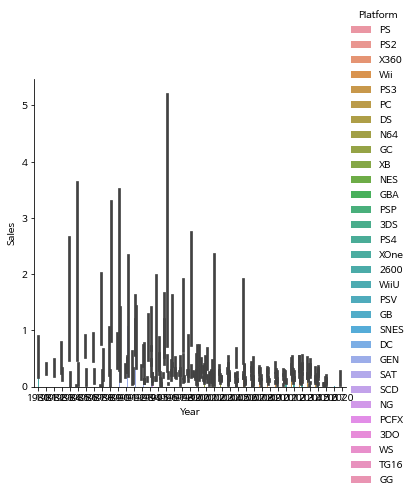

In [ ]:
sns.catplot(data=df_melt, x='Year', y='Sales', hue='Platform', kind='bar')

In [ ]:
my_groupby(df_melt, 'Year', 'Platform', True)

Year   2600   3DO    3DS    DC      DS     GB    GBA     GC    GEN  ...  \
0   1980  11.38   NaN    NaN   NaN     NaN    NaN    NaN    NaN    NaN  ...   
1   1981  35.68   NaN    NaN   NaN     NaN    NaN    NaN    NaN    NaN  ...   
2   1982  28.88   NaN    NaN   NaN     NaN    NaN    NaN    NaN    NaN  ...   
3   1983   5.84   NaN    NaN   NaN     NaN    NaN    NaN    NaN    NaN  ...   
4   1984   0.27   NaN    NaN   NaN     NaN    NaN    NaN    NaN    NaN  ...   
5   1985   0.45   NaN    NaN   NaN    0.02    NaN    NaN    NaN    NaN  ...   
6   1986   0.67   NaN    NaN   NaN     NaN    NaN    NaN    NaN    NaN  ...   
7   1987   1.94   NaN    NaN   NaN     NaN    NaN    NaN    NaN    NaN  ...   
8   1988   0.74   NaN    NaN   NaN     NaN   1.43    NaN    NaN    NaN  ...   
9   1989   0.63   NaN    NaN   NaN     NaN  64.97    NaN    NaN    NaN  ...   
10  1990    NaN   NaN    NaN   NaN     NaN   4.89    NaN    NaN   2.60  ...   
11  1991    NaN   NaN    NaN   NaN     NaN   5.57    NaN    NaN   4.33  ...   
12  1992    NaN   NaN    NaN   NaN     NaN  25.49    NaN    NaN  12.64  ...   
13  1993    NaN   NaN    NaN   NaN     NaN    NaN    NaN    NaN   0.65  ...   
14  1994    NaN  0.02    NaN   NaN     NaN  12.18    NaN    NaN   8.13  ...   
15  1995    NaN  0.08    NaN   NaN     NaN   3.60    NaN    NaN    NaN  ...   
16  1996    NaN   NaN    NaN   NaN     NaN  36.03    NaN    NaN    NaN  ...   
17  1997    NaN   NaN    NaN   NaN     NaN   6.37    NaN    NaN    NaN  ...   
18  1998    NaN   NaN    NaN  3.38     NaN  26.90    NaN    NaN    NaN  ...   
19  1999    NaN   NaN    NaN  5.16     NaN  38.00    NaN    NaN    NaN  ...   
20  2000    NaN   NaN    NaN  5.99     NaN  19.76   0.07    NaN    NaN  ...   
21  2001    NaN   NaN    NaN  1.07     NaN   9.24  61.35  26.62    NaN  ...   
22  2002   2.53   NaN    NaN  0.29     NaN    NaN  74.11  52.22    NaN  ...   
23  2003    NaN   NaN    NaN   NaN     NaN    NaN  56.67  50.49    NaN  ...   
24  2004    NaN   NaN    NaN   NaN   17.41    NaN  72.95  28.89    NaN  ...   
25  2005    NaN   NaN    NaN   NaN  131.15    NaN  33.09  27.91    NaN  ...   
26  2006    NaN   NaN    NaN   NaN  121.00    NaN   5.46  11.55    NaN  ...   
27  2007    NaN   NaN    NaN  0.02  149.32    NaN   2.19   0.27    NaN  ...   
28  2008    NaN   NaN    NaN  0.04  147.18    NaN    NaN    NaN    NaN  ...   
29  2009    NaN   NaN    NaN   NaN  121.89    NaN    NaN    NaN    NaN  ...   
30  2010    NaN   NaN   0.32   NaN   88.39    NaN    NaN    NaN    NaN  ...   
31  2011    NaN   NaN  62.59   NaN   27.93    NaN    NaN    NaN    NaN  ...   
32  2012    NaN   NaN  51.51   NaN   12.27    NaN    NaN    NaN    NaN  ...   
33  2013    NaN   NaN  41.51   NaN    1.96    NaN    NaN    NaN    NaN  ...   
34  2014    NaN   NaN  43.11   NaN    0.02    NaN    NaN    NaN    NaN  ...   
35  2015    NaN   NaN  26.97   NaN     NaN    NaN    NaN    NaN    NaN  ...   
36  2016    NaN   NaN   6.55   NaN     NaN    NaN    NaN    NaN    NaN  ...   
37  2017    NaN   NaN    NaN   NaN     NaN    NaN    NaN    NaN    NaN  ...   
38  2020    NaN   NaN    NaN   NaN    0.29    NaN    NaN    NaN    NaN  ...   

      SAT   SCD   SNES  TG16    WS     Wii   WiiU    X360     XB   XOne  
0     NaN   NaN    NaN   NaN   NaN     NaN    NaN     NaN    NaN    NaN  
1     NaN   NaN    NaN   NaN   NaN     NaN    NaN     NaN    NaN    NaN  
2     NaN   NaN    NaN   NaN   NaN     NaN    NaN     NaN    NaN    NaN  
3     NaN   NaN    NaN   NaN   NaN     NaN    NaN     NaN    NaN    NaN  
4     NaN   NaN    NaN   NaN   NaN     NaN    NaN     NaN    NaN    NaN  
5     NaN   NaN    NaN   NaN   NaN     NaN    NaN     NaN    NaN    NaN  
6     NaN   NaN    NaN   NaN   NaN     NaN    NaN     NaN    NaN    NaN  
7     NaN   NaN    NaN   NaN   NaN     NaN    NaN     NaN    NaN    NaN  
8     NaN   NaN    NaN   NaN   NaN     NaN    NaN     NaN    NaN    NaN  
9     NaN   NaN    NaN   NaN   NaN     NaN    NaN     NaN    NaN    NaN  
10    NaN   NaN  26.15   NaN 

Text(0.5, 1.0, 'Monthly Temperatures in a year')

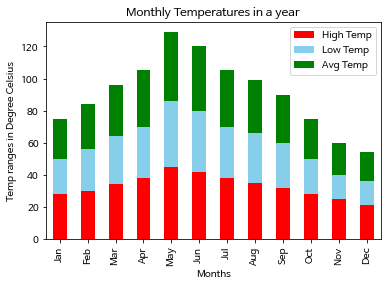

In [ ]:
# import necessary libraries
import pandas as pd
#import seaborn as sns
import matplotlib.pyplot as plt
 
# create DataFrame
df = pd.DataFrame({'High Temp': [28, 30, 34, 38, 45, 42,
                                 38, 35, 32, 28, 25, 21],
                   'Low Temp': [22, 26, 30, 32, 41, 38,
                                32, 31, 28, 22, 15, 15],
                   'Avg Temp': [25, 28, 32, 35, 43, 40,
                                35, 33, 30, 25, 20, 18]},
                  index=['Jan', 'Feb', 'Mar', 'Apr', 'May',
                         'Jun', 'Jul', 'Aug', 'Sep', 'Oct',
                         'Nov', 'Dec'])

 
# create stacked bar chart for monthly temperatures
df.plot(kind='bar', stacked=True, color=['red', 'skyblue', 'green'])
 
# labels for x & y axis
plt.xlabel('Months')
plt.ylabel('Temp ranges in Degree Celsius')
 
# title of plot
plt.title('Monthly Temperatures in a year')

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv('netflix_titles.csv')

data = data.loc[data['release_year'].isin([*range(2016, 2020)]), ['type', 'release_year']].copy()
data.dropna(inplace=True)
data['release_year'] = data['release_year'].astype('int')
data

FileNotFoundError: ignored

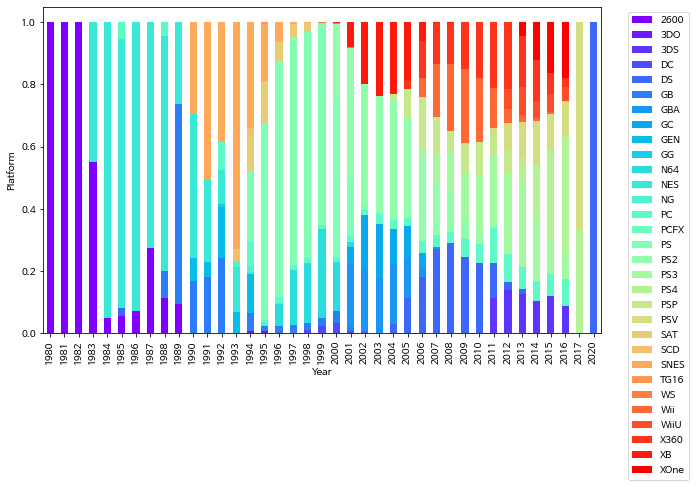

In [ ]:
cross_tab_prop = pd.crosstab(index=df_melt['Year'], columns=df_melt['Platform'], normalize='index') # https://towardsdatascience.com/100-stacked-charts-in-python-6ca3e1962d2b
cross_tab = pd.crosstab(index=df_melt['Year'], columns=df_melt['Platform'])
cross_tab_prop.plot(kind='bar', 
                    stacked=True,
                    colormap='rainbow', # https://codetorial.net/matplotlib/set_colormap.html
                    figsize=(10, 6))

plt.legend(bbox_to_anchor=(1.04, 1), loc='upper left')
plt.xlabel("Year")
plt.ylabel("Platform")
plt.show()

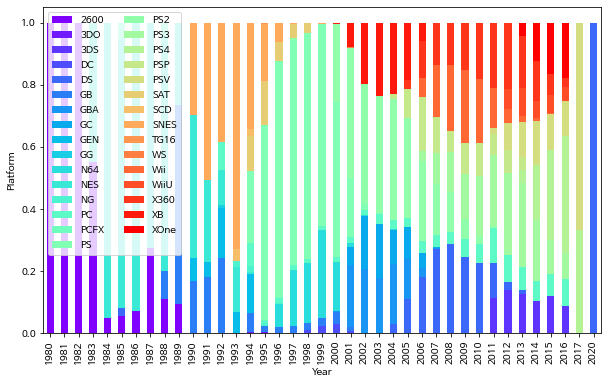

In [ ]:
def my_stacked_graph_full(df, group1, group2, colormap='rainbow'):
  cross_tab_prop = pd.crosstab(index=df[group1], columns=df[group2], normalize='index')
  # cross_tab_ = pd.crosstab(index=df[group1], columns=df[group2])
  cross_tab_prop.plot(kind='bar', 
                      stacked=True, 
                      colormap=colormap, 
                      figsize=(10, 6))

  plt.legend(loc="upper left", ncol=2)
  plt.xlabel("Year")
  plt.ylabel("Platform")
  plt.show()
my_stacked_graph_full(df_melt,'Year','Platform')

In [ ]:
(ffff.iloc[:,3] / ffff.iloc[:,3].sum())

Year
1980         NaN
1981         NaN
1982         NaN
1983         NaN
1984         NaN
1985         NaN
1986         NaN
1987         NaN
1988         NaN
1989         NaN
1990         NaN
1991         NaN
1992         NaN
1993         NaN
1994         NaN
1995         NaN
1996         NaN
1997         NaN
1998    0.211912
1999    0.323511
2000    0.375549
2001    0.067085
2002    0.018182
2003         NaN
2004         NaN
2005         NaN
2006         NaN
2007    0.001254
2008    0.002508
2009         NaN
2010         NaN
2011         NaN
2012         NaN
2013         NaN
2014         NaN
2015         NaN
2016         NaN
2017         NaN
2020         NaN
Name: (Sales, DC), dtype: float64

In [16]:
def my_stacked_graph_rev_full(df, group1, group2, group2k, colormap='rainbow', graph=True, ncol=2):
  groupby = df.groupby([group1,group2]).sum().unstack()
  for col in groupby.T.columns:
    groupby.T[col] /= groupby.T[col].sum()
  groupby.columns = [col[1] for col in groupby.columns]
  if graph:
    groupby.plot(kind='bar', 
                        stacked=True, 
                        colormap=colormap, 
                        figsize=(10, 6),
                        mark_right=True
                )

    plt.legend(bbox_to_anchor=(1.04, 1), loc='upper left', ncol=ncol)
    plt.xlabel("Year", fontsize=20)
    plt.ylabel(group2k if group2k else group2, fontsize=20)
    plt.title(f'Yearly Game Sales in {group2k if group2k else group2}s (Total)', fontsize=30)
    plt.show()

In [5]:
def max_values_rev(df, group1, group2, count=5):
  df_ = df.groupby([group1,group2]).sum().unstack()
  df_.columns = [col[1] for col in df_.columns]
  for col in df_.T.columns:
    max = df_.T[col].sort_values(ascending=False)[0:count]
    df_.loc[col] = df_.loc[col].where(df_.loc[col].index.isin(max.index))
  return df_

In [20]:
def my_stacked_graph_rev_count(df, group1, group2, group2k, colormap='rainbow', count=5, graph=True, ncol=2):
  groupby = max_values_rev(df, group1, group2, count=count)
  for col in groupby.T.columns:
    groupby.T[col] /= groupby.T[col].sum()
  if graph:
    groupby.plot(kind='bar', 
                        stacked=True, 
                        colormap=colormap, 
                        figsize=(10, 6),
                        mark_right=True
                )

    plt.legend(bbox_to_anchor=(1.04, 1), loc='upper left', ncol=ncol)
    plt.xlabel("Year", fontsize=20)
    plt.ylabel(group2k if group2k else group2, fontsize=20)
    plt.title(f'Yearly Game Sales in {group2k if group2k else group2}s (Top 5)', fontsize=30)
    plt.show()
  return groupby

In [21]:
def my_stacked_graphs(df, group2, group2k=None, group1='Year', colormap='rainbow', count=5, graph=True, ncol=2):
  my_stacked_graph_rev_full(df, group1, group2, group2k, colormap=colormap, graph=graph, ncol=ncol)
  return my_stacked_graph_rev_count(df, group1, group2, group2k, colormap=colormap, count=count, graph=graph, ncol=ncol)

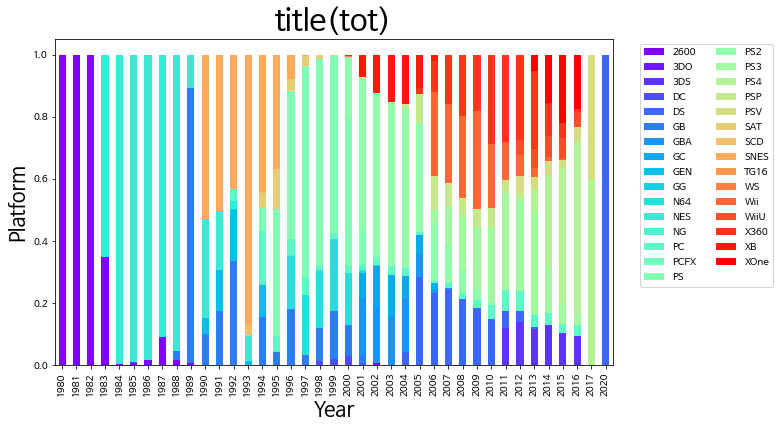

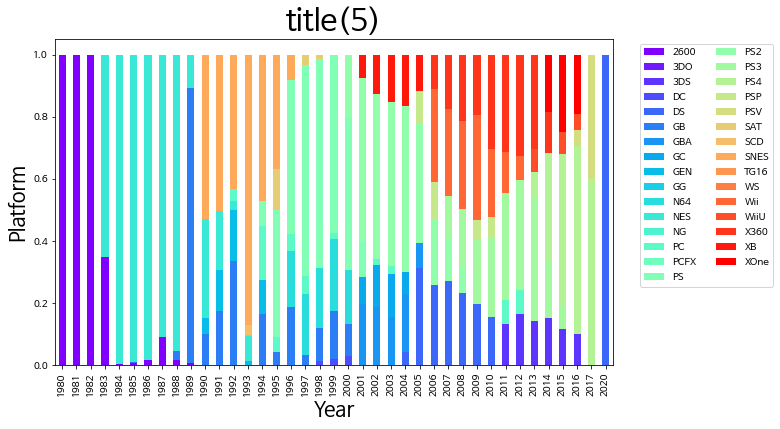

In [ ]:
my_stacked_graphs(df_melt, 'Platform')

In [ ]:
p = my_stacked_graphs(df_melt, 'Platform', graph=False)

In [5]:
def print_5s(df):
  for i in np.arange(1980,2021,5):
    try: print(f'{i}년 {df.loc[i:i+5].count().sort_values(ascending=False)[:5].index.to_list()}')
    except: break

In [ ]:
print_5s(p)

1980년 ['2600', 'NES', 'DS', 'PC', 'SNES']
1985년 ['NES', '2600', 'GB', 'PC', 'DS']
1990년 ['SNES', 'GB', 'GEN', 'NES', 'PC']
1995년 ['PS', 'GB', 'N64', 'PC', 'DC']
2000년 ['PS2', 'XB', 'GBA', 'GC', 'PS']
2005년 ['DS', 'X360', 'Wii', 'PS2', 'PS3']
2010년 ['PS3', '3DS', 'X360', 'PS4', 'Wii']
2015년 ['PS4', 'XOne', '3DS', 'WiiU', 'PSV']
2020년 ['DS', '2600', 'PS2', 'XB', 'X360']


유명한 플랫폼은 그 다음 계열로 넘어가는 것 같음. 물론 2020년은 집계가 거의 안 되었으니 무시.
- XBOX, XONE (Microsoft)
- PS 계열열
- Wii/닌텐도 계열

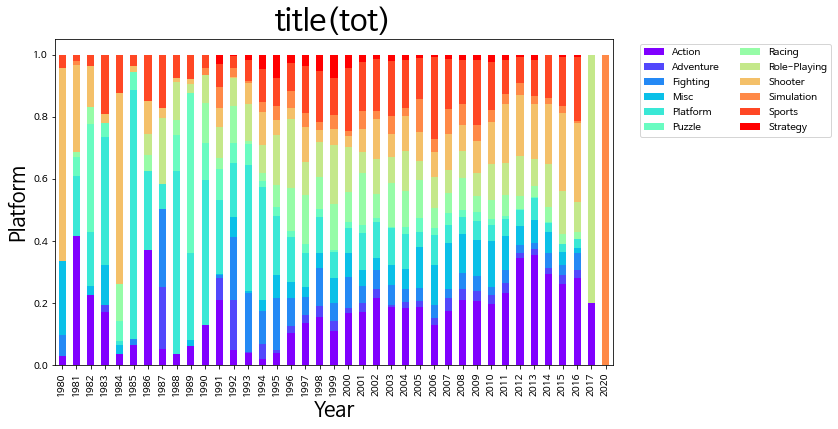

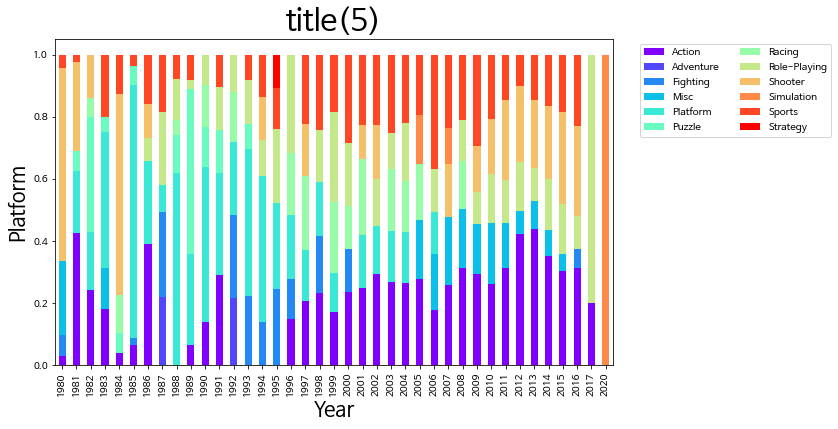

In [ ]:
my_stacked_graphs(df_melt, 'Genre')

- 초창기에는 Fighting, Platform이 유행함. 시간 갈수록 줄어듦
- 최근 들어서 Puzzle, Strategy는 거의 볼 수 없다
- Action, Shooter, Sports, 그리고 Role-Playing이 근래 들어서 핫하다.

In [ ]:
g = my_stacked_graphs(df_melt, 'Genre', graph=False)
print_5s(g)

1980년 ['Action', 'Puzzle', 'Sports', 'Platform', 'Shooter']
1985년 ['Platform', 'Role-Playing', 'Sports', 'Action', 'Puzzle']
1990년 ['Platform', 'Role-Playing', 'Fighting', 'Sports', 'Puzzle']
1995년 ['Action', 'Platform', 'Role-Playing', 'Sports', 'Fighting']
2000년 ['Action', 'Sports', 'Racing', 'Platform', 'Role-Playing']
2005년 ['Action', 'Misc', 'Sports', 'Role-Playing', 'Shooter']
2010년 ['Action', 'Misc', 'Role-Playing', 'Shooter', 'Sports']
2015년 ['Action', 'Role-Playing', 'Shooter', 'Sports', 'Fighting']
2020년 ['Simulation', 'Action', 'Adventure', 'Fighting', 'Misc']


돌고 돌아 다시 올 수도 있음
- Action과 Shooter은 초창기 유행이 식었다가 1995, 2005때 다시 치고 올라옴옴

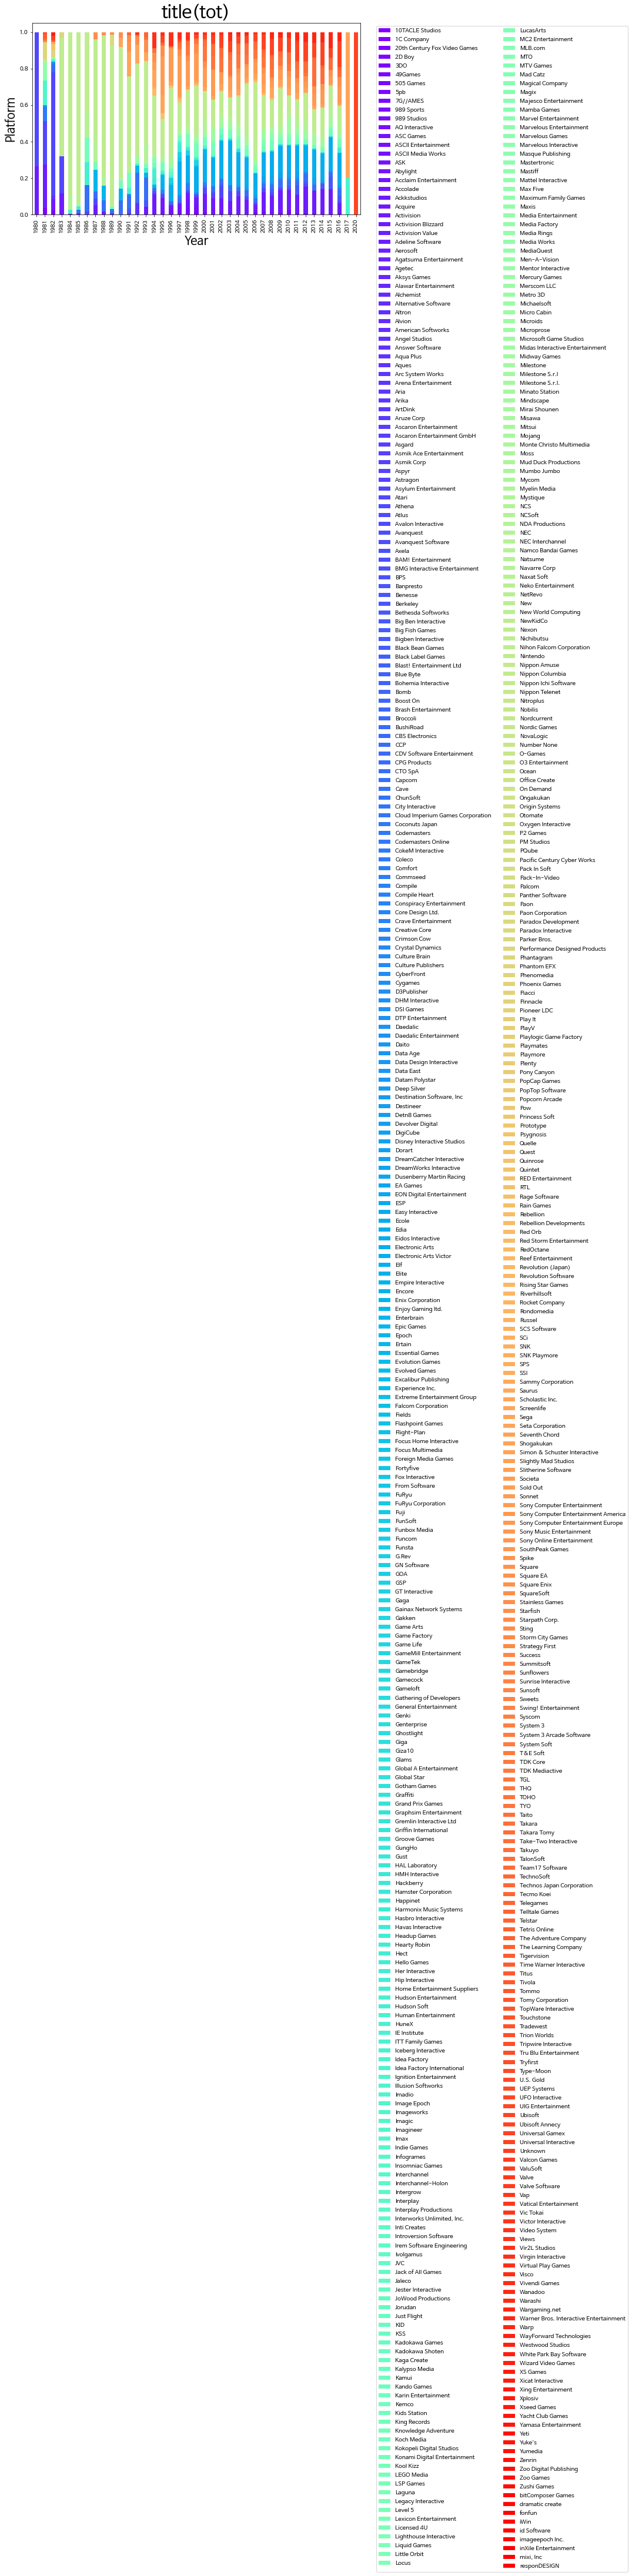

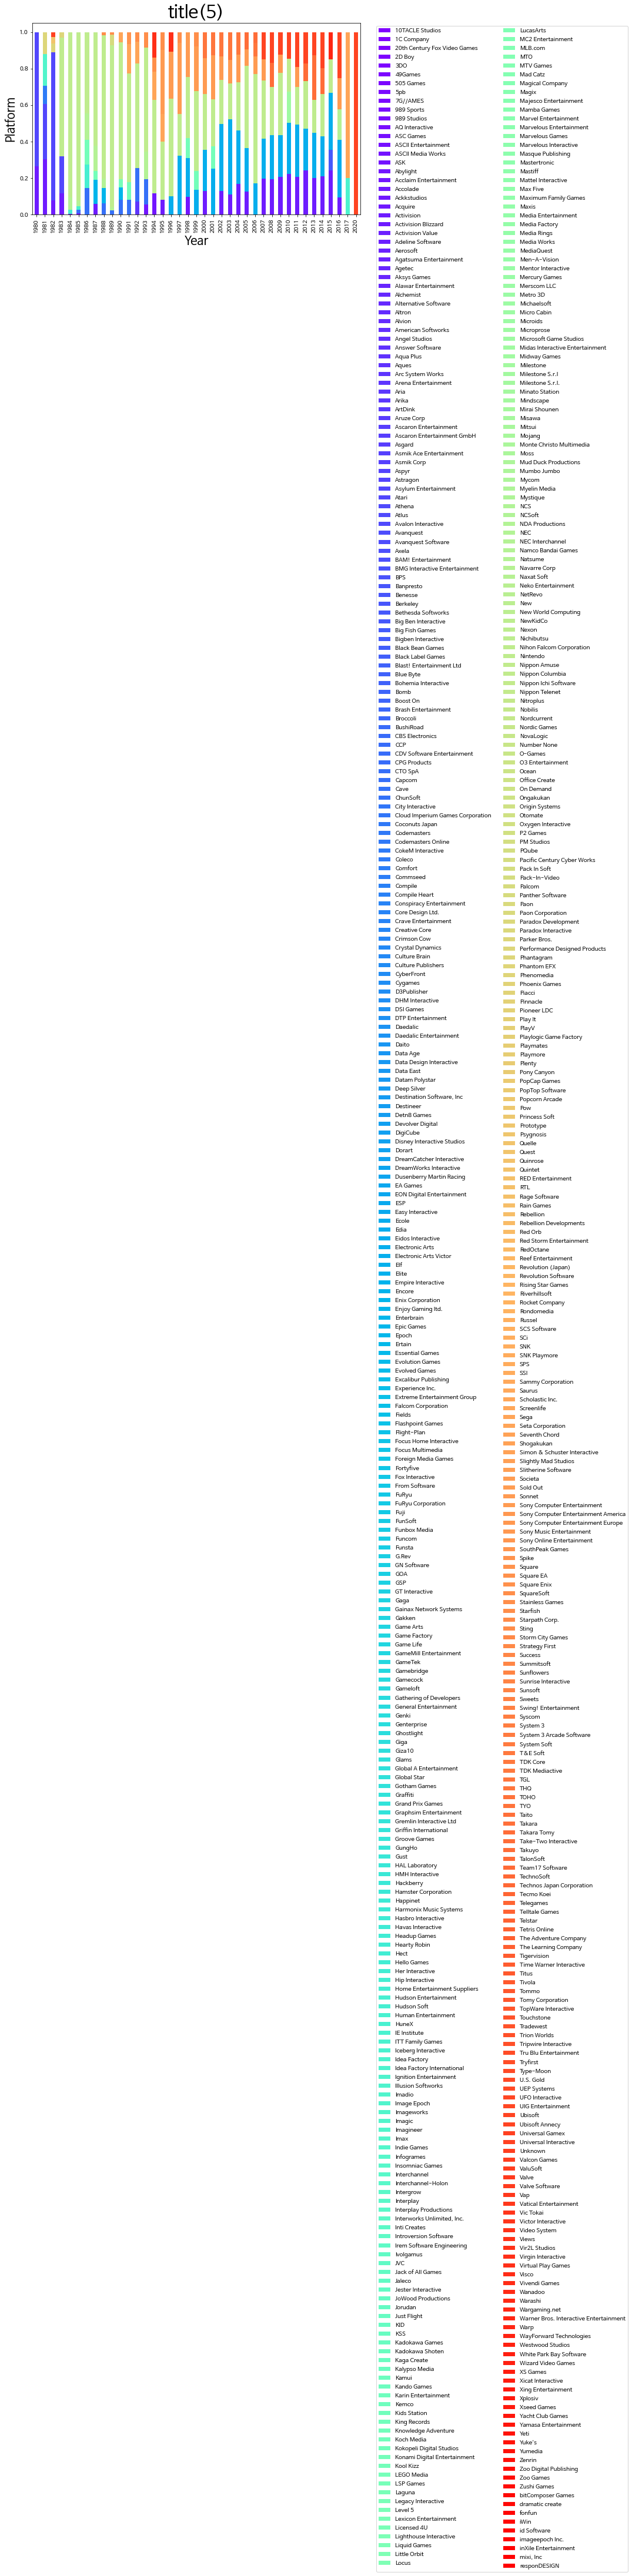

In [ ]:
my_stacked_graphs(df_melt, 'Publisher')

In [ ]:
pu = my_stacked_graphs(df_melt, 'Publisher', graph=False)

In [ ]:
print_5s(pu)

1980년 ['Activision', 'Atari', 'Parker Bros.', 'Nintendo', 'Hudson Soft']
1985년 ['Nintendo', 'Capcom', 'Namco Bandai Games', 'Enix Corporation', 'Konami Digital Entertainment']
1990년 ['Nintendo', 'Sega', 'SquareSoft', 'Capcom', 'Acclaim Entertainment']
1995년 ['Sony Computer Entertainment', 'Nintendo', 'Electronic Arts', 'SquareSoft', 'Activision']
2000년 ['Electronic Arts', 'Sony Computer Entertainment', 'Nintendo', 'Activision', 'THQ']
2005년 ['Nintendo', 'Electronic Arts', 'Activision', 'Ubisoft', 'Sony Computer Entertainment']
2010년 ['Activision', 'Nintendo', 'Electronic Arts', 'Ubisoft', 'Take-Two Interactive']
2015년 ['Activision', 'Ubisoft', 'Electronic Arts', 'Nintendo', 'Bethesda Softworks']
2020년 ['Ubisoft', '10TACLE Studios', 'Nippon Amuse', 'PM Studios', 'PQube']


- 게임 개발사는 섞여 있음. 처음부터 제일 유명한 곳은 Nintendo.
- 최근 들어 Nintendo 포함 Activision, Ubisoft, Electronic Arts가 제일 핫함.
- EA는 스포츠 게임 잘 만드는 것으로 유명. FIFA. 장르와 연관성도 유추해볼 수 있다.
- Ubisoft는 Action/Adventure.

Platform Publisher는 너무 많다. 눈으로 확인 안 됨.
- 전체적으로 연도별로 차이가 있음을 알 수 있다.

#### 연도별로 트렌드가 존재하는지 여부를 언급함
OK

##### 합쳐볼 것들
- 장르
  - 시리즈는 비슷한데 장르가 다르게 표기된 것 있음. 또 Action/Adventure가 비슷하다고 생각함.
  - Puzzle/Strategy
- 개발사
  - Publisher끼리 이름이 바뀌었다면, 자매라면
  - Platform도 동일 플랫폼 개발사라면 합쳐볼 수 있을 것 같음. 근데 잘 몰라서.
  - 중요하지 않다고 판단. 내가 대기업이라면 이미 더 질 좋은 정보가 있을 것이고, 현재 발매량도 알 수 있을 텐데 최근 들어서 데이터가 잘 없음. 외부인력일수도?

In [1]:
import pandas as pd
import numpy as np

df_melt = pd.read_csv('https://raw.githubusercontent.com/yjmd2222/Section-1-Project/main/df_melt_n142.csv')
df_melt.fillna('NA_', inplace=True)

In [2]:
dict1 = {"Action": "Action_Adventure", 'Adventure': 'Action_Adventure', 'Puzzle': 'Puzzle_Strategy', 'Strategy': 'Puzzle_Strategy'}
test = df_melt['Genre'].map(lambda x: dict1[x] if x in dict1 else x)
df_melt['Genre2'] = test
df_melt.query('Genre2 in ("Action_Adventure", "Puzzle_Strategy")')

Name Platform  Year      Genre  \
7          007: Quantum of Solace     X360  2008     Action   
8          007: Quantum of Solace      Wii  2008     Action   
9          007: Quantum of Solace      PS3  2008     Action   
10         007: Quantum of Solace       PC  2008     Action   
11         007: Quantum of Solace       DS  2008     Action   
...                           ...      ...   ...        ...   
38747  iCarly 2: iJoin The Click!      Wii  2010  Adventure   
38748  iCarly 2: iJoin The Click!       DS  2010  Adventure   
38749                    inFAMOUS      PS3  2009     Action   
38750                  inFAMOUS 2      PS3  2011     Action   
38751        inFAMOUS: Second Son      PS4  2014     Action   

                         Publisher Region  Sales            Genre2  
7                       Activision    NA_   0.82  Action_Adventure  
8                       Activision    NA_   0.30  Action_Adventure  
9                       Activision    NA_   0.43  Action_Adventure  
10                      Activision    NA_   0.01  Action_Adventure  
11                      Activision    NA_   0.11  Action_Adventure  
...                            ...    ...    ...               ...  
38747                   Activision  Other   0.01  Action_Adventure  
38748                   Activision  Other   0.02  Action_Adventure  
38749  Sony Computer Entertainment  Other   0.37  Action_Adventure  
38750  Sony Computer Entertainment  Other   0.23  Action_Adventure  
38751  Sony Computer Entertainment  Other   0.47  Action_Adventure  

[13030 rows x 8 columns]

In [3]:
import matplotlib.pyplot as plt

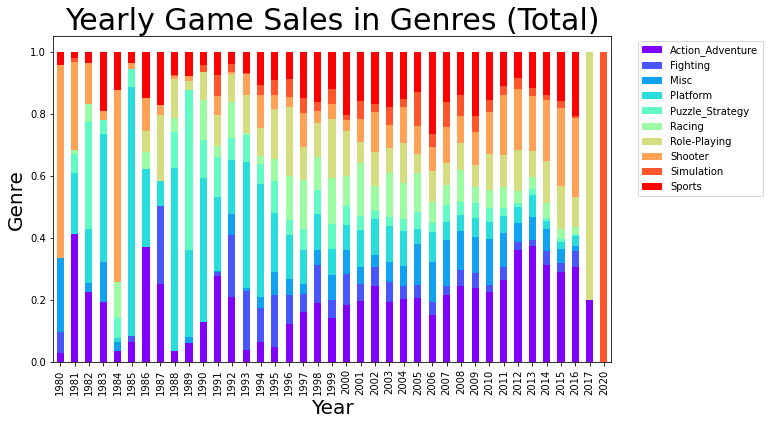

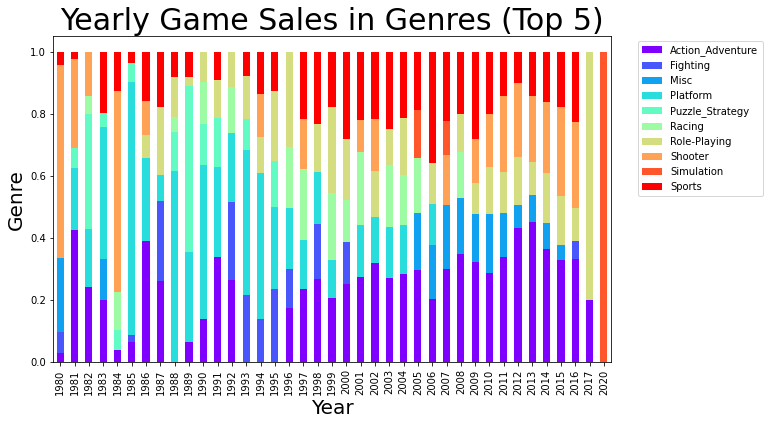

In [22]:
g2 = my_stacked_graphs(df_melt, 'Genre2', 'Genre', ncol=1)

다시 봐도 비슷비슷함. 합쳤기 때문에 인기가 더 많다고 생각되는 부분도 생기긴 함. - 예를 들면 2008년 Puzzle_Strategy
- Action_Adventure는 합치기 전 Action이 그대로 남아 있음.

#### 왜 존재한다/존재하지 않는다고 생각했는지 설명함
- 아주 긴 시간을 놓고 볼 때 유행은 변하지만 근래 들어서는 비슷하다. 독점하고 있는 부분이 쉽게 바뀌지는 않음. 그래서 다음 분기 게임 개발에는 최근 10년 사이 유행하는 장르/플랫폼을 따라 게임 개발하는 것을 추천한다.

### 인기가 많은 게임에 대한 분석 및 시각화 프로세스 포함 여부

#### 인기가 많다는 것을 정의

- 적지 않은 기간 내 출고량이 많으면 인기가 많다. 적지 않다는 기준은 생각해봐야 할 듯.
  - 아마 제일 출고량이 많은 게임들 top 몇 개를 시간별로 보면 되지 않을까 싶음.
  - 보면서 기준 세우기.
  - 자꾸 까먹는데 주어진 데이터셋은 발매 기준연도
  - 내가 가지고 있는 데이터만이 한계가 아님. https://www.kaggle.com/datasets/rush4ratio/video-game-sales-with-ratings
  - 구매평을 볼 수도 있다.

In [70]:
df_new = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Section 1 Project/Video_Games_Sales_as_at_22_Dec_2016.csv')

In [72]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


In [73]:
df_new.dropna(inplace=True)

In [76]:
df_new.head()

Name Platform  Year_of_Release     Genre Publisher  \
0             Wii Sports      Wii           2006.0    Sports  Nintendo   
2         Mario Kart Wii      Wii           2008.0    Racing  Nintendo   
3      Wii Sports Resort      Wii           2009.0    Sports  Nintendo   
6  New Super Mario Bros.       DS           2006.0  Platform  Nintendo   
7               Wii Play      Wii           2006.0      Misc  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  Critic_Score  \
0     41.36     28.96      3.77         8.45         82.53          76.0   
2     15.68     12.76      3.79         3.29         35.52          82.0   
3     15.61     10.93      3.28         2.95         32.77          80.0   
6     11.28      9.14      6.50         2.88         29.80          89.0   
7     13.96      9.18      2.93         2.84         28.92          58.0   

   Critic_Count User_Score  User_Count Developer Rating  
0          51.0          8       322.0  Nintendo      E  
2          73.0        8.3       709.0  Nintendo      E  
3          73.0          8       192.0  Nintendo      E  
6          65.0        8.5       431.0  Nintendo      E  
7          41.0        6.6       129.0  Nintendo      E

In [82]:
df_new.User_Score.sort_values(ascending=False)

3417     9.6
8976     9.6
16631    9.5
16550    9.5
1645     9.5
        ... 
10727    0.9
13427    0.7
10483    0.6
10263    0.5
9148     0.5
Name: User_Score, Length: 6825, dtype: object

In [92]:
df_new['User_Score'] = df_new['User_Score'].astype(float)

In [110]:
new_groupby = df_new.groupby(['Name', 'Year_of_Release', 'Genre', 'Publisher'])
gs_cc_uc = new_groupby.sum()[['Global_Sales', 'Critic_Count', 'User_Count']]
cs_us = new_groupby.mean()[['Critic_Score', 'User_Score']]
dd_r =  new_groupby[['Developer', 'Rating']].agg(pd.Series.mode)

In [112]:
new_scores = pd.concat([gs_cc_uc,cs_us,dd_r], axis=1)

In [115]:
new_scores.sort_values('User_Score', ascending=False)[:20]

Global_Sales  \
Name                                  Year_of_Release Genre        Publisher                                    
Boktai: The Sun is in Your Hand       2003.0          Role-Playing Konami Digital Entertainment          0.15   
Harvest Moon: Friends of Mineral Town 2003.0          Simulation   Ubisoft                               0.59   
MLB SlugFest Loaded                   2004.0          Sports       Midway Games                          0.30   
Golden Sun: The Lost Age              2002.0          Role-Playing Nintendo                              1.22   
Wade Hixton's Counter Punch           2004.0          Sports       Destination Software, Inc             0.01   
Karnaaj Rally                         2003.0          Racing       Jaleco                                0.01   
Monster Rancher Advance 2             2002.0          Simulation   Tecmo Koei                            0.01   
Shenmue                               1999.0          Adventure    Sega                                  1.18   
Backyard Baseball                     2003.0          Sports       Infogrames                            0.13   
Rock 'N Roll Racing                   2003.0          Racing       Activision                            0.05   
Shenmue II                            2001.0          Adventure    Sega                                  0.15   
Skies of Arcadia                      2000.0          Role-Playing Sega                                  0.09   
Castlevania: Symphony of the Night    1997.0          Platform     Konami Digital Entertainment          1.27   
Paper Mario: The Thousand-Year Door   2004.0          Role-Playing Nintendo                              2.25   
Metal Gear Solid                      1998.0          Action       Konami Digital Entertainment          6.03   
Advance Wars 2: Black Hole Rising     2003.0          Strategy     Nintendo                              0.65   
Dynasty Warriors 3: Xtreme Legends    2002.0          Action       Tecmo Koei                            1.00   
Golden Sun                            2001.0          Role-Playing Nintendo                              1.76   
Metal Gear Solid 3: Snake Eater       2004.0          Action       Konami Digital Entertainment          4.23   
Klonoa 2: Dream Champ Tournament      2002.0          Platform     Namco Bandai Games                    0.03   

                                                                                                 Critic_Count  \
Name                                  Year_of_Release Genre        Publisher                                    
Boktai: The Sun is in Your Hand       2003.0          Role-Playing Konami Digital Entertainment          31.0   
Harvest Moon: Friends of Mineral Town 2003.0          Simulation   Ubisoft                               25.0   
MLB SlugFest Loaded                   2004.0          Sports       Midway Games                          30.0   
Golden Sun: The Lost Age              2002.0          Role-Playing Nintendo                              29.0   
Wade Hixton's Counter Punch           2004.0          Sports       Destination Software, Inc             13.0   
Karnaaj Rally                         2003.0          Racing       Jaleco                                 9.0   
Monster Rancher Advance 2             2002.0          Simulation   Tecmo Koei                             5.0   
Shenmue                               1999.0          Adventure    Sega                                   9.0   
Backyard Baseball                     2003.0          Sports       Infogrames                             4.0   
Rock 'N Roll Racing                   2003.0          Racing       Activision                            12.0   
Shenmue II                            2001.0          Adventure    Sega                                   9.0   
Skies of Arcadia                      2000.0          Role-Playing Sega                                  21.0   
Castlevania: Symphony of the

In [117]:
new_scores.sort_values('Critic_Score', ascending=False)[:20]

Global_Sales  \
Name                                Year_of_Release Genre    Publisher                                    
SoulCalibur                         1999.0          Fighting Namco Bandai Games                    0.34   
Tony Hawk's Pro Skater 2            2000.0          Sports   Activision                            4.68   
Super Mario Galaxy 2                2010.0          Platform Nintendo                              7.51   
Super Mario Galaxy                  2007.0          Platform Nintendo                             11.35   
Grand Theft Auto III                2001.0          Action   Take-Two Interactive                 13.10   
Grand Theft Auto V                  2013.0          Action   Take-Two Interactive                 37.31   
                                    2014.0          Action   Take-Two Interactive                 18.09   
NFL 2K1                             2000.0          Sports   Sega                                  1.09   
Metroid Prime                       2002.0          Shooter  Nintendo                              2.82   
Halo: Combat Evolved                2001.0          Shooter  Microsoft Game Studios                6.43   
Half-Life                           1997.0          Shooter  Vivendi Games                         4.12   
The Legend of Zelda: The Wind Waker 2002.0          Action   Nintendo                              4.60   
Uncharted 2: Among Thieves          2009.0          Action   Sony Computer Entertainment           6.66   
Tekken 3                            1998.0          Fighting Sony Computer Entertainment           7.16   
Gran Turismo                        1997.0          Racing   Sony Computer Entertainment          10.95   
Half-Life 2                         2004.0          Shooter  Vivendi Games                         2.37   
BioShock                            2007.0          Shooter  Take-Two Interactive                  3.24   
Metal Gear Solid 2: Sons of Liberty 2001.0          Action   Konami Digital Entertainment          6.05   
Grand Theft Auto V                  2015.0          Action   Take-Two Interactive                  1.17   
Resident Evil 4                     2005.0          Action   Capcom                                5.31   

                                                                                           Critic_Count  \
Name                                Year_of_Release Genre    Publisher                                    
SoulCalibur                         1999.0          Fighting Namco Bandai Games                    24.0   
Tony Hawk's Pro Skater 2            2000.0          Sports   Activision                            19.0   
Super Mario Galaxy 2                2010.0          Platform Nintendo                              87.0   
Super Mario Galaxy                  2007.0          Platform Nintendo                              73.0   
Grand Theft Auto III                2001.0          Action   Take-Two Interactive                  56.0   
Grand Theft Auto V                  2013.0          Action   Take-Two Interactive                 108.0   
                                    2014.0          Action   Take-Two Interactive                  80.0   
NFL 2K1                             2000.0          Sports   Sega                                  22.0   
Metroid Prime                       2002.0          Shooter  Nintendo                              70.0   
Halo: Combat Evolved                2001.0          Shooter  Microsoft Game Studios                68.0   
Half-Life                           1997.0          Shooter  Vivendi Games                         24.0   
The Legend of Zelda: The Wind Waker 2002.0          Action   Nintendo                              80.0   
Uncharted 2: Among Thieves          2009.0          Action   Sony Computer Entertainment          105.0   
Tekken 3                            1998.0          Fighting Sony Computer Entertainment           15.0   
Gran Turismo            

In [122]:
high_user_score100 = new_scores.sort_values('User_Score', ascending=False)[:100].reset_index()['Name']
high_critic_score100 = new_scores.sort_values('Critic_Score', ascending=False)[:100].reset_index()['Name']

In [123]:
high_user_score100.isin(high_critic_score100).sum()

16

In [124]:
high_user_score20 = new_scores.sort_values('User_Score', ascending=False)[:20].reset_index()['Name']
high_critic_score20 = new_scores.sort_values('Critic_Score', ascending=False)[:20].reset_index()['Name']
high_user_score20.isin(high_critic_score20).sum()

0

In [125]:
high_score = high_user_score100[high_user_score100.isin(high_critic_score100)]

In [28]:
game_year = df_melt.groupby(['Year','Name']).sum().reset_index()
game_year

Year                                              Name  Sales
0      1980                                         Asteroids   4.31
1      1980                                            Boxing   0.77
2      1980                                            Bridge   0.27
3      1980                                          Checkers   0.23
4      1980                                          Defender   1.05
...     ...                                               ...    ...
12024  2016                    Zero Escape: Zero Time Dilemma   0.12
12025  2016                                            ZombiU   0.06
12026  2017                  Brothers Conflict: Precious Baby   0.01
12027  2017  Phantasy Star Online 2 Episode 4: Deluxe Package   0.04
12028  2020                            Imagine: Makeup Artist   0.29

[12029 rows x 3 columns]

In [61]:
game_year_sumname = game_year.groupby('Name').sum().drop('Year', axis=1).sort_values('Sales', ascending=False)[:10]
game_year_sumname

Sales
Name                                 
Wii Sports                      82.74
Grand Theft Auto V              55.92
Super Mario Bros.               45.31
Tetris                          35.84
Mario Kart Wii                  35.83
Wii Sports Resort               33.00
Pokemon Red/Pokemon Blue        31.38
Call of Duty: Black Ops         31.04
Call of Duty: Modern Warfare 3  30.84
New Super Mario Bros.           30.01

In [36]:
game_year[game_year['Name'] == 'Tetris']

Year    Name  Sales
187  1988  Tetris   5.58
202  1989  Tetris  30.26

In [37]:
df_melt[df_melt['Name'] == 'Tetris']

Name Platform  Year   Genre Publisher Region  Sales           Genre2
9921   Tetris       GB  1989  Puzzle  Nintendo    NA_  23.20  Puzzle_Strategy
9922   Tetris      NES  1988  Puzzle  Nintendo    NA_   2.97  Puzzle_Strategy
20752  Tetris       GB  1989  Puzzle  Nintendo     EU   2.26  Puzzle_Strategy
20753  Tetris      NES  1988  Puzzle  Nintendo     EU   0.69  Puzzle_Strategy
27895  Tetris       GB  1989  Puzzle  Nintendo     JP   4.22  Puzzle_Strategy
27896  Tetris      NES  1988  Puzzle  Nintendo     JP   1.81  Puzzle_Strategy
37035  Tetris       GB  1989  Puzzle  Nintendo  Other   0.58  Puzzle_Strategy
37036  Tetris      NES  1988  Puzzle  Nintendo  Other   0.11  Puzzle_Strategy

In [44]:
games_1989 = df_melt.query('Year == 1989').groupby('Name').sum().drop('Year', axis=1).sort_values('Sales', ascending=False)

In [47]:
games_1989

Sales
Name                                   
Tetris                            30.26
Super Mario Land                  18.14
Dr. Mario                          5.34
Teenage Mutant Ninja Turtles       4.17
Golf                               2.12
Tennis                             1.99
Alleyway                           1.94
Disney's DuckTales                 1.67
Baseball                           1.61
Yakuman                            1.28
SolarStriker                       1.19
Famicom Jump: Eiyuu Retsuden       1.10
The Final Fantasy Legend           1.10
Castlevania III: Dracula's Curse   0.85
Double Dragon                      0.48
Klax                               0.15
Adventures of Lolo                 0.06

1989년에 발매된 게임 중 가장 인기 많았던 게임. 그리고 현재 거의 인기가 없는 장르이지만 그 때 제일 인기 많았던 장르로 만들어준 게임이 Tetris.

In [45]:
import seaborn as sns

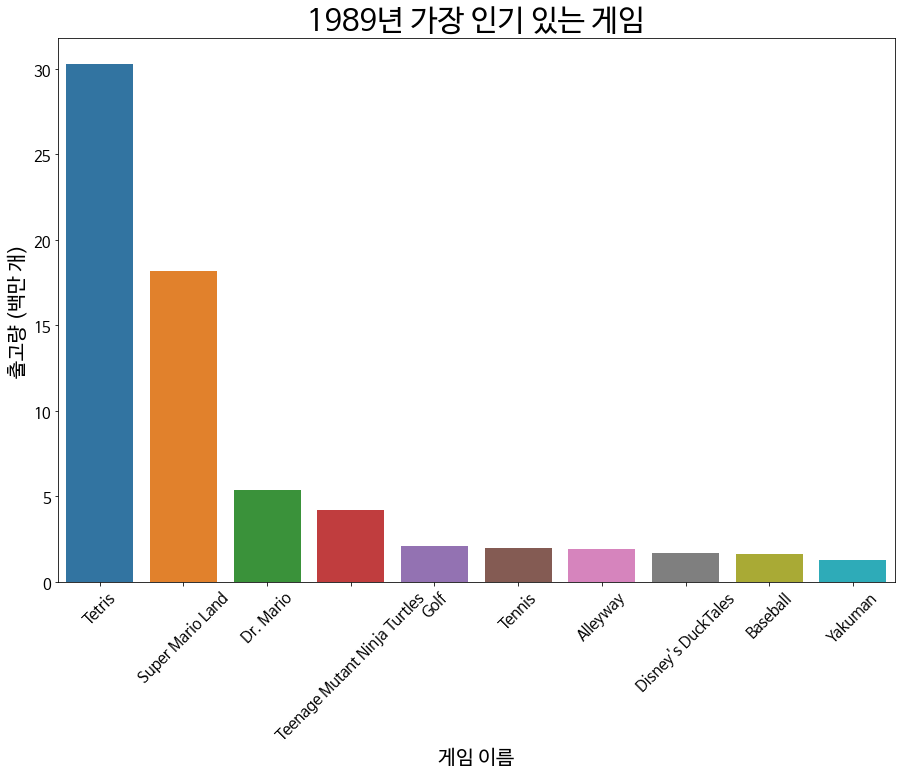

In [156]:
fig, ax = plt.subplots(figsize=(15,10))
sns.barplot(data=games_1989.reset_index().iloc[:10], x='Name', y='Sales')
plt.xticks(rotation=45)
plt.title('1989년 가장 인기 있는 게임', fontsize=30)
plt.xlabel('게임 이름', fontsize=20)
plt.ylabel('출고량 (백만 개)', fontsize=20)
ax.tick_params(labelsize=15)
plt.show()

In [129]:
game_year_sumname100 = game_year.groupby('Name').sum().drop('Year', axis=1).sort_values('Sales', ascending=False)[:100]
game_year_sumname100[game_year_sumname100.index.isin(high_score)]

Sales
Name                 
The Last of Us  10.52

- User Score, Critic Score, Sales top 100 중 겹치는 것 하나 찾음: The Last of Us<
- 올타임 Wii Sports의 8천만 출고량의 1/8인 정도면 User Score, Critic Score, Sales가 인기의 척도를 어느 정도 보여줄 뿐이지 확신할 수는 없다.
- 개발사 입장에서는 점수가 낮아도 많이 팔 수 있다면 그 수를 택할 가능성이 크다.
- 따라서 인기 기준을 출고량으로 정하겠다.

In [134]:
df_melt_top100 = df_melt[df_melt['Name'].isin(game_year_sumname100.index)]

In [149]:
game_year_sumname100.index[:10]

Index(['Wii Sports', 'Grand Theft Auto V', 'Super Mario Bros.', 'Tetris',
       'Mario Kart Wii', 'Wii Sports Resort', 'Pokemon Red/Pokemon Blue',
       'Call of Duty: Black Ops', 'Call of Duty: Modern Warfare 3',
       'New Super Mario Bros.'],
      dtype='object', name='Name')

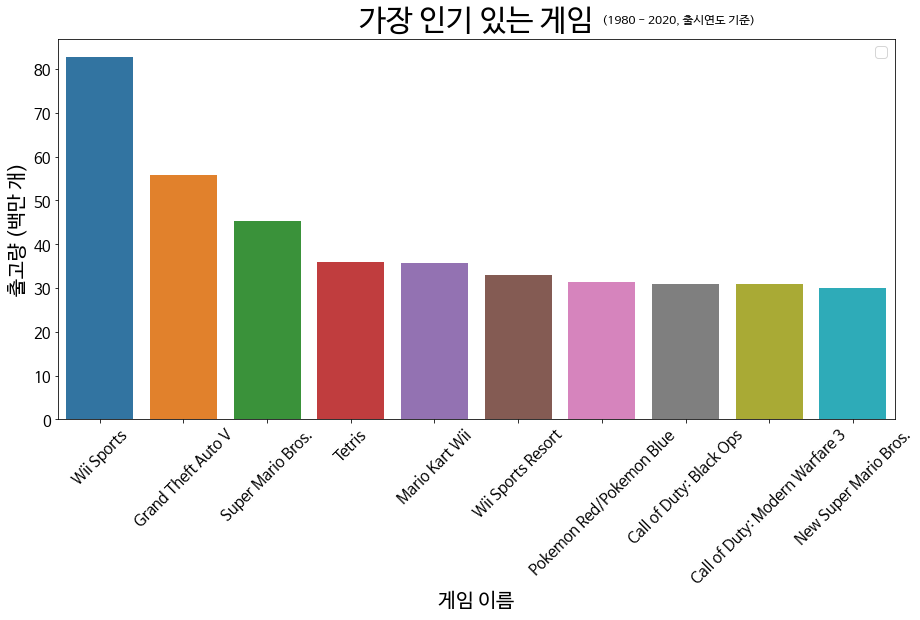

In [169]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')

colorlist = ['black', 'gray', 'red', 'orange', 'lime', 'green', 'aqua', 'deepskyblue', 'royalblue', 'mediumpurple', 'indigo', 'magenta', 'yellow', 'yellowgreen', 'peru', 'lightsalmon']
colors = {i[0]:i[1] for i in zip(game_year_sumname100.index[:10], colorlist[:10])}

fig = plt.figure(figsize=(15,7))
ax = fig.add_subplot(111)
sns.barplot(data=game_year_sumname100[:10].reset_index().iloc[:10], x='Name', y='Sales')
ax.set_title('가장 인기 있는 게임', fontsize=30)
plt.suptitle('(1980 - 2020, 출시연도 기준)', x=0.7, y=0.93)
ax.set_xlabel("게임 이름", fontsize=20)
ax.set_ylabel("출고량 (백만 개)", fontsize=20)
plt.legend(prop={'size':15})
plt.xticks(rotation=45)
ax.tick_params(labelsize=15)

####  해당 게임이 왜 인기가 많다고 생각했는지 설명함

- 테트리스가 인기 많은 이유: 직관적이고 간단하면서도 난이도 높아짐짐. 점수 매기기가 용이함, 대결 등.

#### 시각화를 통해 무엇을 나타내고자 하는지를 고려하여 파라미터를 조정함 (제목, 축이름 필수, 그 외 파라미터는 선택사항)

#### 해당 분석을 통해 어떤 인사이트를 도출할 수 있는지 설명함

- 테트리스가 인기 많았던 때를 생각해보면, 지금이라도 비슷한 성격, 즉 간단하면서도 챌린지를 불러올 수 있고, 획기적인 소재로 게임을 만든다면 성공할 수 있다.

### 결론

In [195]:
game_year_sumname = game_year.groupby('Name').sum().drop('Year', axis=1).sort_values('Sales', ascending=False)

In [196]:
ng = df_melt.groupby(['Name','Genre']).sum().drop('Year', axis=1).reset_index()
ng[ng['Name'].isin(game_year_sumname[:100].index)]['Genre'].unique()

array(['Simulation', 'Adventure', 'Action', 'Shooter', 'Puzzle', 'Misc',
       'Role-Playing', 'Platform', 'Sports', 'Racing', 'Fighting'],
      dtype=object)

Strategy는 하지 말고. 진짜 잘 만드는거 아닌 이상 100위 안에 못 드는 장르임. 각 잡고 긴 기간 동안 한다면 퀄리티 좋은 생소한 장르라 이슈될 수 있을 것도 같지만, 회사에 이 장르 잘 하는 개발자 있는지 모르겠음. 그냥 모든 장르에 적당하다고 가정하면 이 장르는 하면 안 될 듯.

In [197]:
ng[ng['Name'].isin(game_year_sumname[:5].index)]['Genre'].unique()

array(['Action', 'Racing', 'Platform', 'Puzzle', 'Sports'], dtype=object)

In [200]:
game_year_sumname_f1995 = game_year.query('Year >= 1995').groupby('Name').sum().drop('Year', axis=1).sort_values('Sales', ascending=False)

In [203]:
genres = ng[ng['Name'].isin(game_year_sumname_f1995.index)]['Genre'].value_counts()
genres

Action          1805
Sports          1301
Misc            1264
Role-Playing    1160
Adventure       1023
Shooter          763
Racing           734
Simulation       696
Fighting         568
Strategy         564
Platform         521
Puzzle           458
Name: Genre, dtype: int64

In [206]:
from scipy.stats import chisquare

In [207]:
chisquare(genres, np.array([genres.mean()] * 12))

Power_divergenceResult(statistic=2039.0674219397624, pvalue=0.0)

분명 장르 탐. 나중에 다시 정리해서 샘플링 해보기

게임 패러다임이 1995부터 바뀌었다고 보는데, 그때부터 집계한 결과 액션 장르가 가장 인기 있음. 5년 주기로 살펴보았을 때 Action, Sports, Role-Playing, Shooter가 제일 인기 많았었다. 이 잘 바뀌지 않은 트렌드에 맞추어 액션 장르로 게임 개발할 것을 추천한다.

# 오티 노트
- EDA 및 스프린트1이 주 내용이겠지만, 도전 과제의 개념으로 스프린트2,3도 생각해볼 수 있다.
- 반드시 들어가야 하는 내용 살펴보기. 체크리스트. 여기에 추가 조건도 나온다.
- 스크립트 준비해서 발표 같이 하면 젤 좋을 듯.
- 완성이 아니라 제출이 목표. 3월 13일 월요일까지 제출해서 14일에 피드백 진행. 5시까지 제출한다고 생각하기
- repo, 영상파일(AI\_18\_양진모\_section1.mkv)
- 상황 설정해서 전문적으로 생각하는 자세도 좋다.
- 데이터 내에서 애매한 부분은 다 내가 주관적으로 판단한다. 그 판단 과정이 점수산정에 포함됨.
- 데이터셋 소스: https://www.vgchartz.com/charts/platform_totals/Hardware.php/

In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf # 폰트 지정해주기기

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
0 upgraded, 0 newly installed, 0 to remove and 23 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 31 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/n